**Análise Exploratória**

**Projeto de ML - Crédito Imobiliário - Diolan**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
sns.set_theme()
pd.options.display.float_format = '{:,.6f}'.format

sns.set(rc={'figure.figsize':(15, 5)})

## Início

In [3]:
df = pd.read_csv('./data/application_train.csv')

In [4]:
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           456162       0         Cash loans           F            N   
1           134978       0         Cash loans           F            N   
2           318952       0         Cash loans           M            Y   
3           361264       0         Cash loans           F            N   
4           260639       0         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
246003      242114       0         Cash loans           F            N   
246004      452374       0         Cash loans           F            N   
246005      276545       1    Revolving loans           M            N   
246006      236776       1         Cash loans           M            Y   
246007      454197       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL       AMT_CREDIT  \
0                    N             0    112,500.000000   700,830.000000   
1                    N             0     90,000.000000   375,322.500000   
2                    N             0    180,000.000000   544,491.000000   
3                    Y             0    270,000.000000   814,041.000000   
4                    Y             0    144,000.000000   675,000.000000   
...                ...           ...               ...              ...   
246003               Y             1    270,000.000000 1,172,470.500000   
246004               Y             0    180,000.000000   654,498.000000   
246005               N             1    112,500.000000   270,000.000000   
246006               N             3    202,500.000000   204,858.000000   
246007               Y             2     81,000.000000   547,344.000000   

         AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0      22,738.500000  ...                 0                0                0   
1      14,422.500000  ...                 0                0                0   
2      16,047.000000  ...                 0                0                0   
3      28,971.000000  ...                 0                0                0   
4      21,906.000000  ...                 0                0                0   
...              ...  ...               ...              ...              ...   
246003 34,411.500000  ...                 0                0                0   
246004 27,859.500000  ...                 0                0                0   
246005 13,500.000000  ...                 0                0                0   
246006 17,653.500000  ...                 0                0                0   
246007 23,139.000000  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                   0.000000                  0.000000   
1                     0                   0.000000                  0.000000   
2                     0                   0.000000                  0.000000   
3                     0                   0.000000                  0.000000   
4                     0                   0.000000                  0.000000   
...                 ...                        ...                       ...   
246003                0                   0.000000                  0.000000   
246004                0                   0.000000                  0.000000   
246005                0                        NaN                       NaN   
246006                0                   0.000000                  0.000000   
246007                0                   0.000000                  0.000000   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.000000                   0.000000   
1                         0.000000                   1.000000   
2                         0.000000                   1.000000   
3                       

Não há registros duplicados na base de dados.

In [5]:
df.duplicated().sum()

0

Cada registro possui um 'SK_ID_CURR' único, o que faz todo sentido sendo um ID.

In [6]:
df['SK_ID_CURR'].nunique()/df.shape[0]

1.0

Portanto, vamos salva-la numa série e dropá-la do dataframe.

In [4]:
ids = df['SK_ID_CURR']

df = df.drop(columns='SK_ID_CURR')

In [8]:
ids

0         456162
1         134978
2         318952
3         361264
4         260639
           ...  
246003    242114
246004    452374
246005    276545
246006    236776
246007    454197
Name: SK_ID_CURR, Length: 246008, dtype: int64

In [9]:
df

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0            0         Cash loans           F            N               N   
1            0         Cash loans           F            N               N   
2            0         Cash loans           M            Y               N   
3            0         Cash loans           F            N               Y   
4            0         Cash loans           F            N               Y   
...        ...                ...         ...          ...             ...   
246003       0         Cash loans           F            N               Y   
246004       0         Cash loans           F            N               Y   
246005       1    Revolving loans           M            N               N   
246006       1         Cash loans           M            Y               N   
246007       0         Cash loans           F            N               Y   

        CNT_CHILDREN  AMT_INCOME_TOTAL       AMT_CREDIT   AMT_ANNUITY  \
0                  0    112,500.000000   700,830.000000 22,738.500000   
1                  0     90,000.000000   375,322.500000 14,422.500000   
2                  0    180,000.000000   544,491.000000 16,047.000000   
3                  0    270,000.000000   814,041.000000 28,971.000000   
4                  0    144,000.000000   675,000.000000 21,906.000000   
...              ...               ...              ...           ...   
246003             1    270,000.000000 1,172,470.500000 34,411.500000   
246004             0    180,000.000000   654,498.000000 27,859.500000   
246005             1    112,500.000000   270,000.000000 13,500.000000   
246006             3    202,500.000000   204,858.000000 17,653.500000   
246007             2     81,000.000000   547,344.000000 23,139.000000   

        AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0        585,000.000000  ...                0                0   
1        324,000.000000  ...                0                0   
2        454,500.000000  ...                0                0   
3        679,500.000000  ...                0                0   
4        675,000.000000  ...                0                0   
...                 ...  ...              ...              ...   
246003   918,000.000000  ...                0                0   
246004   585,000.000000  ...                0                0   
246005   270,000.000000  ...                0                0   
246006   171,000.000000  ...                0                0   
246007   472,500.000000  ...                0                0   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                     0                0                   0.000000   
1                     0                0                   0.000000   
2                     0                0                   0.000000   
3                     0                0                   0.000000   
4                     0                0                   0.000000   
...                 ...              ...                        ...   
246003                0                0                   0.000000   
246004                0                0                   0.000000   
246005                0                0                        NaN   
246006                0                0                   0.000000   
246007                0                0                   0.000000   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.000000                    0.000000   
1                        0.000000                    0.000000   
2                        0.000000                    0.000000   
3                        0.000000                    0.000000   
4                        0.000000                    0.000000   
...                           ...                         ...   
246003                   0.000000                    0.000000   
246004                   0.0

Vemos que das 122 colunas, a grande maioria (65 + 41 = 106) são numéricas.

In [10]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246008 entries, 0 to 246007
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    TARGET                        int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DA

## Dados Faltantes

Vamos avaliar os dados faltantes.

In [11]:
nulls_percent = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

nulls_percent[nulls_percent == 0].count()

54

Vemos que 54 das 122 colunas não apresentam dados nulos. 

Vejamos agora as colunas que os apresentam.

In [90]:
nulls_percent[nulls_percent > 0].shape

(67,)

In [91]:
nulls_percent[nulls_percent >= 50].shape

(41,)

Temos 67 colunas com dados faltantes sendo que em 41 dessas, os dados falatantes representam mais de 50% da série.

In [95]:
nulls_percent[nulls_percent>30].sort_values()[:2]

OCCUPATION_TYPE       31.396133
EMERGENCYSTATE_MODE   47.462278
dtype: float64

Vemos que há um salto de 31% para 47% nas features com mais do que 30% de dados nulos. Assim vamos pegar todas as features com mais do que 47% de dados faltantes.

In [96]:
nulls_percent[nulls_percent>47].index

Index(['COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI',
       'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_AVG',
       'LANDAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_AVG',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MODE',
       'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'WALLSMATERIAL_MODE',
       'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'ENTRANCES_AVG',
       'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'LIVINGAREA_MEDI',
       'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE', 'FLOORSMAX_MEDI',
       'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI

In [113]:
nulls_gt_47 = nulls_percent[nulls_percent>47]
nulls_gt_47.shape

(49,)

Então das 67 colunas com dados faltantes, em 49 delas os dados faltantes representam mais do que 47%.

A maioria dessas 49, são features que expressam a média, mediana ou moda de características da residência do cliente.

In [14]:
# mct: mesures of central tendency
mct_abrev = ['MODE', 'MEDI', 'AVG']

mct_build_features = [col for col in df.columns if col.split('_')[-1] in mct_abrev]

mct_build_features

['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMER

In [15]:
len(mct_build_features)

47

Ou seja, das 49 features citadas acima, 47 são de medidas de tendência central das moradias dos clientes. 

Todas essas 47 apresentam no mínimo 47% de dados faltantes e em algumas este percentual chega a quase 70%.

Vejamos quais são as outras duas features.

In [115]:
set(nulls_gt_47.index).difference(set(mct_build_features))

{'EXT_SOURCE_1', 'OWN_CAR_AGE'}

Vamos guardar as features que não são aquelas de medida de tendência central das moradias dos clientes.

In [134]:
not_build_mesures_features = [col for col in df.columns if col not in mct_build_features]
not_build_mesures_features.remove('TARGET')
not_build_mesures_features

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_

In [135]:
len(not_build_mesures_features)

73

### Totais de dados nulos

Vamos agora avaliar a quantidade de dados nulos na base como um todo.

In [171]:
total_data = df.size
total_data

29766968

In [20]:
total_null = df.isnull().sum().sum()
total_null

7326502

Vemos que quase 25% dos dados são dados nulos.

In [21]:
total_null/total_data*100

24.61285946220656

In [99]:
df[mct_build_features].isnull().sum().sum()/total_null*100

91.38414211857173

E de todos os dados nulos, 91% provém das features de tendencia central das moradias dos clientes!

In [100]:
df[nulls_gt_47.index].isnull().sum().sum()/total_null*100

95.49472585962579

E 95% do total de dados faltantes vem de das features que contém mais do 47% de dados faltantes.

In [104]:
df[nulls_gt_47.index].dropna().shape

(10372, 49)

In [105]:
df[mct_build_features].dropna().shape

(62749, 47)

Se considerarmos os registros que possuem dados em todas as features de medidas de tendência central das moradias dos clientes, temos uma base com quase 63 mil linhas.

___

## Target

Agora vamos olhar para a distrubuição do target.

In [24]:
tgt_dist = df['TARGET'].value_counts(normalize=True)
tgt_dist

0   0.918824
1   0.081176
Name: TARGET, dtype: float64

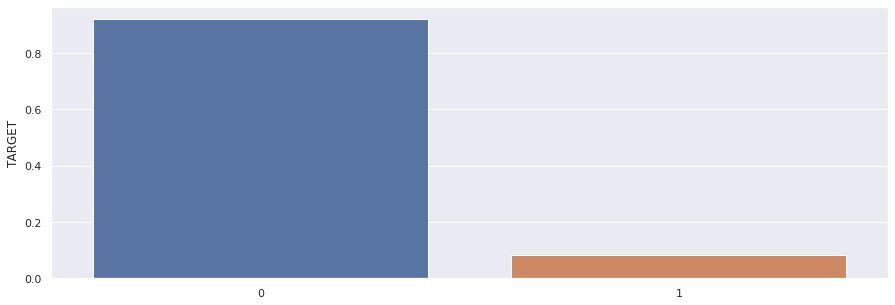

In [25]:
sns.barplot(x=tgt_dist.index, y=tgt_dist);

Vemos que há um desbalanço grande no target. Cerca de 8% dos pedidos de crédito, apenas, são classificados como classe 1, ou seja, foram rejeitados.

___

## Features Com "Poucos" Valores Unicos

### Distribuição de Features "object"

Vamos agora olhar para a distribuição das features guardadas como object.

In [26]:
def plot_percent_dist(feature_name):
    feature_pct_dist = df[feature_name].value_counts(normalize=True)
    levels = len(feature_pct_dist.index)
    
    if levels <= 7:
        ax = sns.barplot(x=feature_pct_dist.index, y=feature_pct_dist)
    else:
        ax = sns.barplot(x=feature_pct_dist, y=feature_pct_dist.index, orient='h')
        
    ax.set_title(f'{feature_name} Distribution', loc='left')
    plt.show()
    
    display(feature_pct_dist)
    
    print('='*120)

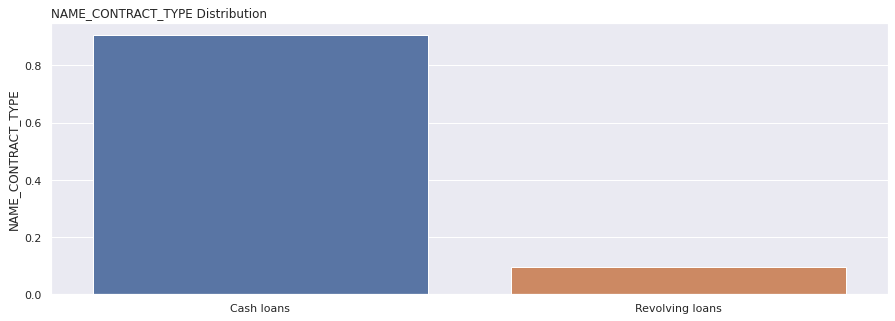

Cash loans        0.904938
Revolving loans   0.095062
Name: NAME_CONTRACT_TYPE, dtype: float64

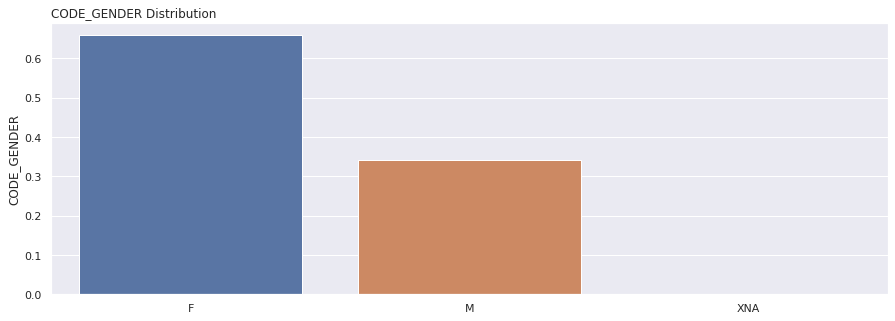

F     0.657975
M     0.342013
XNA   0.000012
Name: CODE_GENDER, dtype: float64

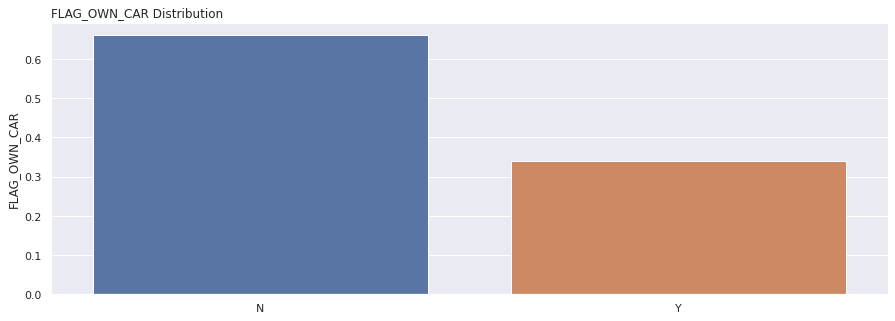

N   0.659958
Y   0.340042
Name: FLAG_OWN_CAR, dtype: float64

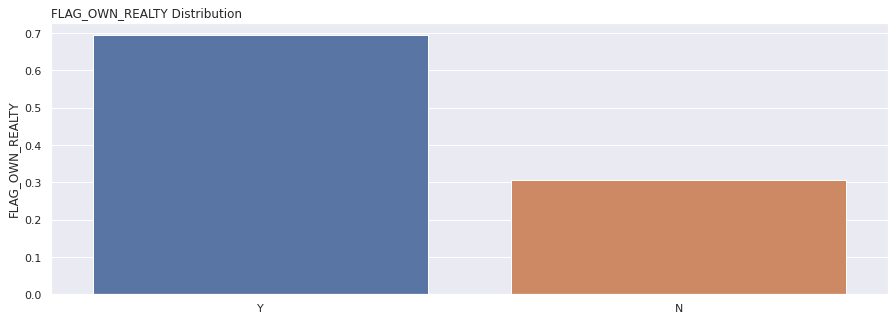

Y   0.693209
N   0.306791
Name: FLAG_OWN_REALTY, dtype: float64

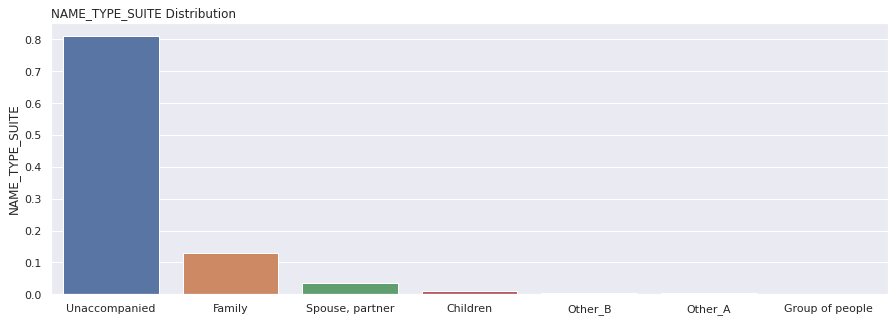

Unaccompanied     0.811259
Family            0.131226
Spouse, partner   0.037235
Children          0.010671
Other_B           0.005911
Other_A           0.002813
Group of people   0.000886
Name: NAME_TYPE_SUITE, dtype: float64

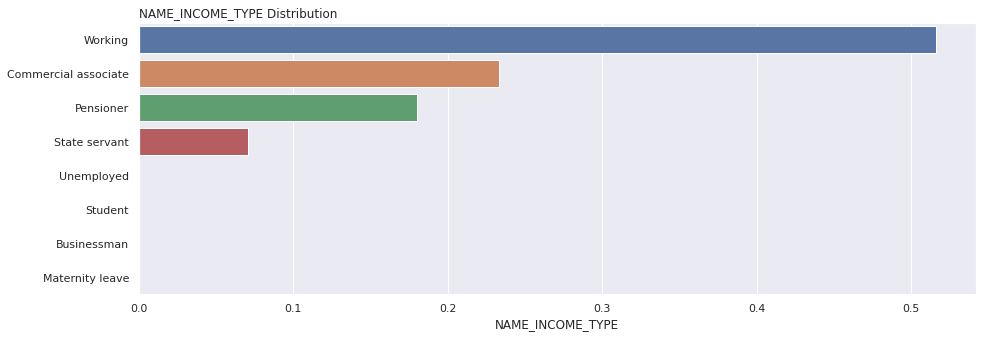

Working                0.515914
Commercial associate   0.233005
Pensioner              0.180437
State servant          0.070473
Unemployed             0.000069
Student                0.000049
Businessman            0.000041
Maternity leave        0.000012
Name: NAME_INCOME_TYPE, dtype: float64

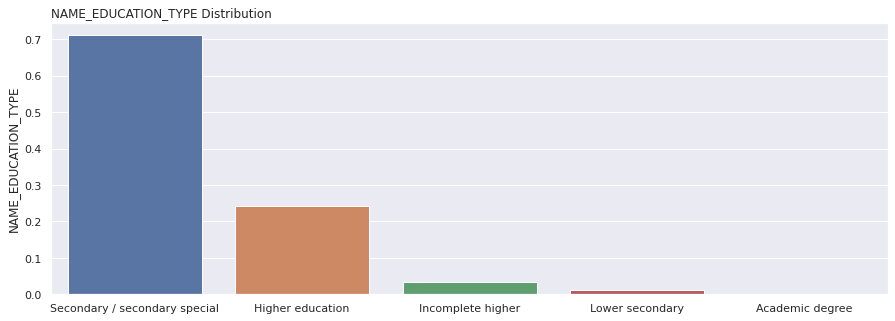

Secondary / secondary special   0.710672
Higher education                0.243212
Incomplete higher               0.033365
Lower secondary                 0.012211
Academic degree                 0.000541
Name: NAME_EDUCATION_TYPE, dtype: float64

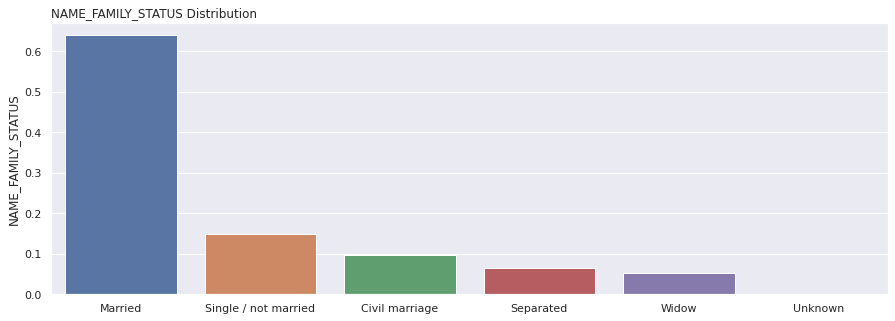

Married                0.638491
Single / not married   0.147942
Civil marriage         0.096737
Separated              0.064502
Widow                  0.052324
Unknown                0.000004
Name: NAME_FAMILY_STATUS, dtype: float64

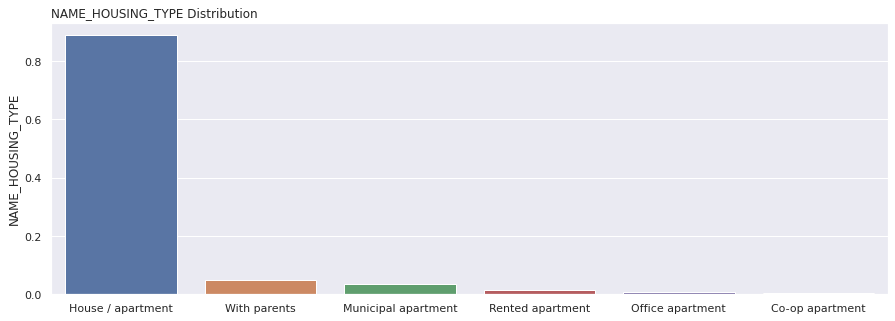

House / apartment     0.887199
With parents          0.048442
Municipal apartment   0.036267
Rented apartment      0.015808
Office apartment      0.008573
Co-op apartment       0.003711
Name: NAME_HOUSING_TYPE, dtype: float64

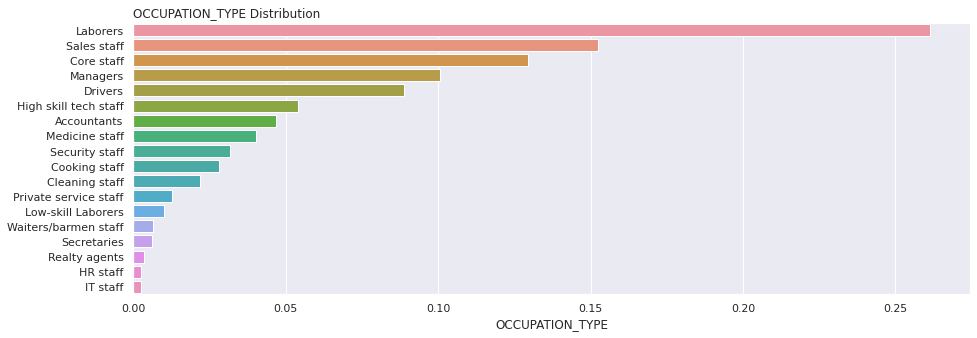

Laborers                0.261455
Sales staff             0.152402
Core staff              0.129572
Managers                0.100734
Drivers                 0.088718
High skill tech staff   0.053949
Accountants             0.046815
Medicine staff          0.040428
Security staff          0.031824
Cooking staff           0.027985
Cleaning staff          0.021971
Private service staff   0.012573
Low-skill Laborers      0.010061
Waiters/barmen staff    0.006423
Secretaries             0.006233
Realty agents           0.003662
HR staff                0.002619
IT staff                0.002577
Name: OCCUPATION_TYPE, dtype: float64

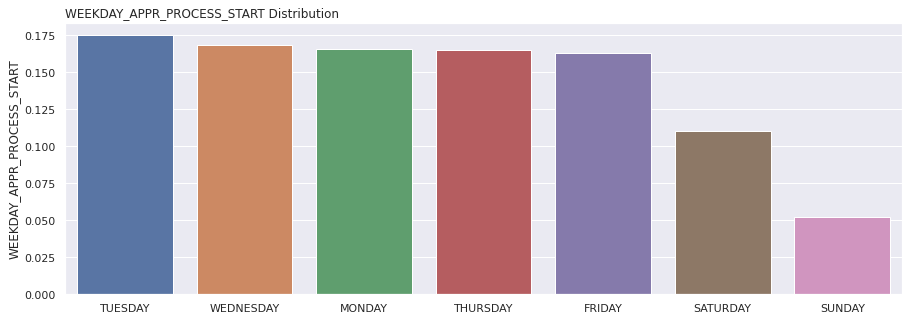

TUESDAY     0.174978
WEDNESDAY   0.168360
MONDAY      0.165478
THURSDAY    0.165100
FRIDAY      0.163417
SATURDAY    0.110090
SUNDAY      0.052576
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

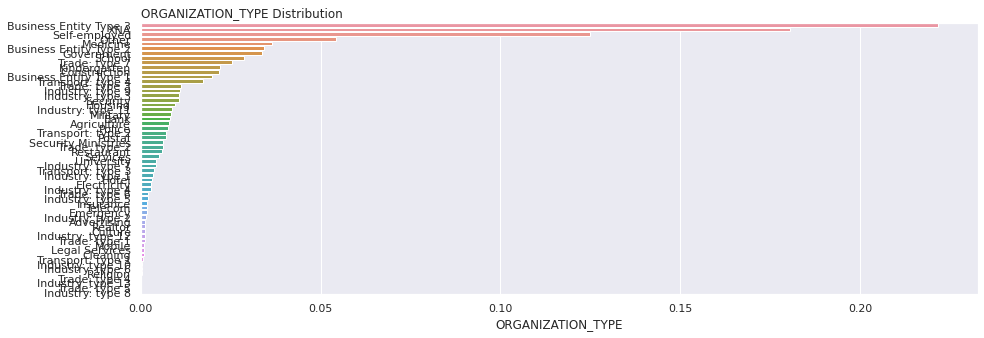

Business Entity Type 3   0.221517
XNA                      0.180478
Self-employed            0.124882
Other                    0.054267
Medicine                 0.036511
Business Entity Type 2   0.034279
Government               0.033861
School                   0.028771
Trade: type 7            0.025438
Kindergarten             0.022146
Construction             0.021906
Business Entity Type 1   0.019751
Transport: type 4        0.017386
Trade: type 3            0.011248
Industry: type 9         0.010955
Industry: type 3         0.010679
Security                 0.010544
Housing                  0.009626
Industry: type 11        0.008691
Military                 0.008593
Bank                     0.008049
Agriculture              0.007967
Police                   0.007585
Transport: type 2        0.007093
Postal                   0.006988
Security Ministries      0.006362
Trade: type 2            0.006122
Restaurant               0.006008
Services                 0.005138
University    

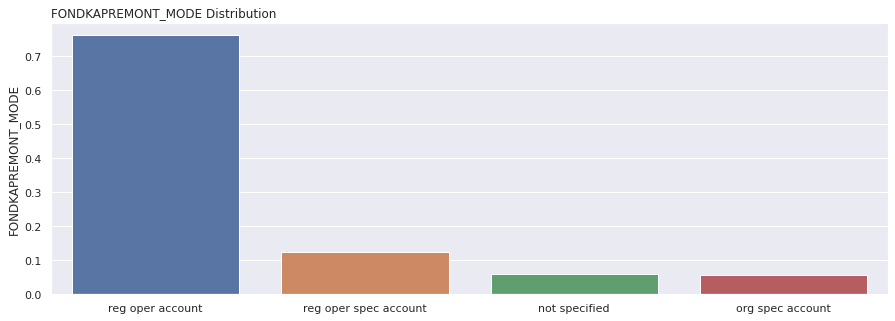

reg oper account        0.759934
reg oper spec account   0.124266
not specified           0.058442
org spec account        0.057359
Name: FONDKAPREMONT_MODE, dtype: float64

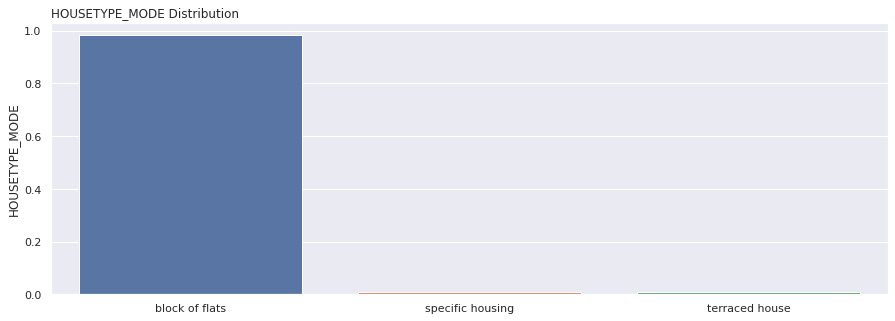

block of flats     0.982191
specific housing   0.009896
terraced house     0.007912
Name: HOUSETYPE_MODE, dtype: float64

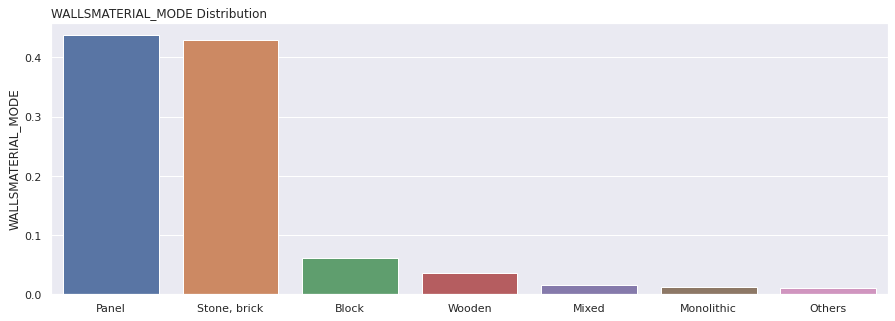

Panel          0.437084
Stone, brick   0.428784
Block          0.061087
Wooden         0.035277
Mixed          0.015326
Monolithic     0.011809
Others         0.010634
Name: WALLSMATERIAL_MODE, dtype: float64

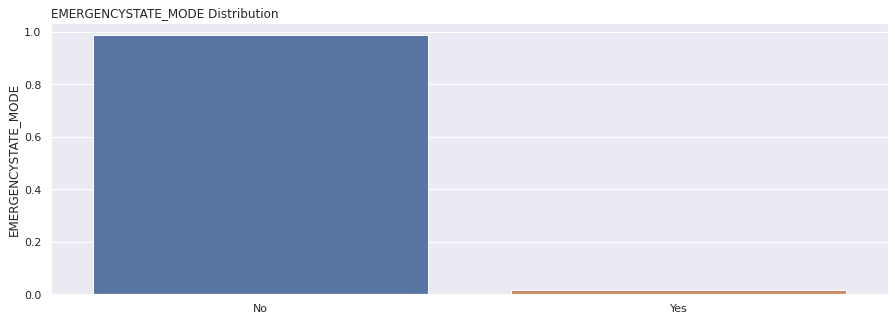

No    0.985516
Yes   0.014484
Name: EMERGENCYSTATE_MODE, dtype: float64

In [27]:
object_features = df.select_dtypes(exclude=np.number).columns
for feature in object_features:
    plot_percent_dist(feature)

### Distribuição de Features "int"

Vamos fazer o mesmo com os dados discretos.

In [28]:
df.select_dtypes(include=np.int64).describe()

TARGET   CNT_CHILDREN     DAYS_BIRTH  DAYS_EMPLOYED  \
count 246,008.000000 246,008.000000 246,008.000000 246,008.000000   
mean        0.081176       0.415527 -16,042.794393  63,963.755699   
std         0.273106       0.719922   4,365.973763 141,400.318322   
min         0.000000       0.000000 -25,229.000000 -17,912.000000   
25%         0.000000       0.000000 -19,691.000000  -2,758.000000   
50%         0.000000       0.000000 -15,763.000000  -1,215.000000   
75%         0.000000       1.000000 -12,418.000000    -289.000000   
max         1.000000      19.000000  -7,489.000000 365,243.000000   

       DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
count   246,008.000000 246,008.000000  246,008.000000   246,008.000000   
mean     -2,991.647642       0.999996        0.819481         0.199095   
std       1,510.020637       0.002016        0.384620         0.399321   
min      -7,197.000000       0.000000        0.000000         0.000000   
25%      -4,297.250000       1.000000        1.000000         0.000000   
50%      -3,250.000000       1.000000        1.000000         0.000000   
75%      -1,715.000000       1.000000        1.000000         0.000000   
max           0.000000       1.000000        1.000000         1.000000   

       FLAG_CONT_MOBILE     FLAG_PHONE  ...  FLAG_DOCUMENT_12  \
count    246,008.000000 246,008.000000  ...    246,008.000000   
mean           0.998138       0.281023  ...          0.000008   
std            0.043108       0.449500  ...          0.002851   
min            0.000000       0.000000  ...          0.000000   
25%            1.000000       0.000000  ...          0.000000   
50%            1.000000       0.000000  ...          0.000000   
75%            1.000000       1.000000  ...          0.000000   
max            1.000000       1.000000  ...          1.000000   

       FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  \
count    246,008.000000    246,008.000000    246,008.000000    246,008.000000   
mean           0.003581          0.002951          0.001175          0.009996   
std            0.059736          0.054244          0.034255          0.099477   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
count    246,008.000000    246,008.000000    246,008.000000    246,008.000000   
mean           0.000264          0.007975          0.000589          0.000508   
std            0.016253          0.088948          0.024271          0.022536   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       FLAG_DOCUMENT_21  
count    246,008.000000  
mean           0.000289  
std            0.016986  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000  

[8 rows x 40 columns]

Vemos acima que as colunas 'DAYS_BIRTH', 'DAYS_EMPLOYED' e 'DAYS_ID_PUBLISH', apresentam muitos níveis e variação muito grande.

Portanto não vamos considerá-las nessa análise.

Além disso, vamos excluir também o 'TARGET'.

In [29]:
days_features = [col for col in df.select_dtypes(include=np.int64).columns if 'DAYS' in col.split('_')]

days_features

['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH']

In [30]:
discret_features = df.select_dtypes(include=np.int64).columns
discret_features

Index(['TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

In [31]:
not_days = ['DAYS' not in col.split('_') for col in df.select_dtypes(include=np.int64).columns]

discret_features[not_days]

Index(['TARGET', 'CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

In [32]:
discret_features = discret_features[not_days][1:]
discret_features

Index(['CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

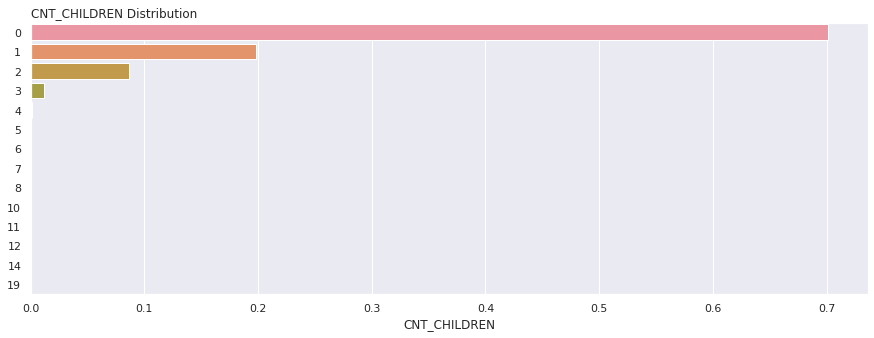

0    0.701136
1    0.198339
2    0.086891
3    0.011906
4    0.001341
5    0.000268
6    0.000061
7    0.000016
8    0.000008
12   0.000008
10   0.000008
19   0.000008
11   0.000004
14   0.000004
Name: CNT_CHILDREN, dtype: float64

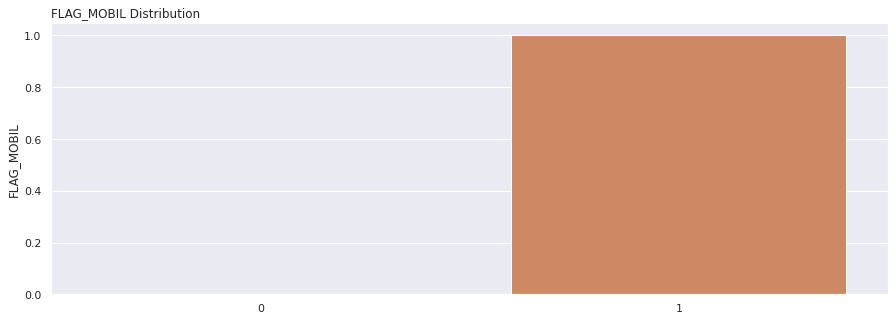

1   0.999996
0   0.000004
Name: FLAG_MOBIL, dtype: float64

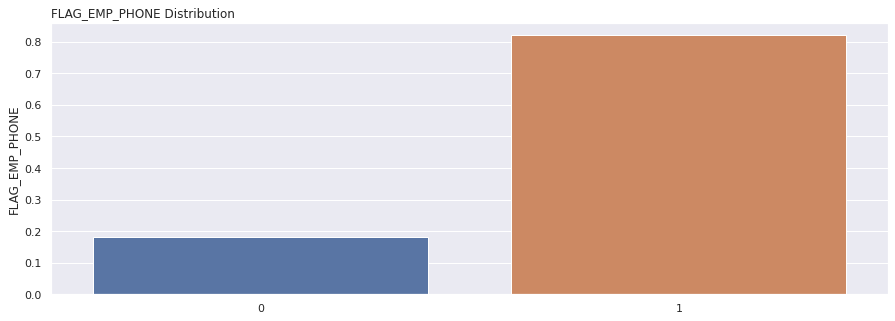

1   0.819481
0   0.180519
Name: FLAG_EMP_PHONE, dtype: float64

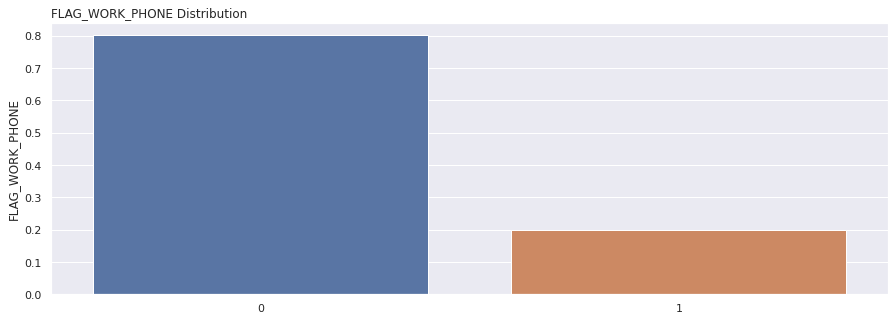

0   0.800905
1   0.199095
Name: FLAG_WORK_PHONE, dtype: float64

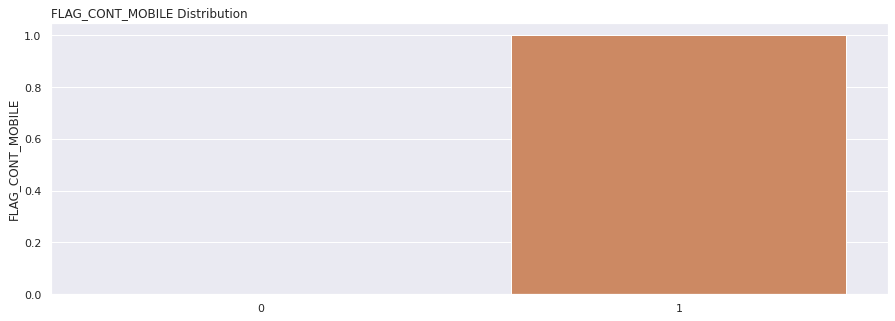

1   0.998138
0   0.001862
Name: FLAG_CONT_MOBILE, dtype: float64

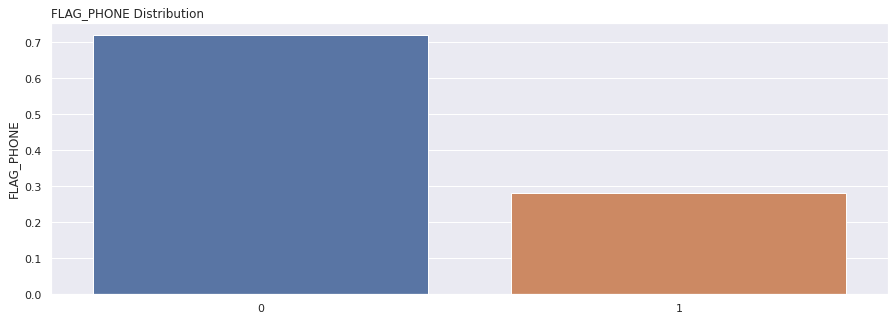

0   0.718977
1   0.281023
Name: FLAG_PHONE, dtype: float64

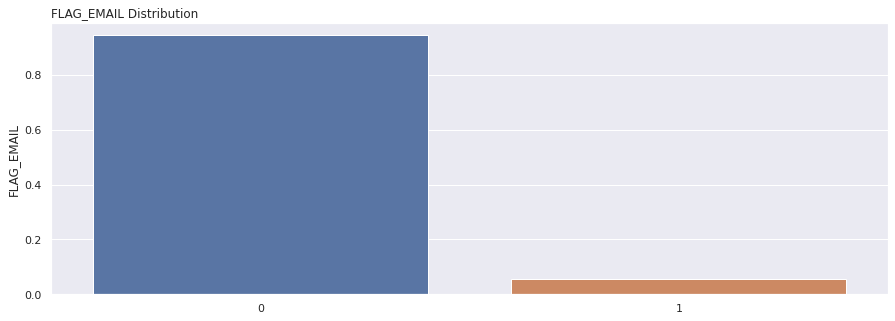

0   0.943278
1   0.056722
Name: FLAG_EMAIL, dtype: float64

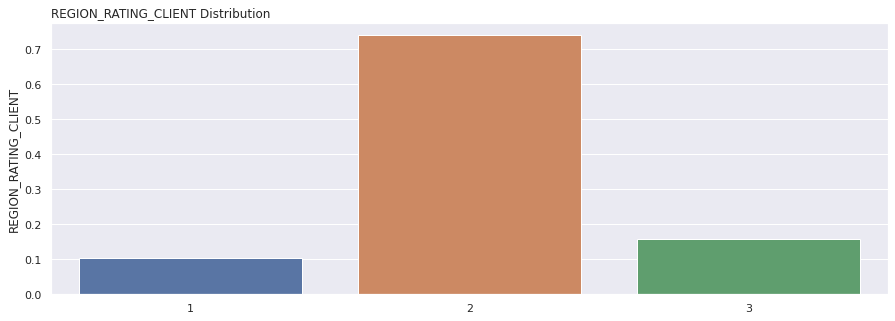

2   0.738143
3   0.156975
1   0.104883
Name: REGION_RATING_CLIENT, dtype: float64

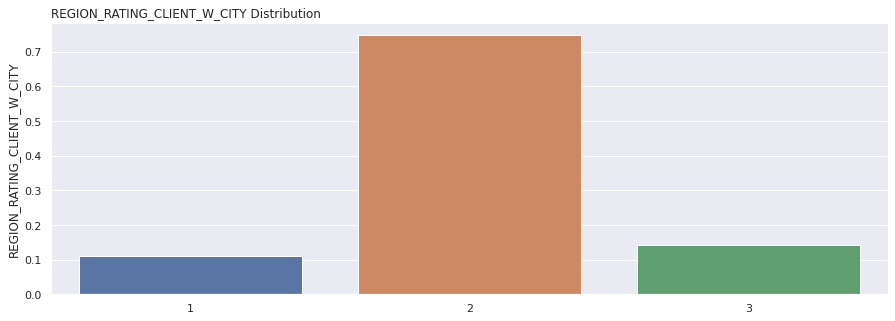

2   0.746305
3   0.142451
1   0.111244
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

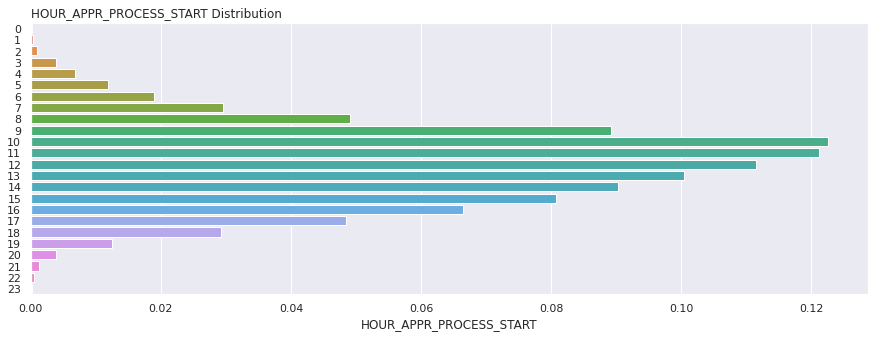

10   0.122545
11   0.121203
12   0.111444
13   0.100419
14   0.090294
9    0.089135
15   0.080737
16   0.066408
8    0.049133
17   0.048442
7    0.029593
18   0.029304
6    0.018922
19   0.012540
5    0.011849
4    0.006858
3    0.003963
20   0.003886
21   0.001301
2    0.000955
22   0.000512
1    0.000285
0    0.000138
23   0.000134
Name: HOUR_APPR_PROCESS_START, dtype: float64

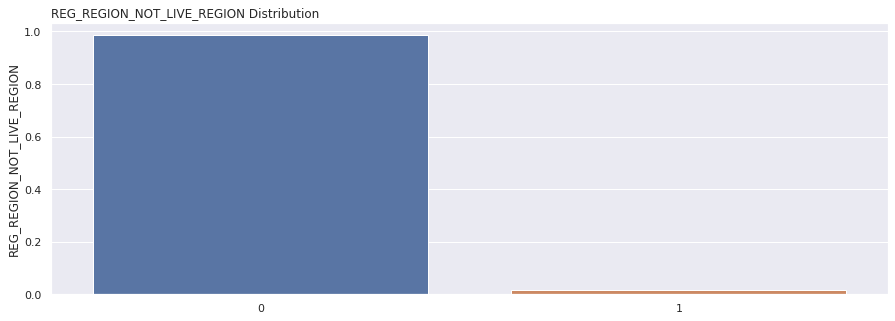

0   0.984814
1   0.015186
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64

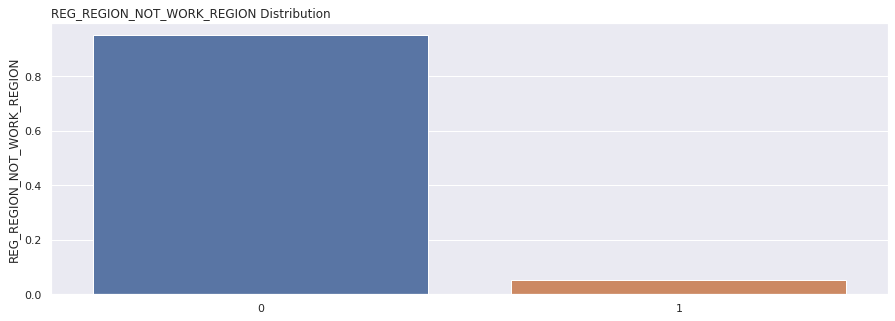

0   0.949384
1   0.050616
Name: REG_REGION_NOT_WORK_REGION, dtype: float64

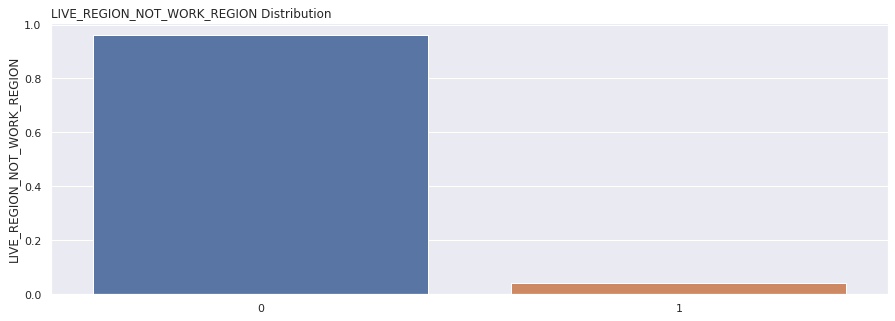

0   0.959501
1   0.040499
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64

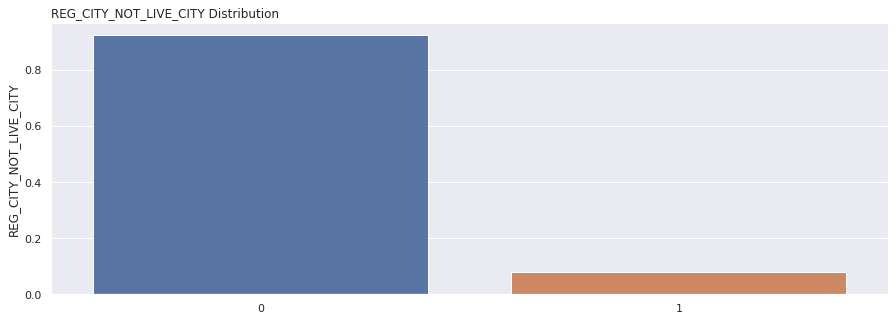

0   0.921746
1   0.078254
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64

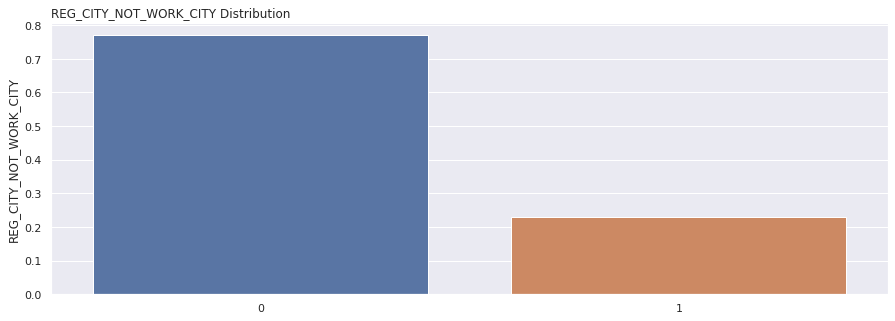

0   0.769459
1   0.230541
Name: REG_CITY_NOT_WORK_CITY, dtype: float64

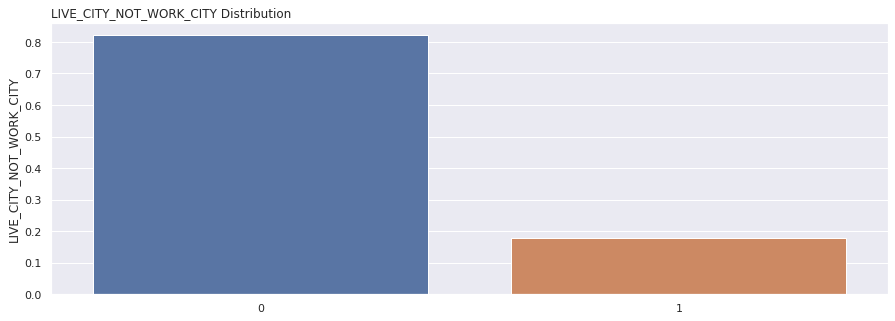

0   0.820408
1   0.179592
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64

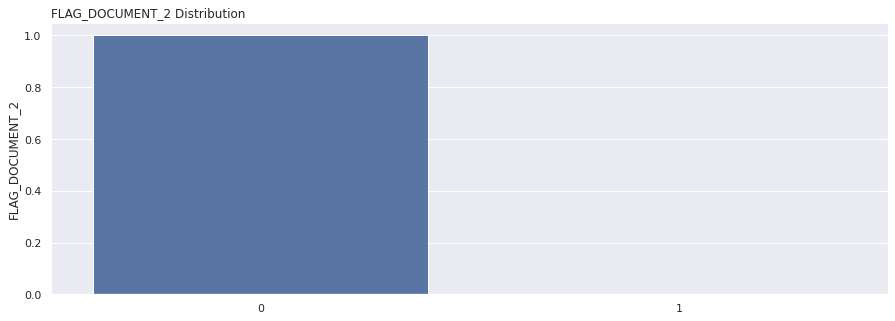

0   0.999959
1   0.000041
Name: FLAG_DOCUMENT_2, dtype: float64

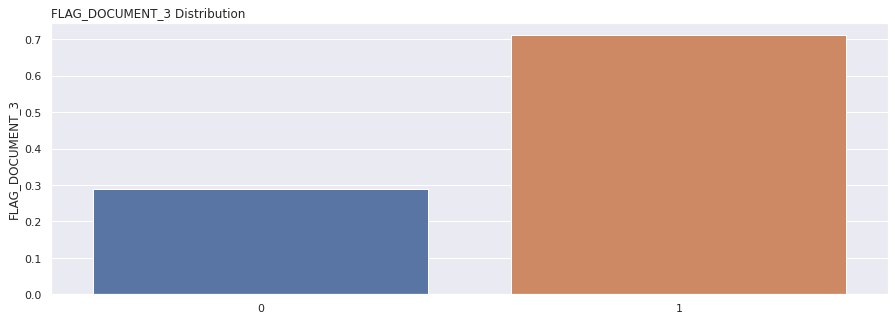

1   0.710790
0   0.289210
Name: FLAG_DOCUMENT_3, dtype: float64

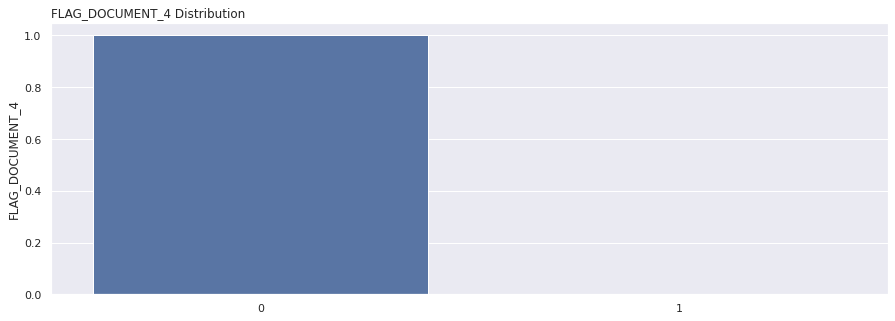

0   0.999915
1   0.000085
Name: FLAG_DOCUMENT_4, dtype: float64

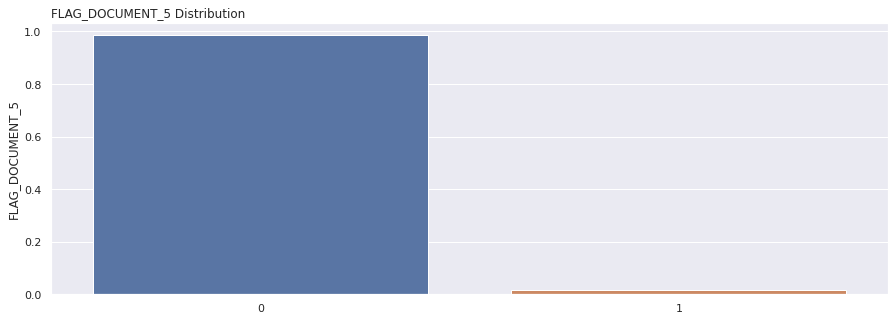

0   0.984899
1   0.015101
Name: FLAG_DOCUMENT_5, dtype: float64

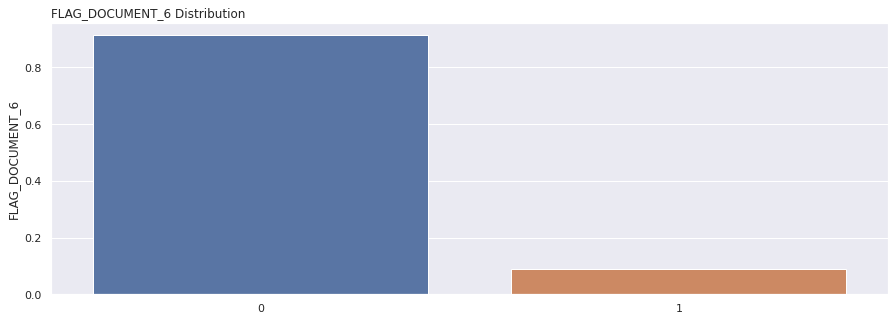

0   0.912068
1   0.087932
Name: FLAG_DOCUMENT_6, dtype: float64

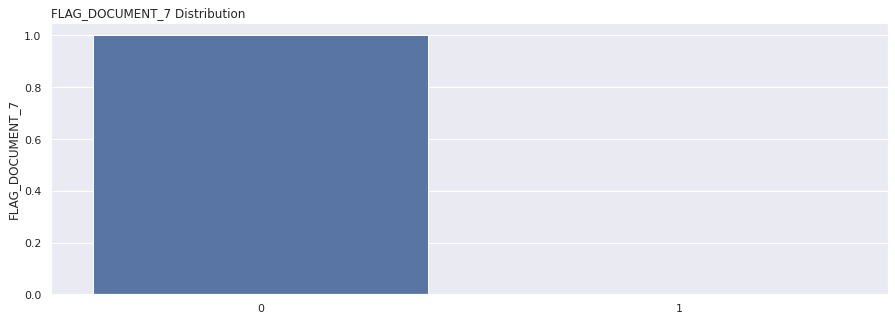

0   0.999809
1   0.000191
Name: FLAG_DOCUMENT_7, dtype: float64

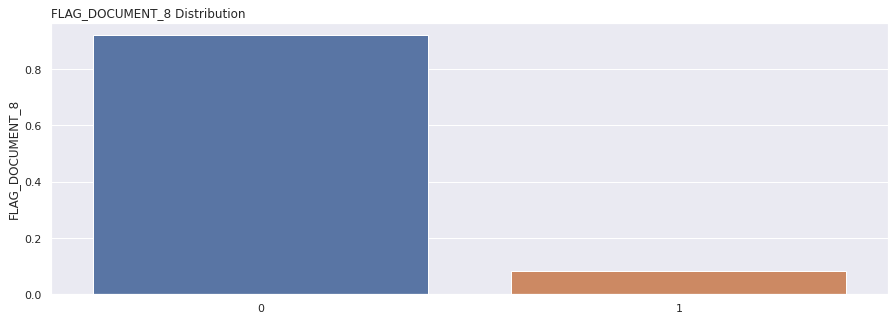

0   0.918897
1   0.081103
Name: FLAG_DOCUMENT_8, dtype: float64

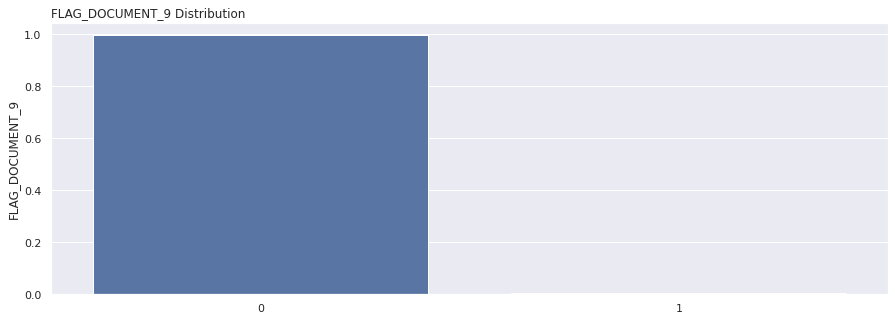

0   0.996179
1   0.003821
Name: FLAG_DOCUMENT_9, dtype: float64

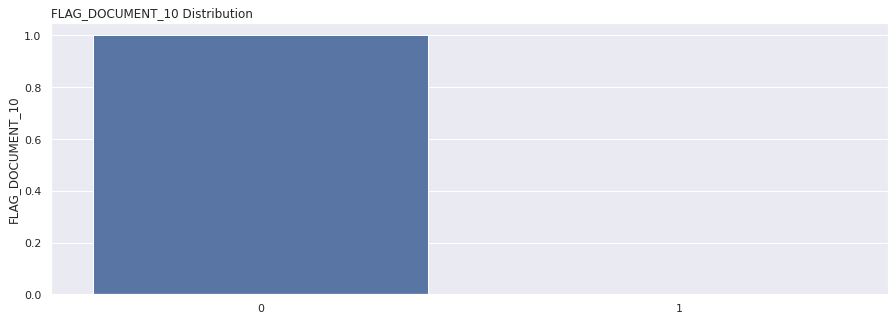

0   0.999988
1   0.000012
Name: FLAG_DOCUMENT_10, dtype: float64

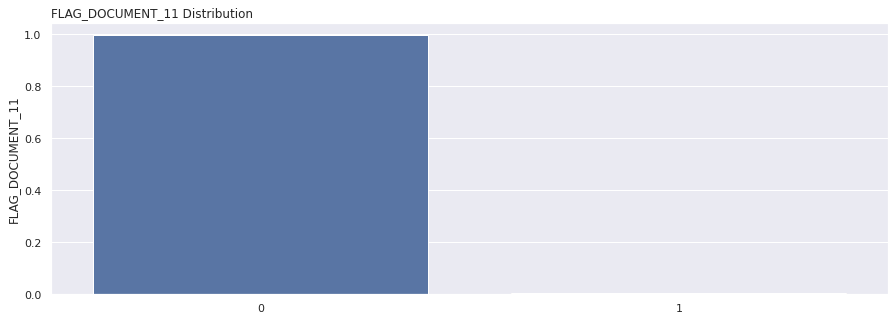

0   0.996094
1   0.003906
Name: FLAG_DOCUMENT_11, dtype: float64

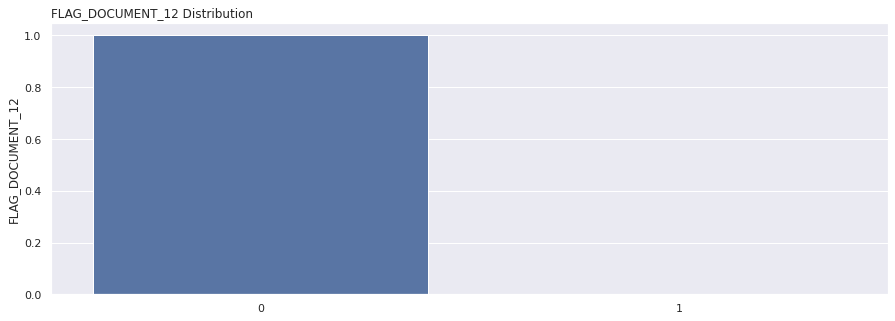

0   0.999992
1   0.000008
Name: FLAG_DOCUMENT_12, dtype: float64

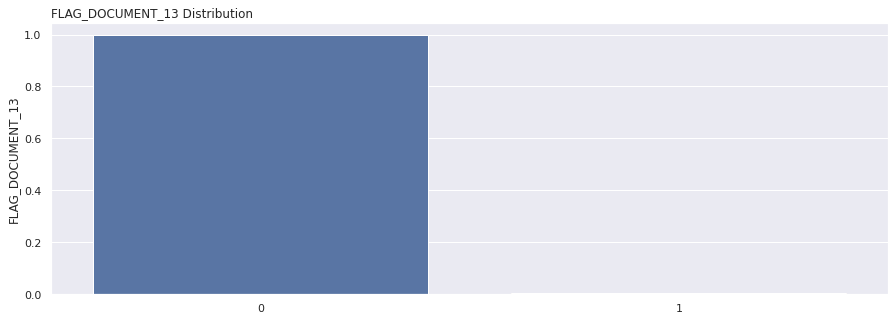

0   0.996419
1   0.003581
Name: FLAG_DOCUMENT_13, dtype: float64

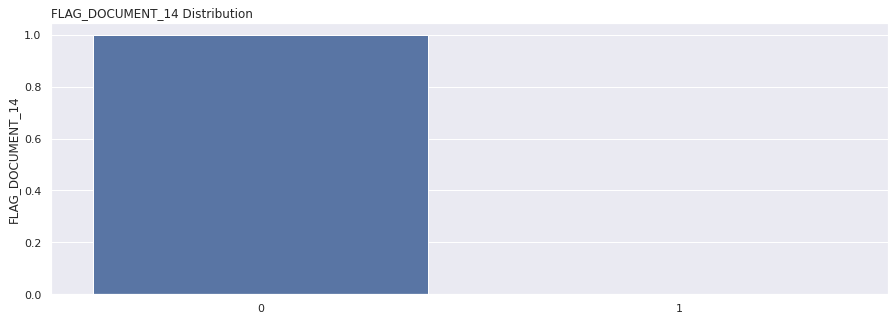

0   0.997049
1   0.002951
Name: FLAG_DOCUMENT_14, dtype: float64

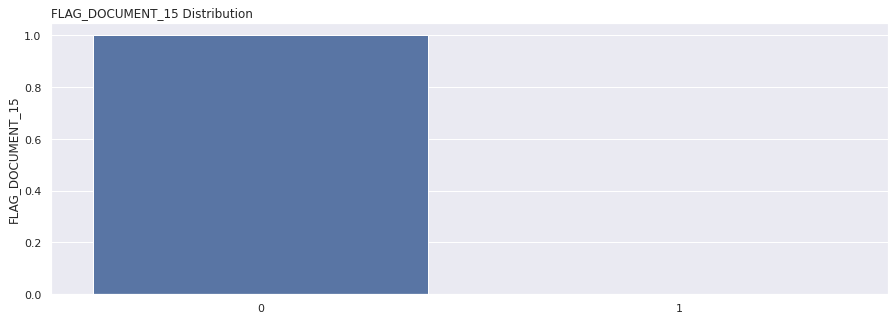

0   0.998825
1   0.001175
Name: FLAG_DOCUMENT_15, dtype: float64

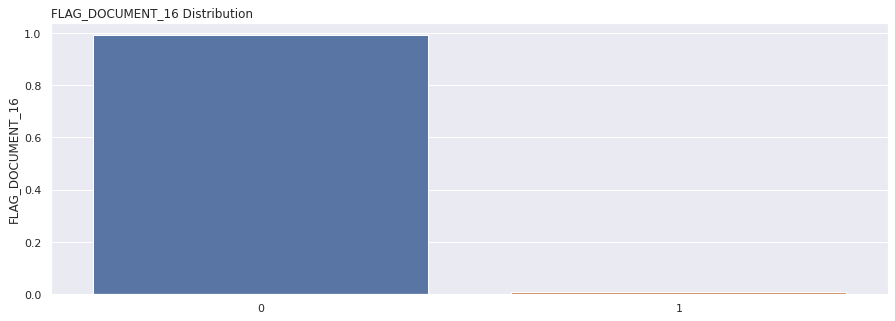

0   0.990004
1   0.009996
Name: FLAG_DOCUMENT_16, dtype: float64

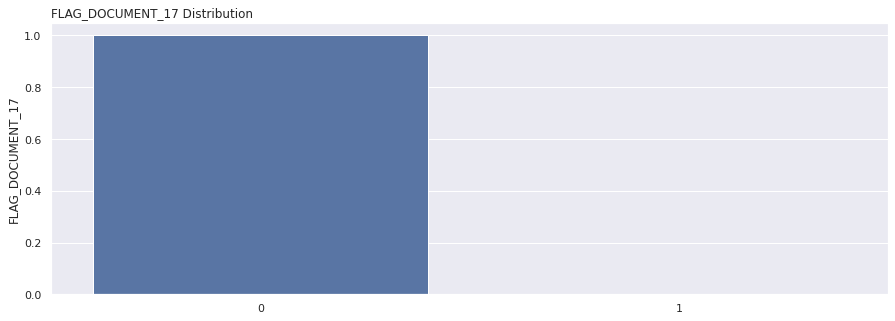

0   0.999736
1   0.000264
Name: FLAG_DOCUMENT_17, dtype: float64

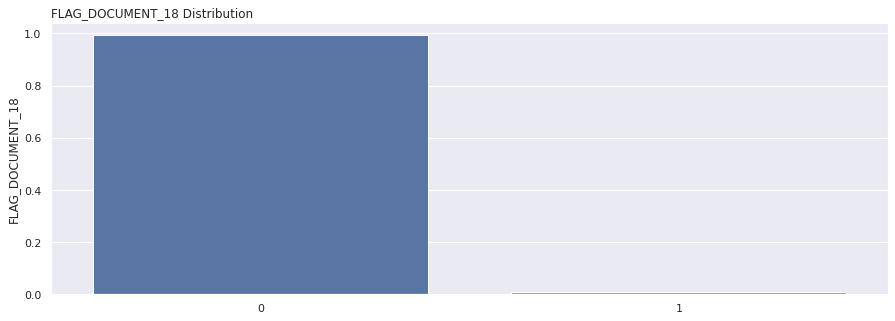

0   0.992025
1   0.007975
Name: FLAG_DOCUMENT_18, dtype: float64

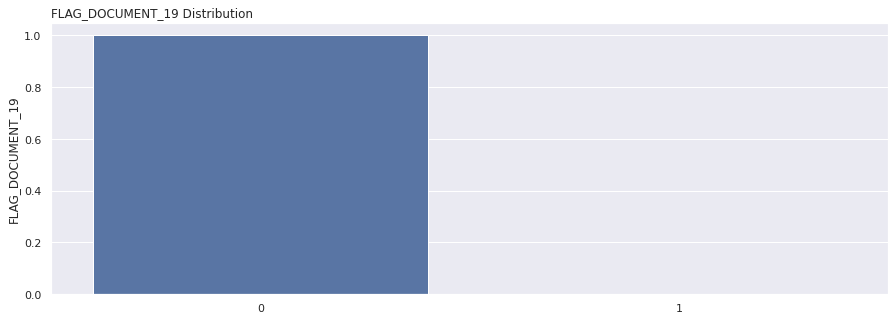

0   0.999411
1   0.000589
Name: FLAG_DOCUMENT_19, dtype: float64

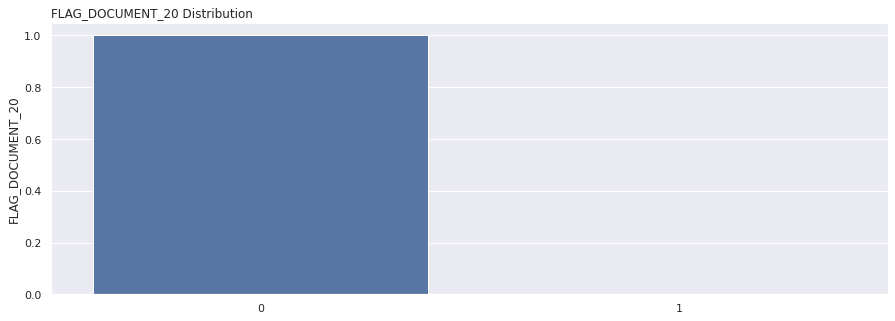

0   0.999492
1   0.000508
Name: FLAG_DOCUMENT_20, dtype: float64

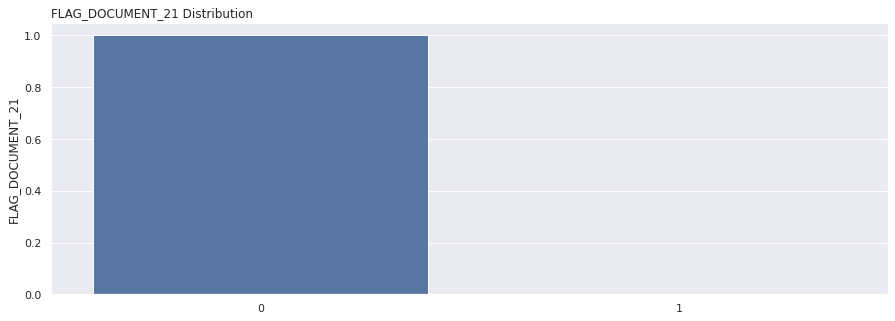

0   0.999711
1   0.000289
Name: FLAG_DOCUMENT_21, dtype: float64

In [33]:
for feature in discret_features:
    plot_percent_dist(feature)

___

## Features com "Muitos" Valores Únicos

Vamos olhar agora para as features contínuas.

In [34]:
pd.set_option('display.max_rows', 65)

df.select_dtypes(include=np.float64).describe().T

count           mean            std  \
AMT_INCOME_TOTAL             246,008.000000 168,912.156596 260,381.833423   
AMT_CREDIT                   246,008.000000 599,628.308417 403,067.181274   
AMT_ANNUITY                  245,998.000000  27,129.162648  14,504.965232   
AMT_GOODS_PRICE              245,782.000000 538,928.932275 369,973.841559   
REGION_POPULATION_RELATIVE   246,008.000000       0.020882       0.013852   
DAYS_REGISTRATION            246,008.000000  -4,988.033300   3,520.987048   
OWN_CAR_AGE                   83,649.000000      12.034346      11.861705   
CNT_FAM_MEMBERS              246,007.000000       2.150760       0.909167   
EXT_SOURCE_1                 107,205.000000       0.502277       0.211078   
EXT_SOURCE_2                 245,464.000000       0.514392       0.190891   
EXT_SOURCE_3                 197,280.000000       0.510838       0.194880   
APARTMENTS_AVG               121,053.000000       0.117426       0.108059   
BASEMENTAREA_AVG             101,918.000000       0.088385       0.082228   
YEARS_BEGINEXPLUATATION_AVG  125,912.000000       0.977715       0.059405   
YEARS_BUILD_AVG               82,328.000000       0.752387       0.113013   
COMMONAREA_AVG                74,030.000000       0.044643       0.075547   
ELEVATORS_AVG                114,800.000000       0.078917       0.134542   
ENTRANCES_AVG                122,064.000000       0.149693       0.099886   
FLOORSMAX_AVG                123,525.000000       0.226097       0.144524   
FLOORSMIN_AVG                 79,009.000000       0.231765       0.161308   
LANDAREA_AVG                  99,921.000000       0.066152       0.080915   
LIVINGAPARTMENTS_AVG          77,730.000000       0.100702       0.092138   
LIVINGAREA_AVG               122,391.000000       0.107329       0.110374   
NONLIVINGAPARTMENTS_AVG       75,094.000000       0.008674       0.046717   
NONLIVINGAREA_AVG            110,148.000000       0.028299       0.069178   
APARTMENTS_MODE              121,053.000000       0.114261       0.107892   
BASEMENTAREA_MODE            101,918.000000       0.087517       0.084158   
YEARS_BEGINEXPLUATATION_MODE 125,912.000000       0.977066       0.064524   
YEARS_BUILD_MODE              82,328.000000       0.759530       0.109838   
COMMONAREA_MODE               74,030.000000       0.042587       0.074033   
ELEVATORS_MODE               114,800.000000       0.074466       0.132289   
ENTRANCES_MODE               122,064.000000       0.145183       0.100822   
FLOORSMAX_MODE               123,525.000000       0.222161       0.143613   
FLOORSMIN_MODE                79,009.000000       0.227929       0.161073   
LANDAREA_MODE                 99,921.000000       0.064770       0.081370   
LIVINGAPARTMENTS_MODE         77,730.000000       0.105589       0.097539   
LIVINGAREA_MODE              122,391.000000       0.105934       0.111664   
NONLIVINGAPARTMENTS_MODE      75,094.000000       0.007917       0.045087   
NONLIVINGAREA_MODE           110,148.000000       0.026986       0.069954   
APARTMENTS_MEDI              121,053.000000       0.117851       0.108926   
BASEMENTAREA_MEDI            101,918.000000       0.087902       0.081984   
YEARS_BEGINEXPLUATATION_MEDI 125,912.000000       0.977722       0.060121   
YEARS_BUILD_MEDI              82,328.000000       0.755640       0.111812   
COMMONAREA_MEDI               74,030.000000       0.044617       0.075697   
ELEVATORS_MEDI               114,800.000000       0.078030       0.134423   
ENTRANCES_MEDI               122,064.000000       0.149187       0.100206   
FLOORSMAX_MEDI               123,525.000000       0.225701       0.144954   
FLOORSMIN_MEDI                79,009.000000       0.231482       0.161801   
LANDAREA_MEDI                 99,921.000000       0.066967       0.081824   
LIVINGAPARTMENTS_MEDI         77,730.000000       0.101897       0.093252   
LIVINGAREA_MEDI              122,391.000000       0.108541       0.112075   
NONLIVINGAPARTMENTS_MEDI      75,0

Observado os dados acima, vemos que há mais uma feature com contagem de dias: 'DAYS_REGISTRATION'.

Vamos adcioná-la à lista com as features deste tipo.

In [35]:
days_features.append('DAYS_REGISTRATION')
days_features

['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION']

### Features Discretas com Poucos Níveis

Observando as medidas acima obtidas, percebe-se que algumas das features guardadas como contínuas podem ser, na verdade, discretas. A lista a seguir elenca todas as possíveis features discretas.

In [36]:
possibly_discret = [
    'OWN_CAR_AGE', 
    'CNT_FAM_MEMBERS', 
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR'
]

In [37]:
for feature in possibly_discret:
    print(f'{feature}')
    
    display(df[feature].value_counts(normalize=True, dropna=False))
    
    print('='*80)

OWN_CAR_AGE


NaN         0.659974
7.000000    0.024333
3.000000    0.020694
6.000000    0.020613
8.000000    0.019125
2.000000    0.019056
4.000000    0.017979
1.000000    0.017174
9.000000    0.016434
10.000000   0.015638
14.000000   0.015036
13.000000   0.014825
12.000000   0.013857
11.000000   0.013548
5.000000    0.011544
15.000000   0.011504
16.000000   0.010890
17.000000   0.009439
18.000000   0.007910
64.000000   0.007756
0.000000    0.006931
19.000000   0.006110
20.000000   0.005053
21.000000   0.004687
22.000000   0.004122
24.000000   0.003691
23.000000   0.003500
25.000000   0.002906
65.000000   0.002825
26.000000   0.001931
28.000000   0.001756
27.000000   0.001573
29.000000   0.001313
30.000000   0.001049
31.000000   0.000894
32.000000   0.000671
34.000000   0.000614
35.000000   0.000516
36.000000   0.000402
33.000000   0.000402
38.000000   0.000329
40.000000   0.000297
37.000000   0.000256
39.000000   0.000236
41.000000   0.000195
42.000000   0.000122
44.000000   0.000065
43.000000   0

CNT_FAM_MEMBERS


2.000000    0.515097
1.000000    0.221188
3.000000    0.170669
4.000000    0.080241
5.000000    0.011154
6.000000    0.001276
7.000000    0.000256
8.000000    0.000057
9.000000    0.000016
10.000000   0.000008
14.000000   0.000008
12.000000   0.000008
20.000000   0.000008
13.000000   0.000004
16.000000   0.000004
NaN         0.000004
Name: CNT_FAM_MEMBERS, dtype: float64

OBS_30_CNT_SOCIAL_CIRCLE


0.000000     0.532731
1.000000     0.159174
2.000000     0.096916
3.000000     0.065778
4.000000     0.046133
5.000000     0.030905
6.000000     0.020934
7.000000     0.014345
8.000000     0.009548
9.000000     0.006508
10.000000    0.004484
NaN          0.003305
11.000000    0.002817
12.000000    0.002179
13.000000    0.001374
14.000000    0.000841
15.000000    0.000598
16.000000    0.000406
17.000000    0.000301
19.000000    0.000159
18.000000    0.000146
21.000000    0.000098
20.000000    0.000089
22.000000    0.000065
23.000000    0.000053
24.000000    0.000041
25.000000    0.000037
27.000000    0.000016
26.000000    0.000008
29.000000    0.000004
348.000000   0.000004
30.000000    0.000004
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

OBS_60_CNT_SOCIAL_CIRCLE


0.000000     0.535166
1.000000     0.159422
2.000000     0.096753
3.000000     0.065494
4.000000     0.045527
5.000000     0.030601
6.000000     0.020593
7.000000     0.014203
8.000000     0.009264
9.000000     0.006382
10.000000    0.004362
NaN          0.003305
11.000000    0.002756
12.000000    0.002077
13.000000    0.001337
14.000000    0.000780
15.000000    0.000589
16.000000    0.000427
17.000000    0.000244
19.000000    0.000163
18.000000    0.000163
21.000000    0.000102
20.000000    0.000081
22.000000    0.000057
24.000000    0.000049
23.000000    0.000041
25.000000    0.000037
27.000000    0.000016
29.000000    0.000008
344.000000   0.000004
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

DEF_30_CNT_SOCIAL_CIRCLE


0.000000    0.882040
1.000000    0.092355
2.000000    0.017186
3.000000    0.004000
NaN         0.003305
4.000000    0.000890
5.000000    0.000179
6.000000    0.000037
7.000000    0.000004
34.000000   0.000004
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

DEF_60_CNT_SOCIAL_CIRCLE


0.000000    0.912596
1.000000    0.071144
2.000000    0.010370
NaN         0.003305
3.000000    0.002028
4.000000    0.000484
5.000000    0.000061
7.000000    0.000004
6.000000    0.000004
24.000000   0.000004
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

AMT_REQ_CREDIT_BUREAU_HOUR


0.000000   0.859964
NaN        0.134841
1.000000   0.004988
2.000000   0.000171
3.000000   0.000033
4.000000   0.000004
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

AMT_REQ_CREDIT_BUREAU_DAY


0.000000   0.860326
NaN        0.134841
1.000000   0.004207
2.000000   0.000329
3.000000   0.000154
4.000000   0.000093
5.000000   0.000020
6.000000   0.000016
9.000000   0.000008
8.000000   0.000004
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

AMT_REQ_CREDIT_BUREAU_WEEK


0.000000   0.837249
NaN        0.134841
1.000000   0.026837
2.000000   0.000667
3.000000   0.000183
4.000000   0.000122
6.000000   0.000057
5.000000   0.000020
8.000000   0.000016
7.000000   0.000008
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

AMT_REQ_CREDIT_BUREAU_MON


0.000000    0.722794
NaN         0.134841
1.000000    0.107822
2.000000    0.017536
3.000000    0.006512
4.000000    0.003524
5.000000    0.001939
6.000000    0.001098
7.000000    0.000963
9.000000    0.000699
8.000000    0.000573
10.000000   0.000415
11.000000   0.000398
12.000000   0.000248
13.000000   0.000236
14.000000   0.000130
15.000000   0.000089
16.000000   0.000081
17.000000   0.000053
18.000000   0.000020
19.000000   0.000012
27.000000   0.000004
23.000000   0.000004
24.000000   0.000004
22.000000   0.000004
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

AMT_REQ_CREDIT_BUREAU_QRT


0.000000    0.700815
NaN         0.134841
1.000000    0.109992
2.000000    0.046925
3.000000    0.005610
4.000000    0.001496
5.000000    0.000191
6.000000    0.000089
7.000000    0.000020
8.000000    0.000016
19.000000   0.000004
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

AMT_REQ_CREDIT_BUREAU_YEAR


0.000000    0.233236
1.000000    0.206741
2.000000    0.162999
NaN         0.134841
3.000000    0.109403
4.000000    0.067213
5.000000    0.039373
6.000000    0.022841
7.000000    0.012475
8.000000    0.006833
9.000000    0.003602
11.000000   0.000093
12.000000   0.000089
10.000000   0.000069
13.000000   0.000061
14.000000   0.000037
17.000000   0.000024
15.000000   0.000020
18.000000   0.000016
16.000000   0.000012
19.000000   0.000008
20.000000   0.000004
23.000000   0.000004
22.000000   0.000004
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

De fato, todas são discretas mas apresentam valores nulos, ou seja, dados faltantes que por natureza são tratados como floats.

Observamos ainda que na feature 'OWN_CAR_AGE' não há registros de dados em quase 66% da série.

Para estas features que em verdade são discretas, vamos plotar a distibuição dos níveis dentro de cada uma.

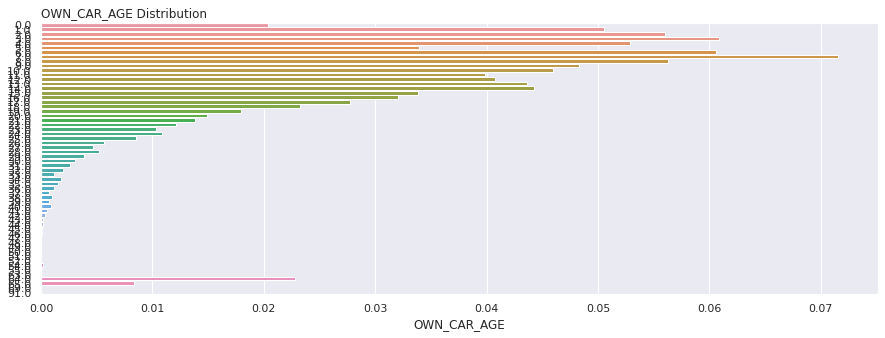

7.000000    0.071561
3.000000    0.060861
6.000000    0.060622
8.000000    0.056247
2.000000    0.056044
4.000000    0.052876
1.000000    0.050509
9.000000    0.048333
10.000000   0.045990
14.000000   0.044220
13.000000   0.043599
12.000000   0.040754
11.000000   0.039845
5.000000    0.033951
15.000000   0.033832
16.000000   0.032027
17.000000   0.027759
18.000000   0.023264
64.000000   0.022810
0.000000    0.020383
19.000000   0.017968
20.000000   0.014860
21.000000   0.013784
22.000000   0.012122
24.000000   0.010855
23.000000   0.010293
25.000000   0.008548
65.000000   0.008309
26.000000   0.005678
28.000000   0.005164
27.000000   0.004626
29.000000   0.003861
30.000000   0.003084
31.000000   0.002630
32.000000   0.001973
34.000000   0.001805
35.000000   0.001518
33.000000   0.001184
36.000000   0.001184
38.000000   0.000968
40.000000   0.000873
37.000000   0.000753
39.000000   0.000693
41.000000   0.000574
42.000000   0.000359
44.000000   0.000191
43.000000   0.000167
54.000000   0

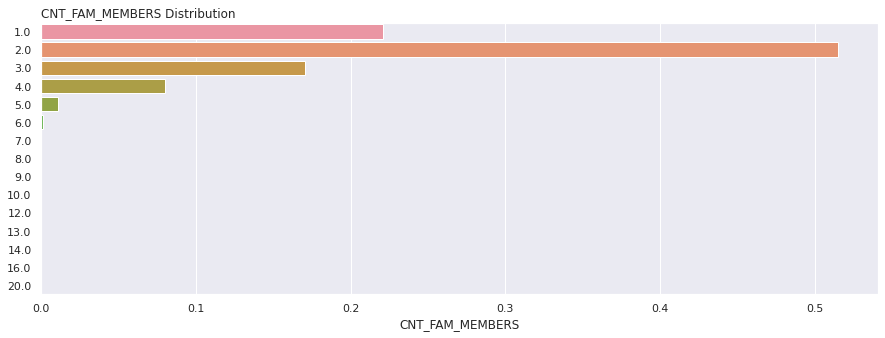

2.000000    0.515099
1.000000    0.221189
3.000000    0.170670
4.000000    0.080242
5.000000    0.011154
6.000000    0.001276
7.000000    0.000256
8.000000    0.000057
9.000000    0.000016
10.000000   0.000008
14.000000   0.000008
12.000000   0.000008
20.000000   0.000008
13.000000   0.000004
16.000000   0.000004
Name: CNT_FAM_MEMBERS, dtype: float64

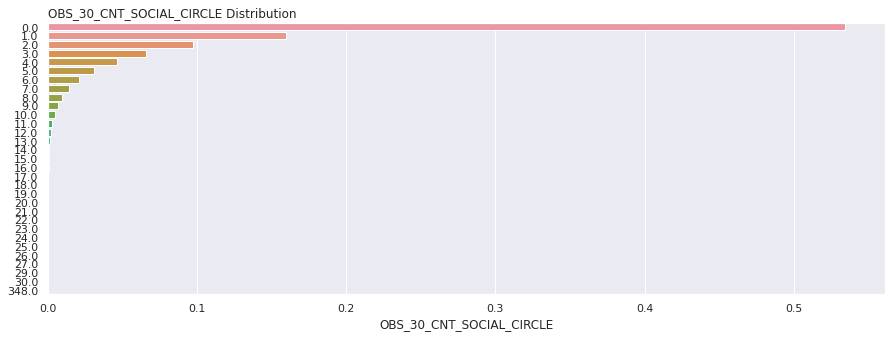

0.000000     0.534497
1.000000     0.159701
2.000000     0.097237
3.000000     0.065996
4.000000     0.046286
5.000000     0.031008
6.000000     0.021004
7.000000     0.014393
8.000000     0.009580
9.000000     0.006529
10.000000    0.004498
11.000000    0.002826
12.000000    0.002186
13.000000    0.001378
14.000000    0.000844
15.000000    0.000600
16.000000    0.000408
17.000000    0.000302
19.000000    0.000159
18.000000    0.000147
21.000000    0.000098
20.000000    0.000090
22.000000    0.000065
23.000000    0.000053
24.000000    0.000041
25.000000    0.000037
27.000000    0.000016
26.000000    0.000008
29.000000    0.000004
348.000000   0.000004
30.000000    0.000004
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

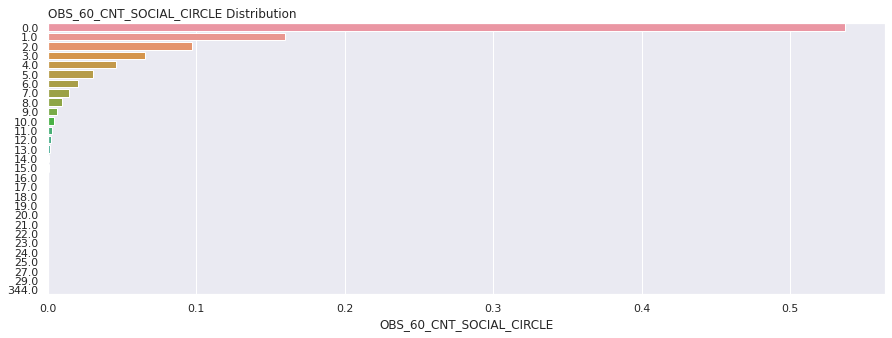

0.000000     0.536940
1.000000     0.159950
2.000000     0.097074
3.000000     0.065711
4.000000     0.045678
5.000000     0.030702
6.000000     0.020661
7.000000     0.014250
8.000000     0.009295
9.000000     0.006403
10.000000    0.004376
11.000000    0.002765
12.000000    0.002084
13.000000    0.001342
14.000000    0.000783
15.000000    0.000591
16.000000    0.000428
17.000000    0.000245
19.000000    0.000163
18.000000    0.000163
21.000000    0.000102
20.000000    0.000082
22.000000    0.000057
24.000000    0.000049
23.000000    0.000041
25.000000    0.000037
27.000000    0.000016
29.000000    0.000008
344.000000   0.000004
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

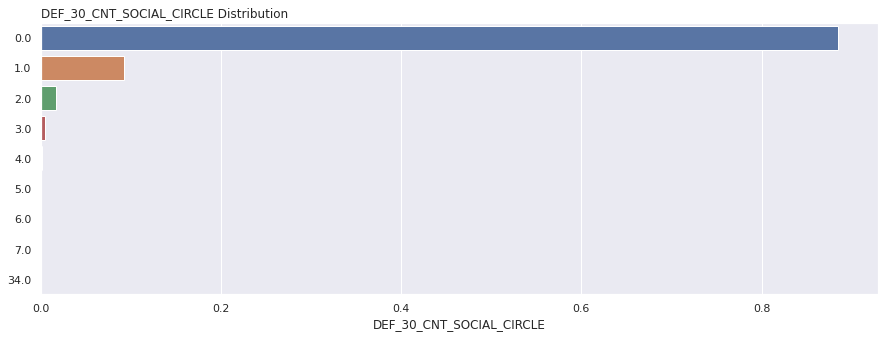

0.000000    0.884965
1.000000    0.092661
2.000000    0.017243
3.000000    0.004013
4.000000    0.000893
5.000000    0.000179
6.000000    0.000037
7.000000    0.000004
34.000000   0.000004
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

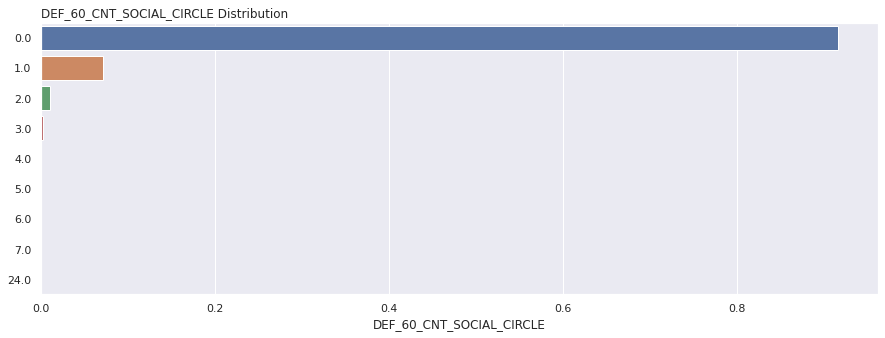

0.000000    0.915622
1.000000    0.071380
2.000000    0.010404
3.000000    0.002035
4.000000    0.000485
5.000000    0.000061
7.000000    0.000004
6.000000    0.000004
24.000000   0.000004
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

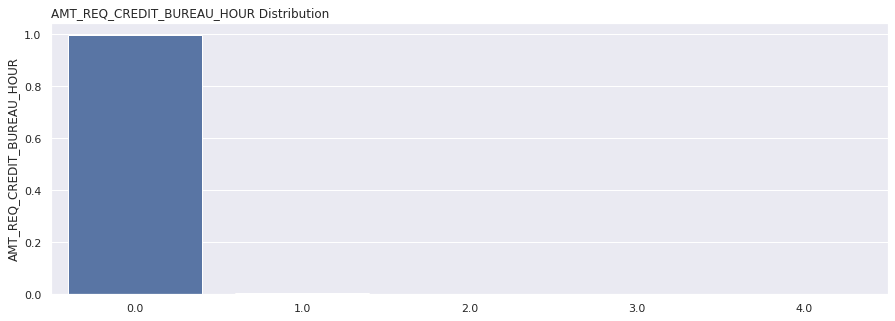

0.000000   0.993995
1.000000   0.005765
2.000000   0.000197
3.000000   0.000038
4.000000   0.000005
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

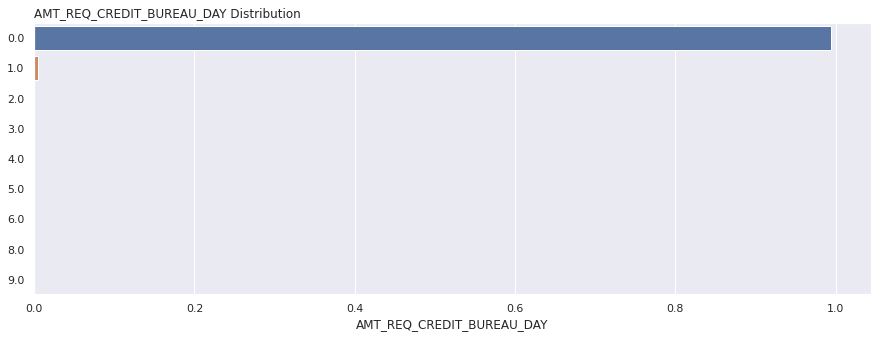

0.000000   0.994414
1.000000   0.004863
2.000000   0.000381
3.000000   0.000179
4.000000   0.000108
5.000000   0.000023
6.000000   0.000019
9.000000   0.000009
8.000000   0.000005
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

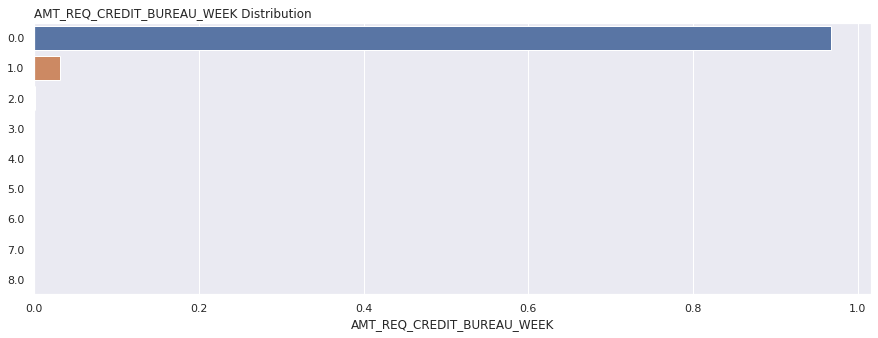

0.000000   0.967740
1.000000   0.031019
2.000000   0.000771
3.000000   0.000211
4.000000   0.000141
6.000000   0.000066
5.000000   0.000023
8.000000   0.000019
7.000000   0.000009
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

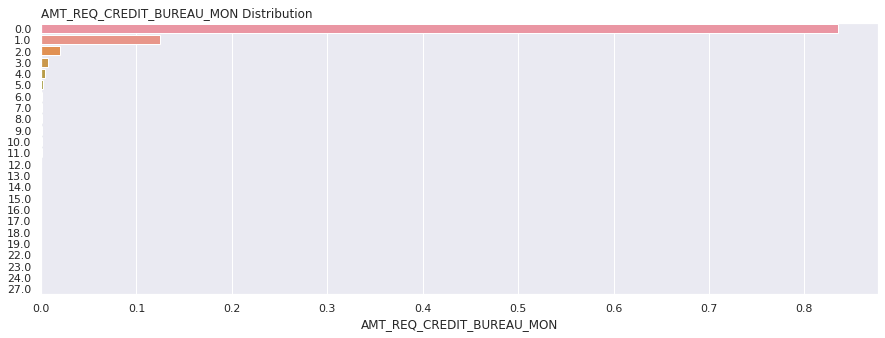

0.000000    0.835446
1.000000    0.124626
2.000000    0.020269
3.000000    0.007527
4.000000    0.004074
5.000000    0.002241
6.000000    0.001269
7.000000    0.001114
9.000000    0.000808
8.000000    0.000662
10.000000   0.000479
11.000000   0.000460
12.000000   0.000287
13.000000   0.000273
14.000000   0.000150
15.000000   0.000103
16.000000   0.000094
17.000000   0.000061
18.000000   0.000023
19.000000   0.000014
24.000000   0.000005
27.000000   0.000005
23.000000   0.000005
22.000000   0.000005
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

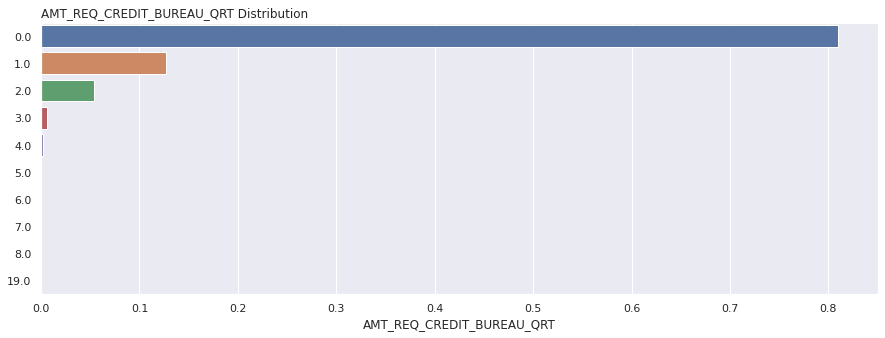

0.000000    0.810042
1.000000    0.127135
2.000000    0.054239
3.000000    0.006484
4.000000    0.001729
5.000000    0.000221
6.000000    0.000103
7.000000    0.000023
8.000000    0.000019
19.000000   0.000005
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

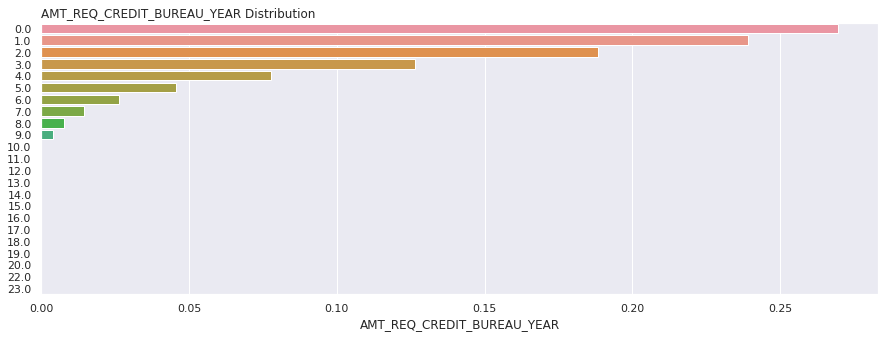

0.000000    0.269588
1.000000    0.238963
2.000000    0.188403
3.000000    0.126454
4.000000    0.077689
5.000000    0.045509
6.000000    0.026401
7.000000    0.014420
8.000000    0.007898
9.000000    0.004163
11.000000   0.000108
12.000000   0.000103
10.000000   0.000080
13.000000   0.000070
14.000000   0.000042
17.000000   0.000028
15.000000   0.000023
18.000000   0.000019
16.000000   0.000014
19.000000   0.000009
20.000000   0.000005
23.000000   0.000005
22.000000   0.000005
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [38]:
for feature in possibly_discret:
    plot_percent_dist(feature)

### Features com Muitos Níveis

Para as demais features, ou seja, as contínuas ou as discretas com muitos níveis e/ou intervalo de valores grande.

In [39]:
pd.set_option('display.max_rows', 65)

df.select_dtypes(include=np.float64).describe().T

count           mean            std  \
AMT_INCOME_TOTAL             246,008.000000 168,912.156596 260,381.833423   
AMT_CREDIT                   246,008.000000 599,628.308417 403,067.181274   
AMT_ANNUITY                  245,998.000000  27,129.162648  14,504.965232   
AMT_GOODS_PRICE              245,782.000000 538,928.932275 369,973.841559   
REGION_POPULATION_RELATIVE   246,008.000000       0.020882       0.013852   
DAYS_REGISTRATION            246,008.000000  -4,988.033300   3,520.987048   
OWN_CAR_AGE                   83,649.000000      12.034346      11.861705   
CNT_FAM_MEMBERS              246,007.000000       2.150760       0.909167   
EXT_SOURCE_1                 107,205.000000       0.502277       0.211078   
EXT_SOURCE_2                 245,464.000000       0.514392       0.190891   
EXT_SOURCE_3                 197,280.000000       0.510838       0.194880   
APARTMENTS_AVG               121,053.000000       0.117426       0.108059   
BASEMENTAREA_AVG             101,918.000000       0.088385       0.082228   
YEARS_BEGINEXPLUATATION_AVG  125,912.000000       0.977715       0.059405   
YEARS_BUILD_AVG               82,328.000000       0.752387       0.113013   
COMMONAREA_AVG                74,030.000000       0.044643       0.075547   
ELEVATORS_AVG                114,800.000000       0.078917       0.134542   
ENTRANCES_AVG                122,064.000000       0.149693       0.099886   
FLOORSMAX_AVG                123,525.000000       0.226097       0.144524   
FLOORSMIN_AVG                 79,009.000000       0.231765       0.161308   
LANDAREA_AVG                  99,921.000000       0.066152       0.080915   
LIVINGAPARTMENTS_AVG          77,730.000000       0.100702       0.092138   
LIVINGAREA_AVG               122,391.000000       0.107329       0.110374   
NONLIVINGAPARTMENTS_AVG       75,094.000000       0.008674       0.046717   
NONLIVINGAREA_AVG            110,148.000000       0.028299       0.069178   
APARTMENTS_MODE              121,053.000000       0.114261       0.107892   
BASEMENTAREA_MODE            101,918.000000       0.087517       0.084158   
YEARS_BEGINEXPLUATATION_MODE 125,912.000000       0.977066       0.064524   
YEARS_BUILD_MODE              82,328.000000       0.759530       0.109838   
COMMONAREA_MODE               74,030.000000       0.042587       0.074033   
ELEVATORS_MODE               114,800.000000       0.074466       0.132289   
ENTRANCES_MODE               122,064.000000       0.145183       0.100822   
FLOORSMAX_MODE               123,525.000000       0.222161       0.143613   
FLOORSMIN_MODE                79,009.000000       0.227929       0.161073   
LANDAREA_MODE                 99,921.000000       0.064770       0.081370   
LIVINGAPARTMENTS_MODE         77,730.000000       0.105589       0.097539   
LIVINGAREA_MODE              122,391.000000       0.105934       0.111664   
NONLIVINGAPARTMENTS_MODE      75,094.000000       0.007917       0.045087   
NONLIVINGAREA_MODE           110,148.000000       0.026986       0.069954   
APARTMENTS_MEDI              121,053.000000       0.117851       0.108926   
BASEMENTAREA_MEDI            101,918.000000       0.087902       0.081984   
YEARS_BEGINEXPLUATATION_MEDI 125,912.000000       0.977722       0.060121   
YEARS_BUILD_MEDI              82,328.000000       0.755640       0.111812   
COMMONAREA_MEDI               74,030.000000       0.044617       0.075697   
ELEVATORS_MEDI               114,800.000000       0.078030       0.134423   
ENTRANCES_MEDI               122,064.000000       0.149187       0.100206   
FLOORSMAX_MEDI               123,525.000000       0.225701       0.144954   
FLOORSMIN_MEDI                79,009.000000       0.231482       0.161801   
LANDAREA_MEDI                 99,921.000000       0.066967       0.081824   
LIVINGAPARTMENTS_MEDI         77,730.000000       0.101897       0.093252   
LIVINGAREA_MEDI              122,391.000000       0.108541       0.112075   
NONLIVINGAPARTMENTS_MEDI      75,0

Para as 4 primeiras da tabela acima, vamos usar escala logaritimica pois há valores muito grandes.

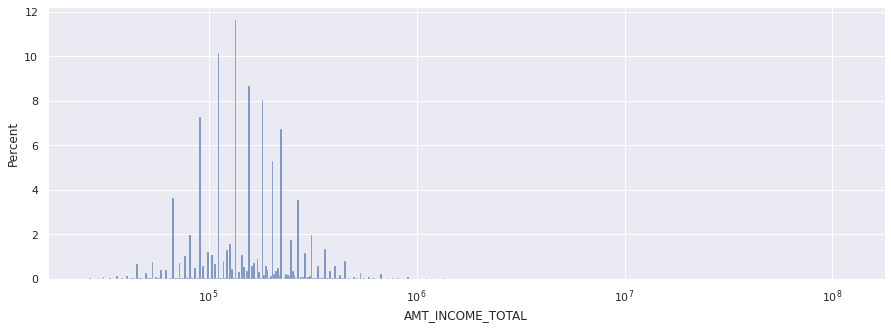

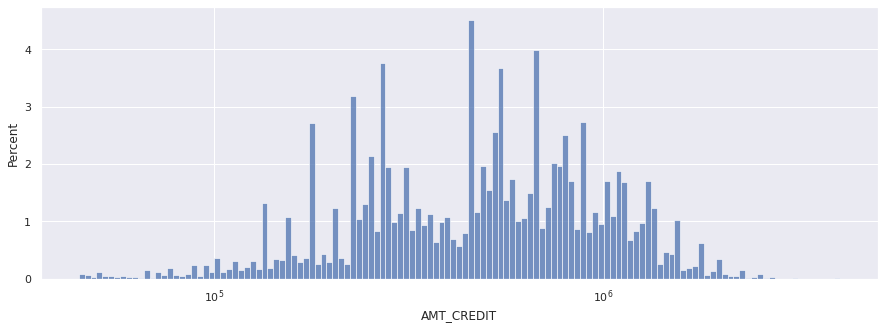

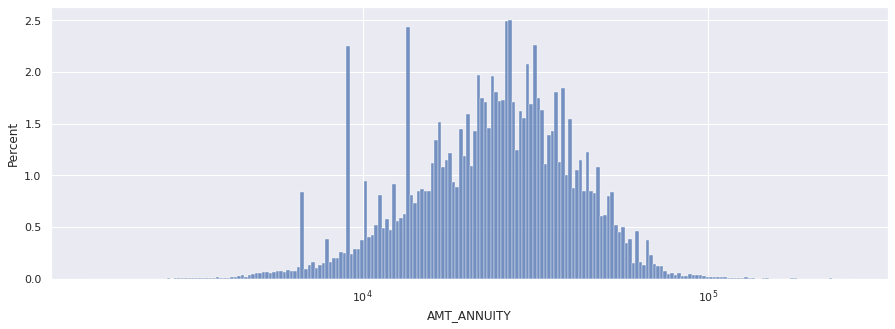

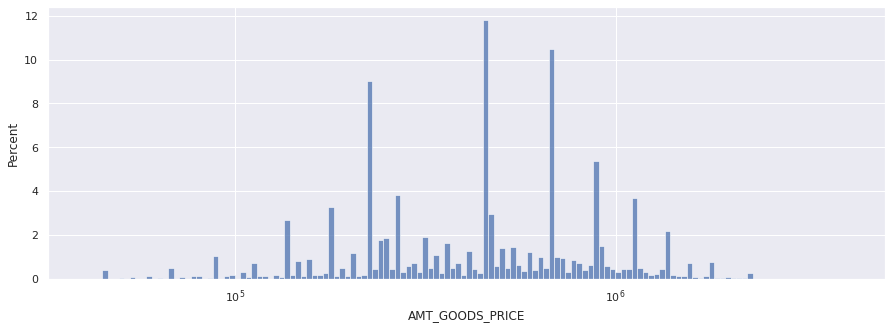

In [40]:
for feature in df.select_dtypes(include=np.float64).columns[:4]:
    sns.histplot(x=df[feature], stat='percent', log_scale=True)
    plt.show()

Selecionando as features contínuas que ainda não analisamos.

In [41]:
remaining_features = [col for col in df.select_dtypes(include=np.float64).columns[5:] 
 if col not in days_features + possibly_discret]

remaining_features

['EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'DAYS_LAST_PHONE_CH

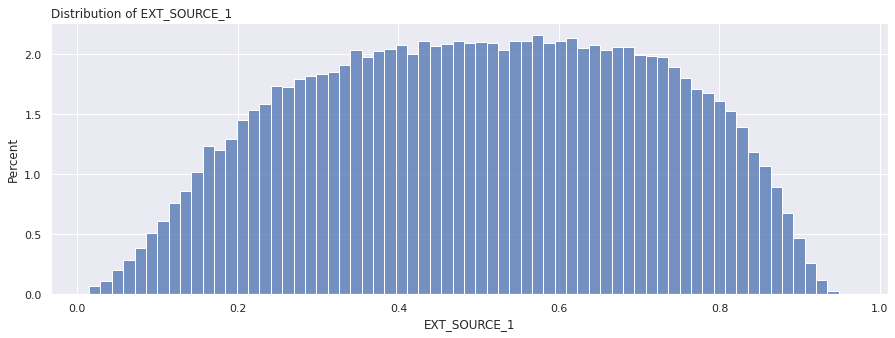

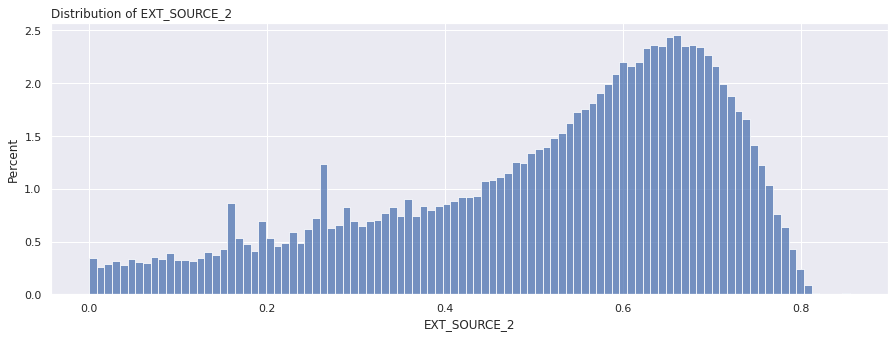

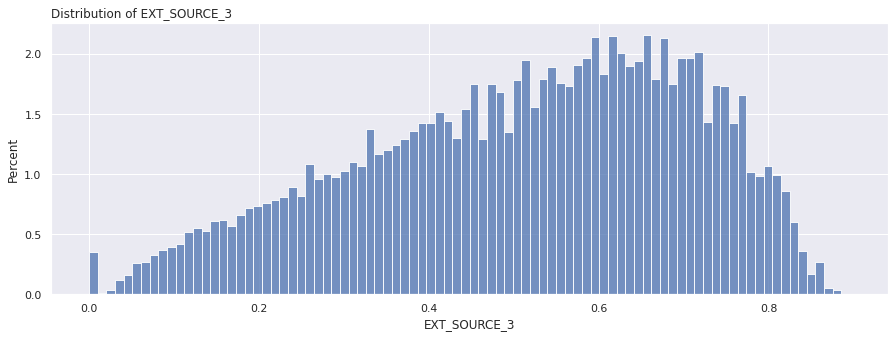

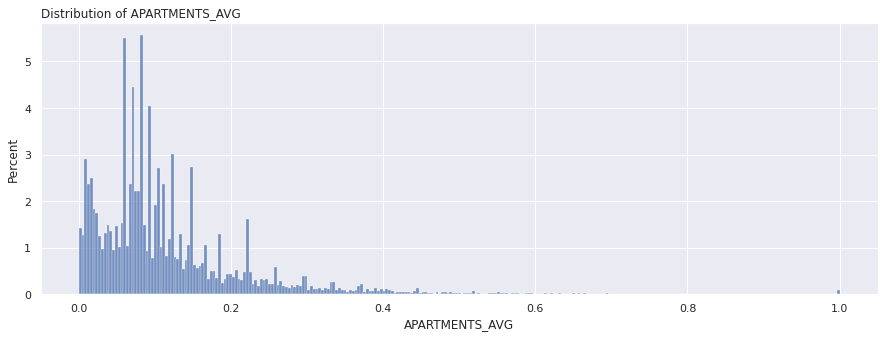

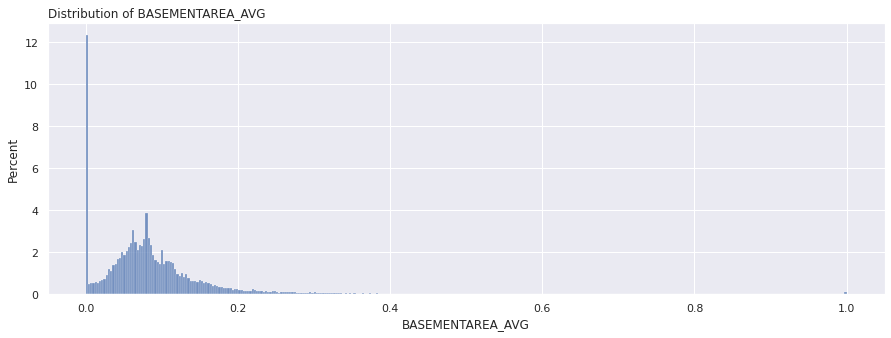

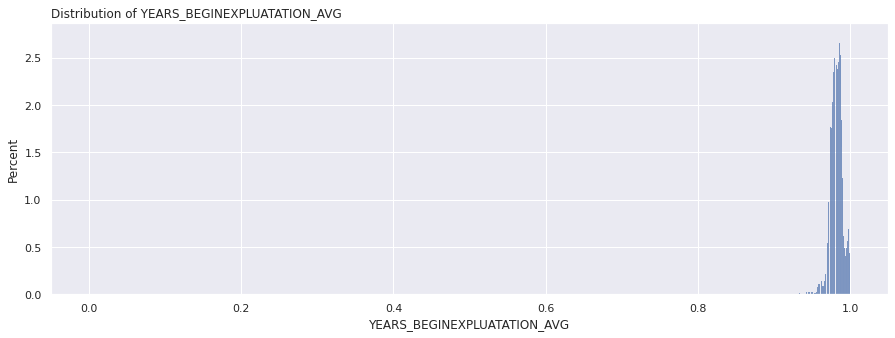

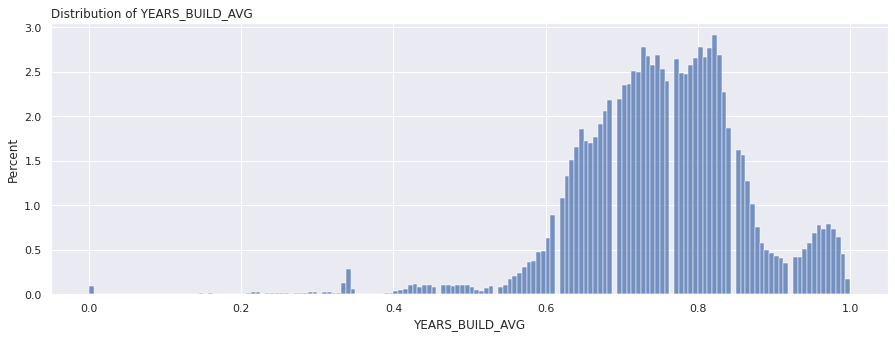

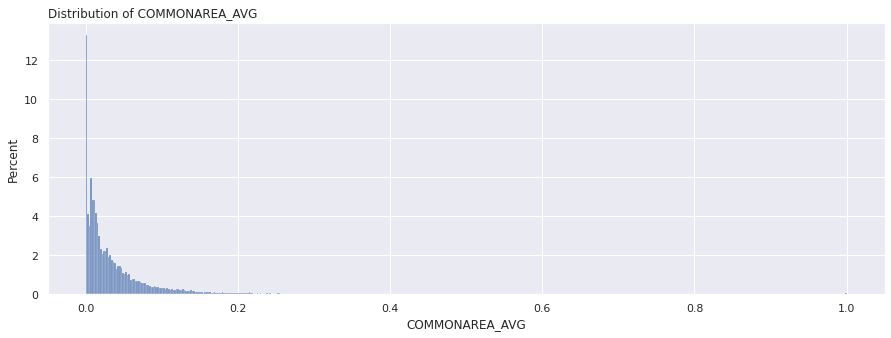

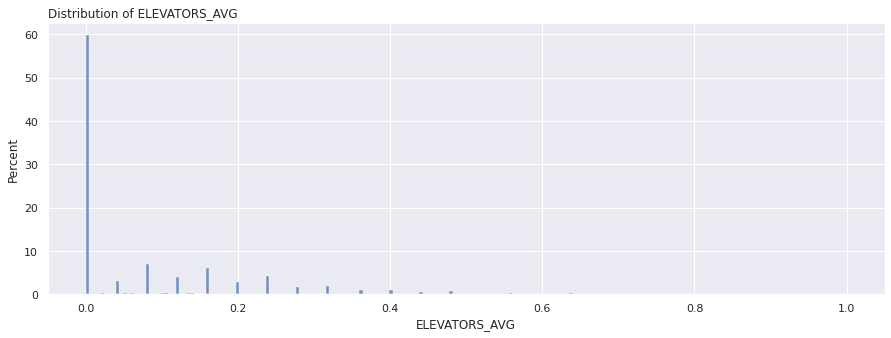

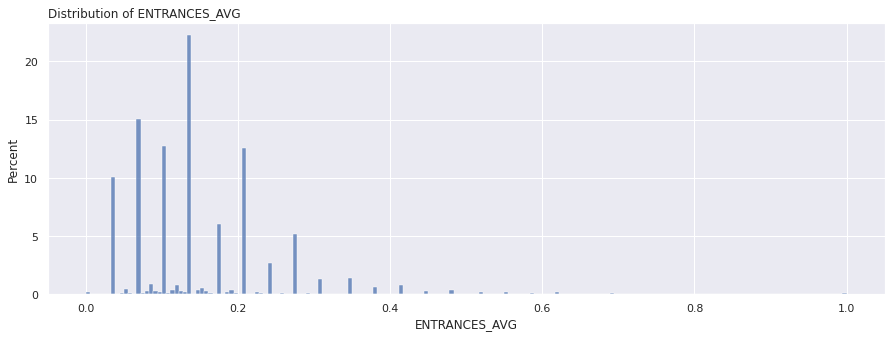

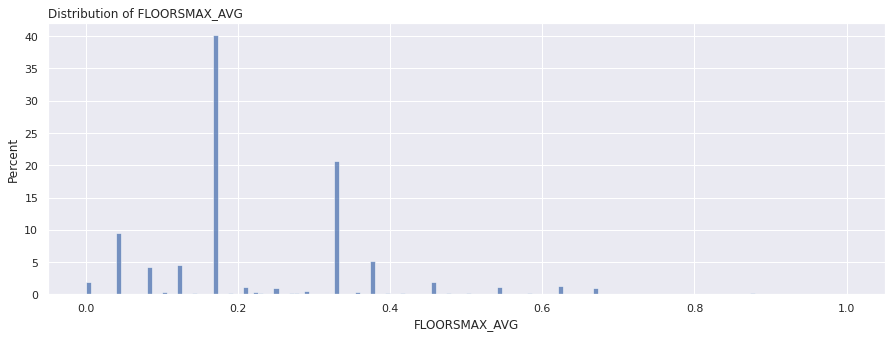

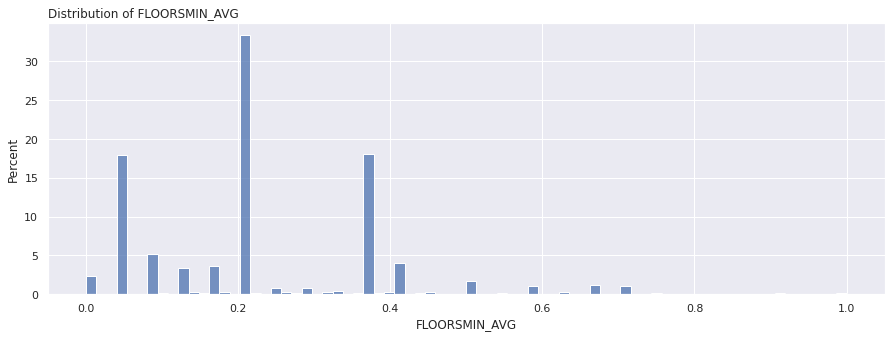

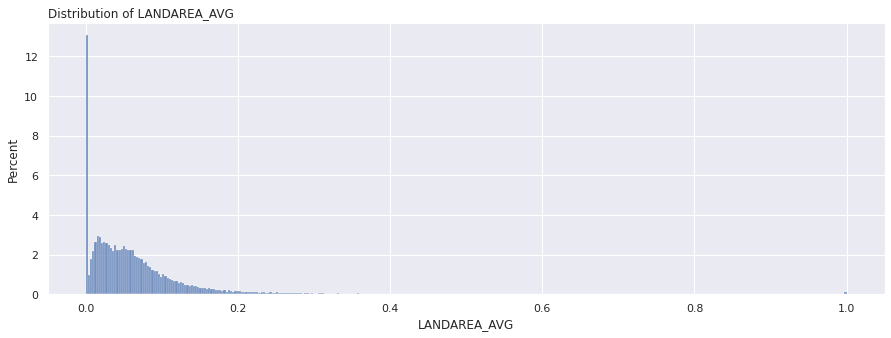

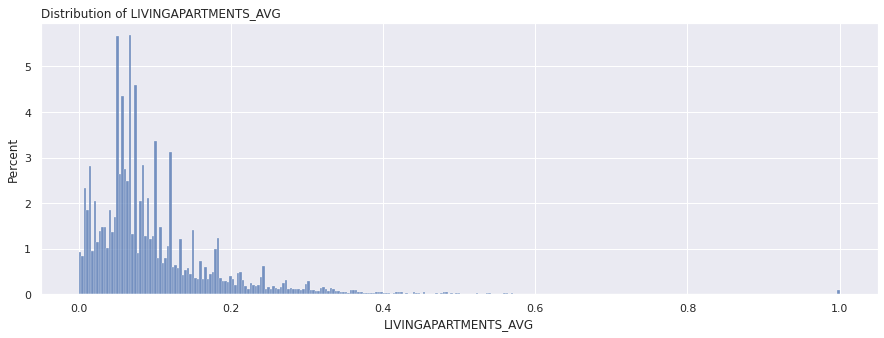

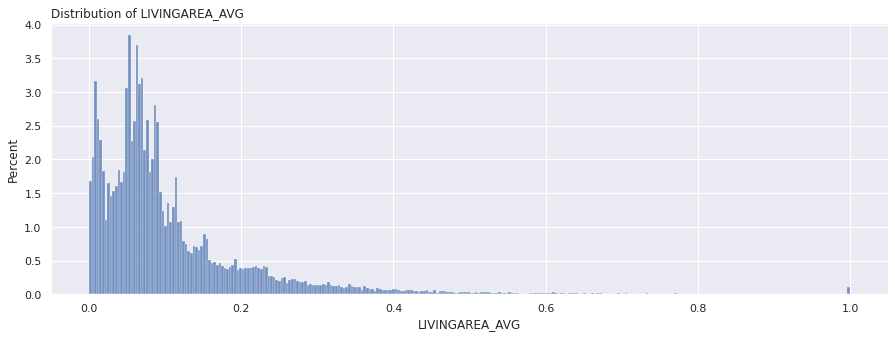

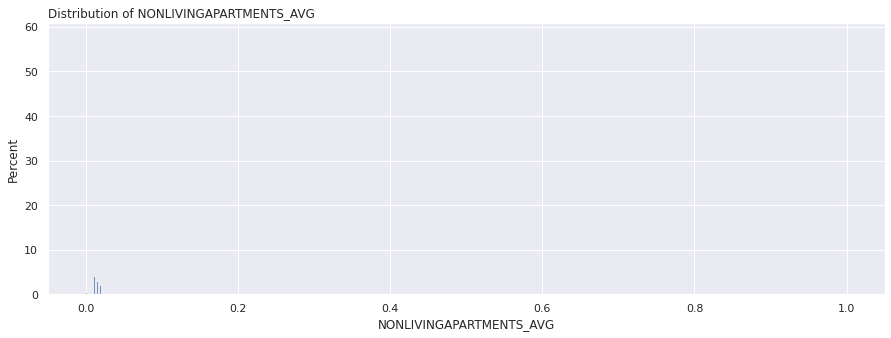

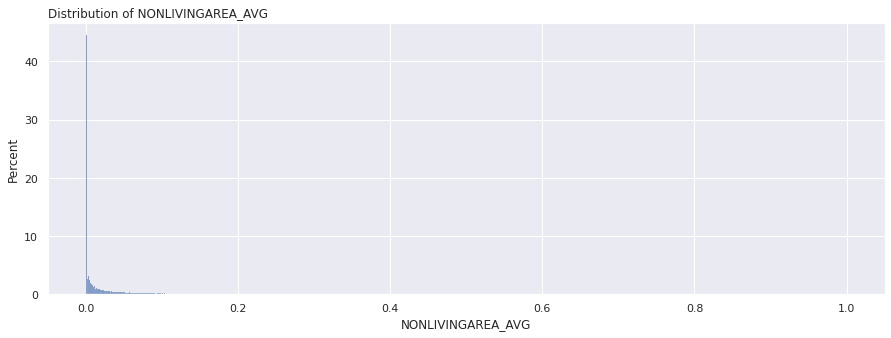

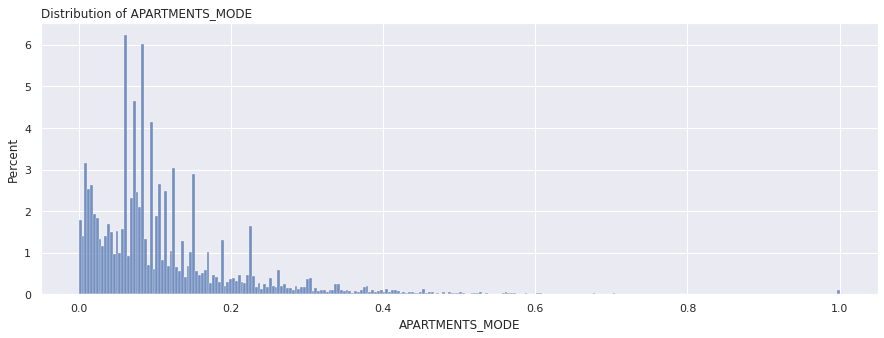

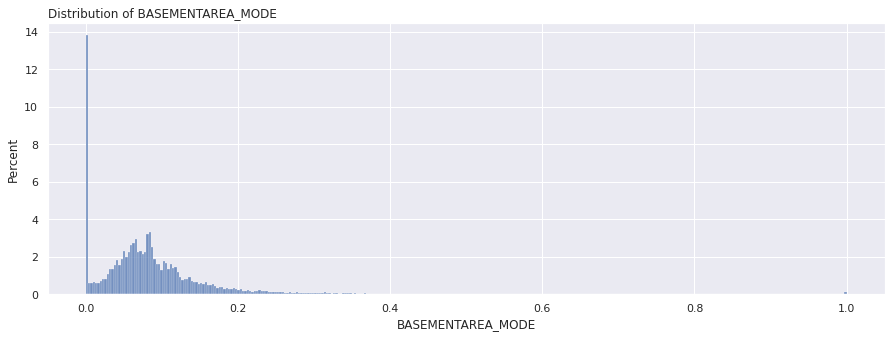

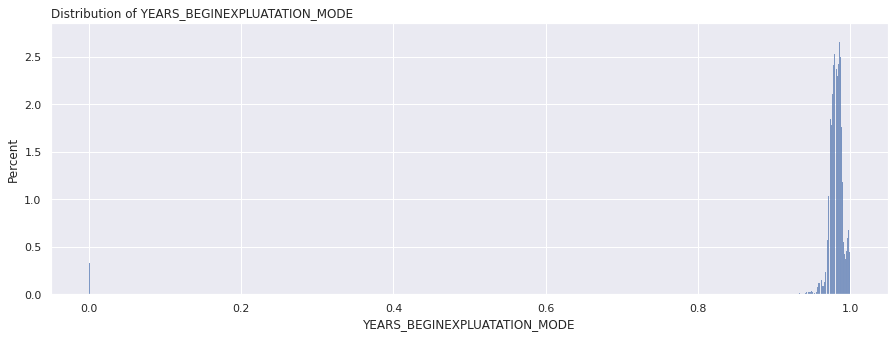

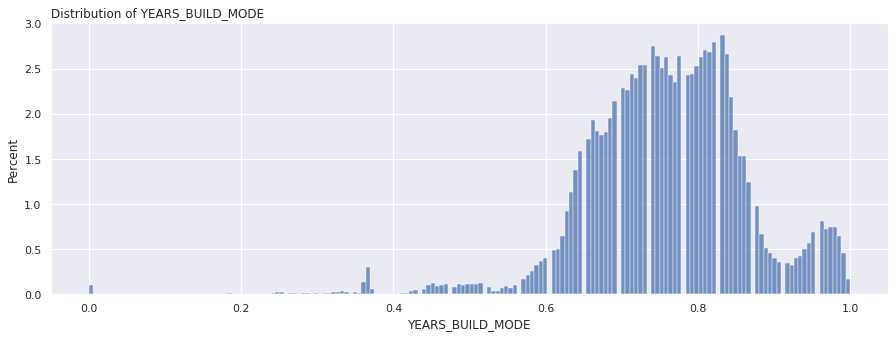

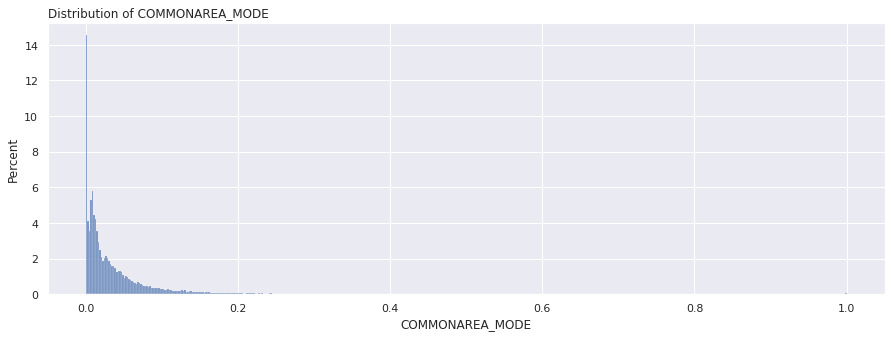

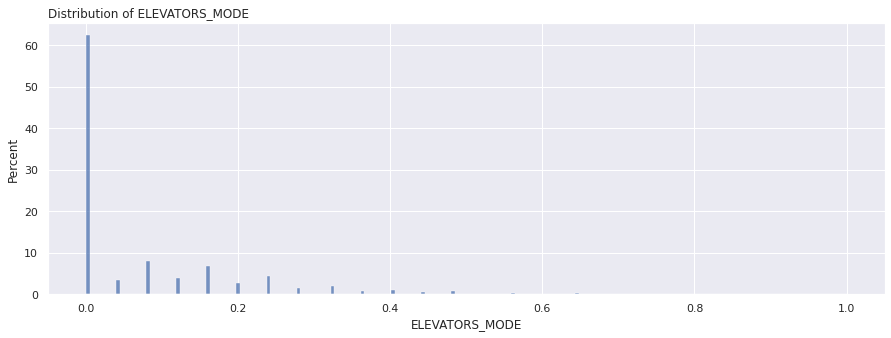

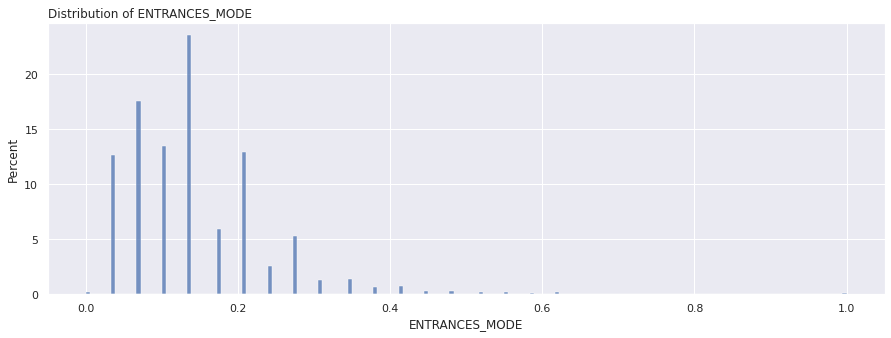

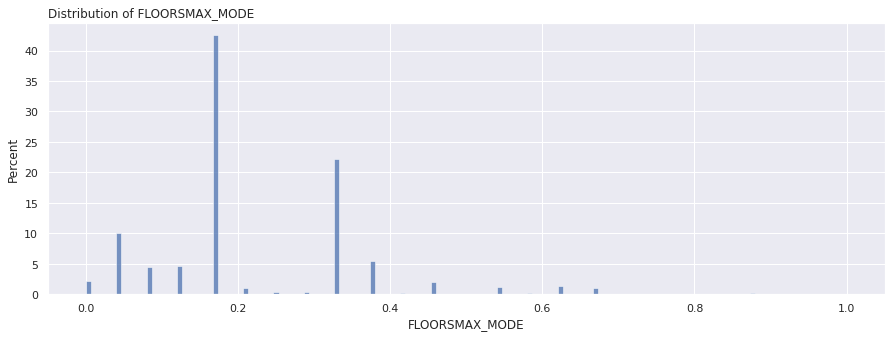

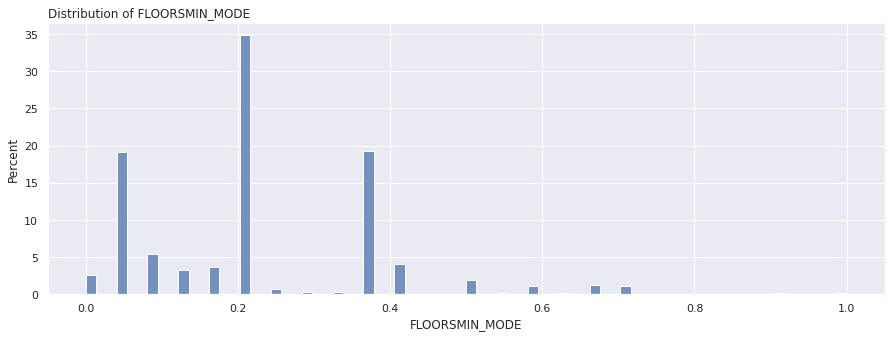

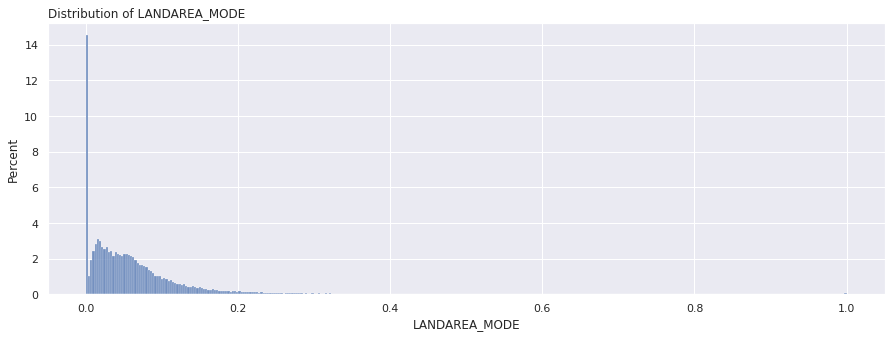

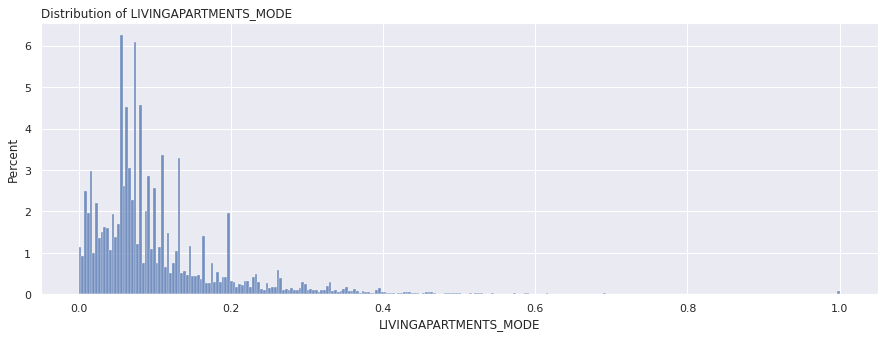

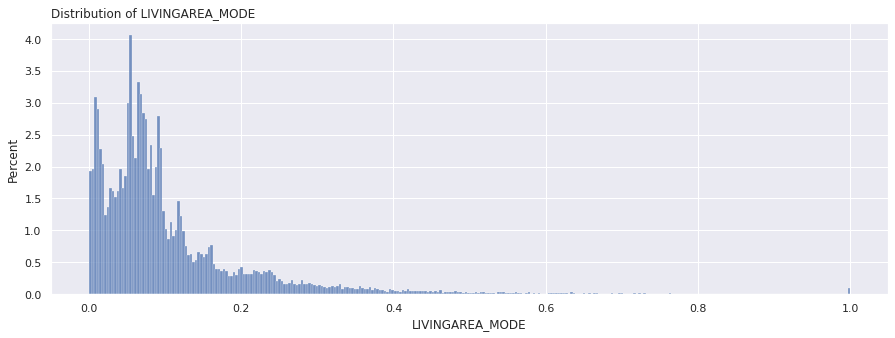

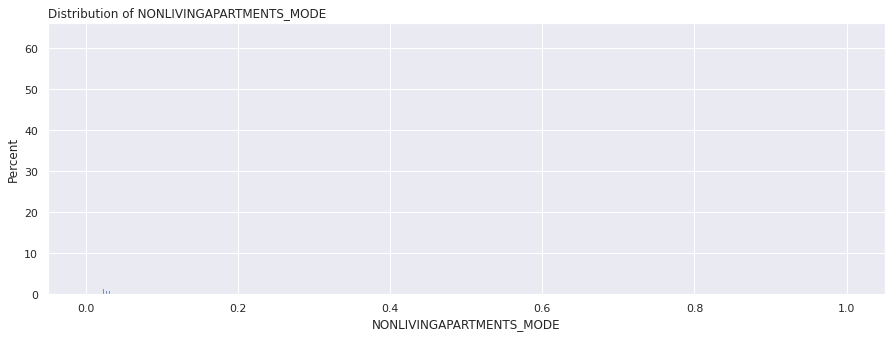

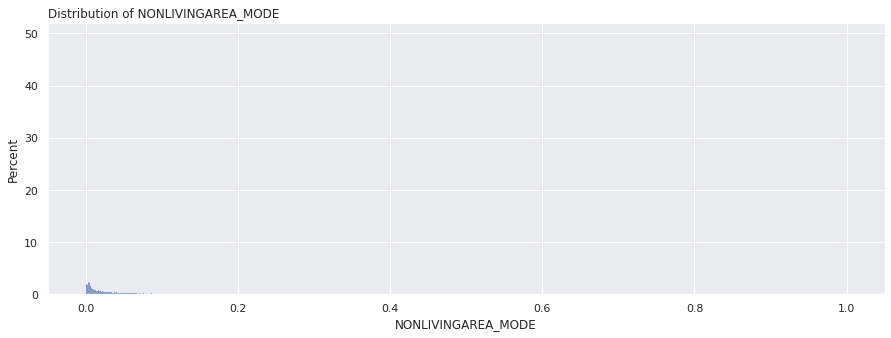

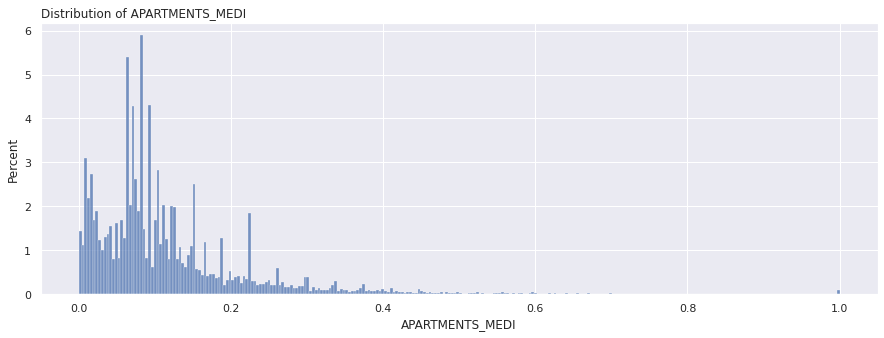

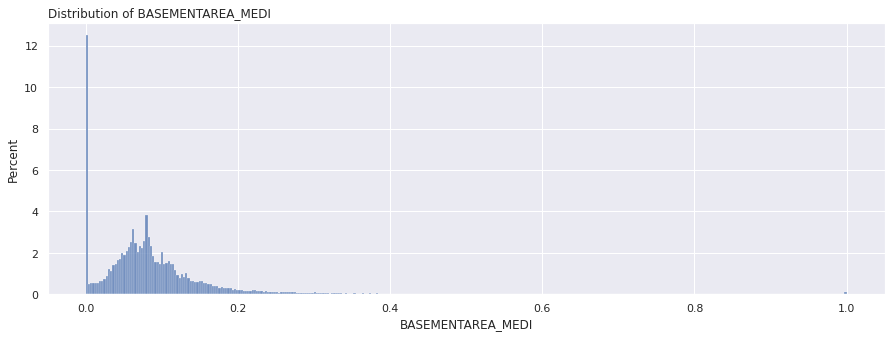

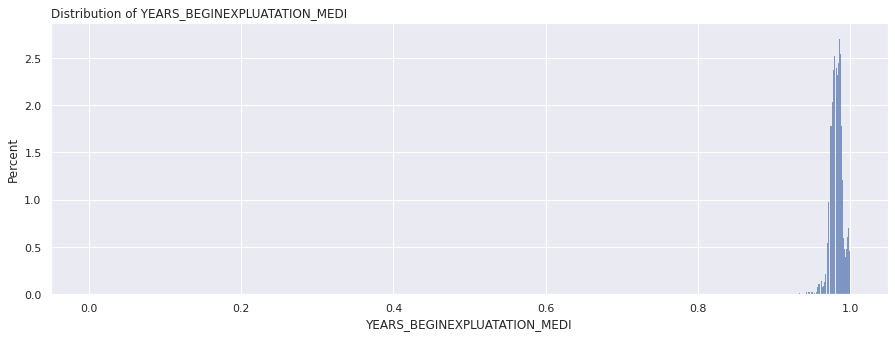

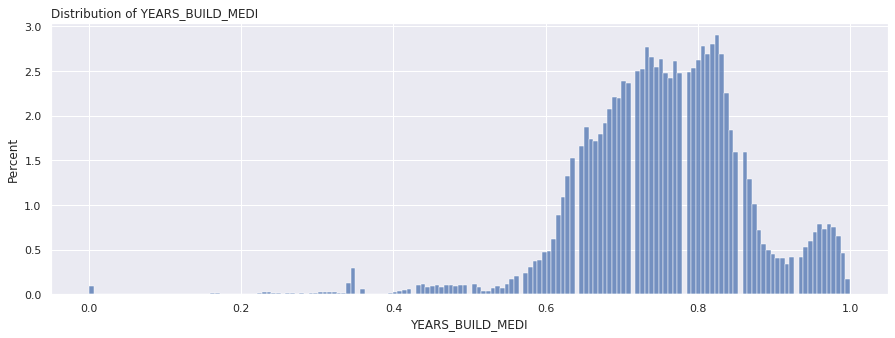

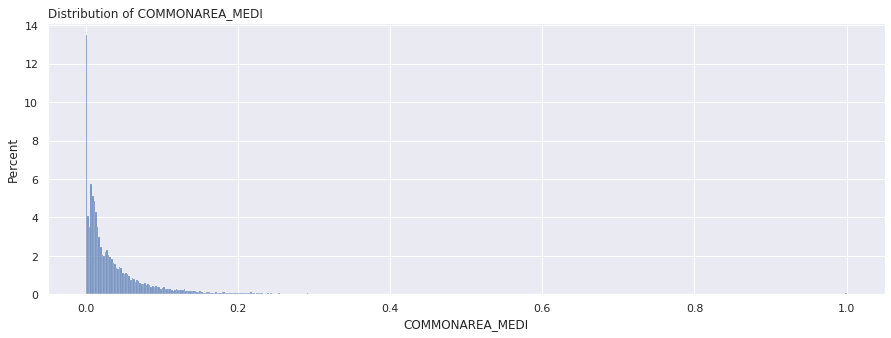

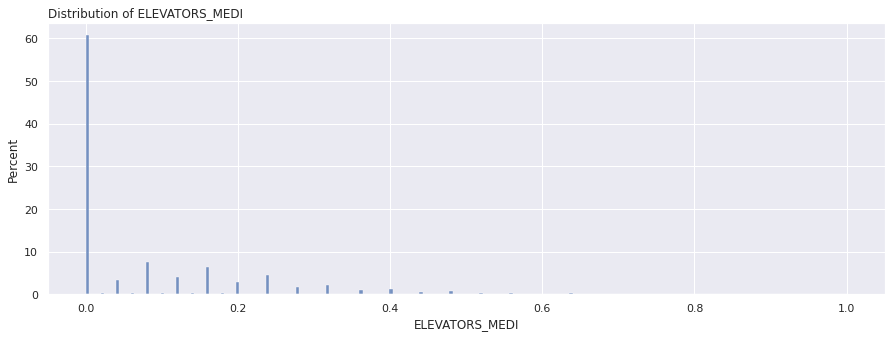

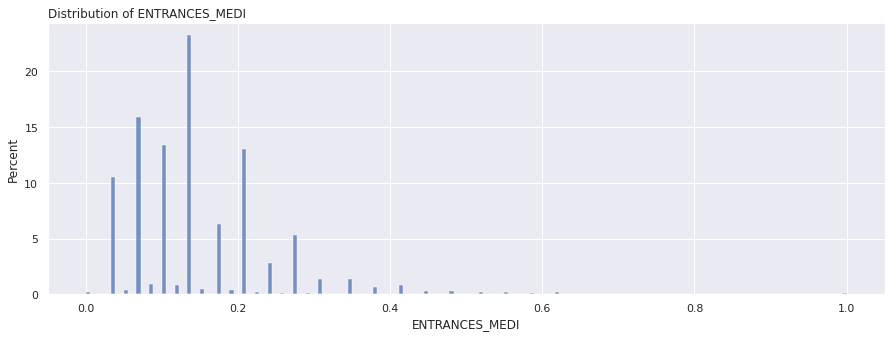

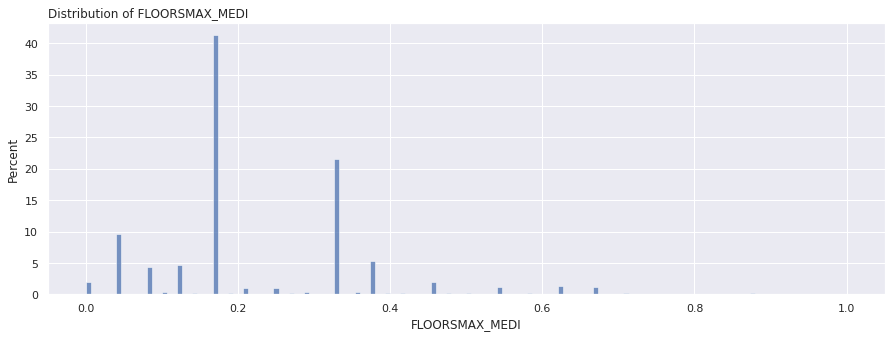

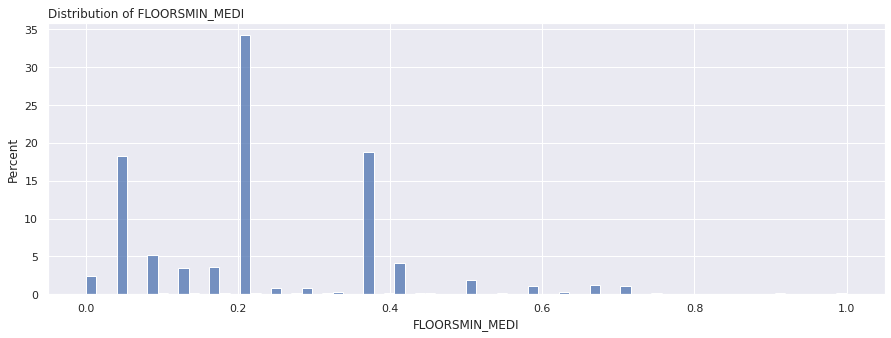

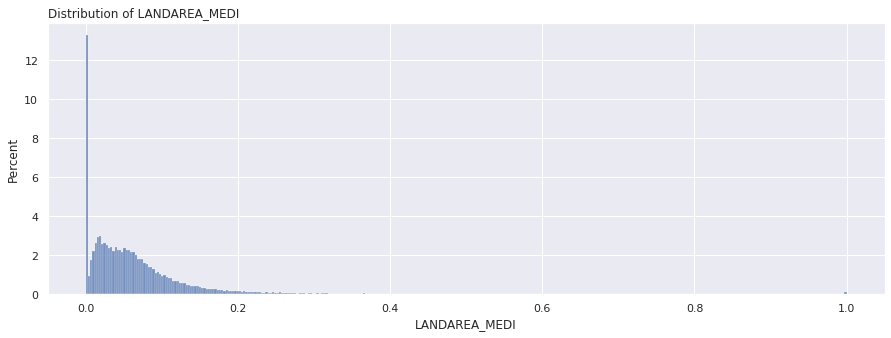

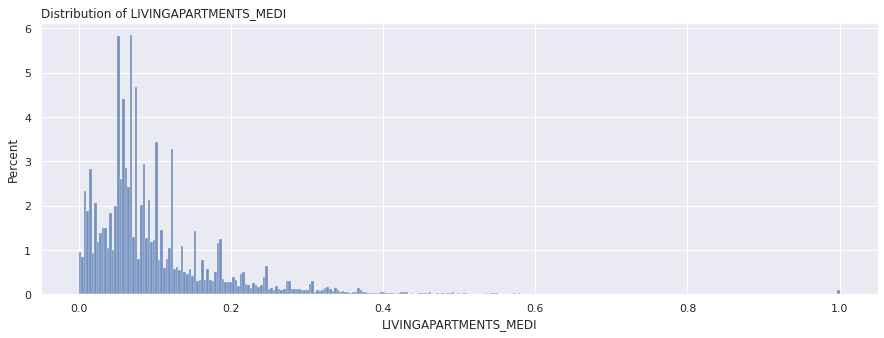

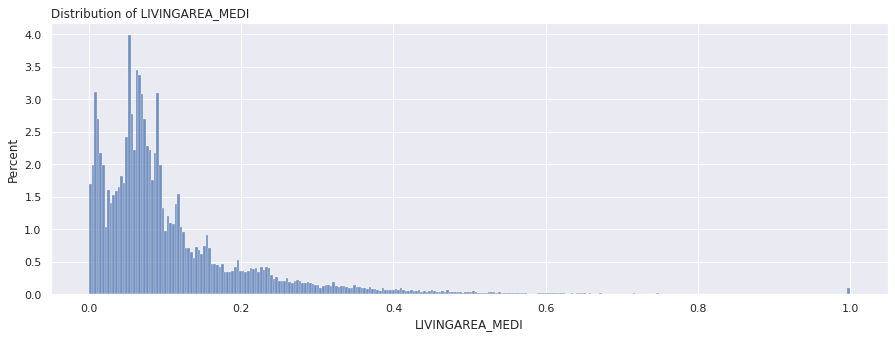

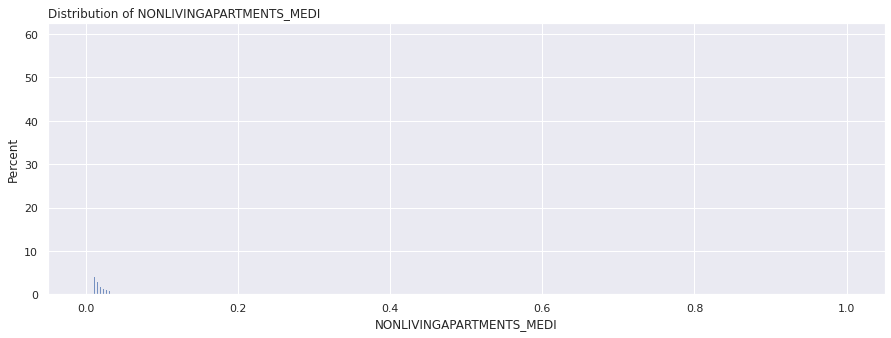

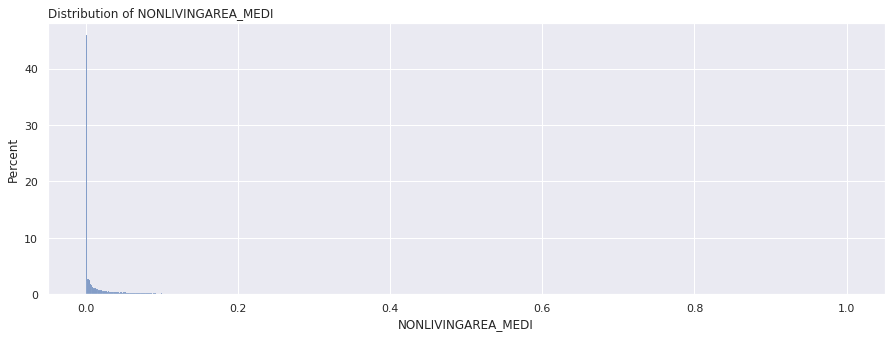

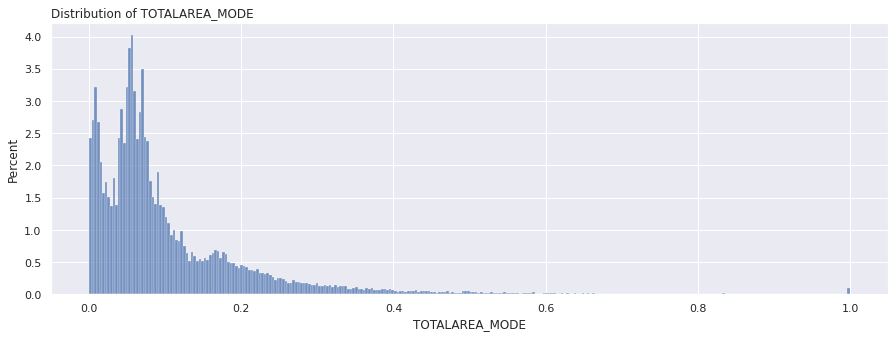

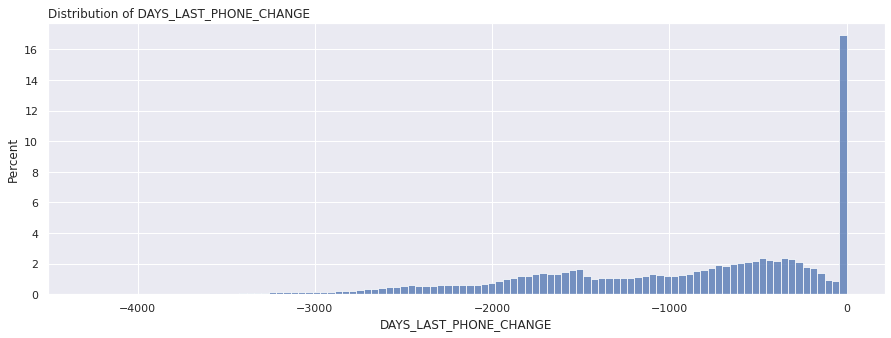

In [42]:
for feature in remaining_features:
    ax = sns.histplot(x=df[feature], stat='percent')
    ax.set_title(f'Distribution of {feature}', loc='left')
    plt.show()
    
    print('='*120)

___

## Distrubuição do target nas features

Agora vamos analisar a distribuição do target dentro das variáveis categóricas e/ou discretas.
Para isso vamos utilizar a função a seguir.

In [43]:
def plot_target_percent_by_cat_feature(feature):
    '''
    Recebe o nome de uma feature categórica ou discreta e plota a distribuição 
    porcentual do target em relação aos diferentes níveis da feature.
    '''
    count_by_type_and_target = df.groupby(by=[feature, 'TARGET']).count().iloc[:, 0]

    count_by_type = df.groupby(by=[feature]).count().iloc[:,0]

    percents = (count_by_type_and_target/count_by_type*100).reset_index(name='%')
    
    levels = len(df[feature].value_counts().index)
    
    if levels < 7:
        ax = sns.barplot(data=percents, x=feature, y='%', hue='TARGET')
        plt.yticks(range(0,100, 5))
    else:
        ax = sns.barplot(data=percents, y=feature, x='%', hue='TARGET', orient='h')
        plt.xticks(range(0,101, 5))
        
    ax.set_title(f'{feature} target distribution', loc='left')
    plt.show()

Vamos selecionar as variaveis "categóricas". Ou seja, aquelas guardadas como *object* ou que são numéricas mas discretas e com "poucos" níveis.

In [44]:
cat_features = object_features.to_list() + discret_features.to_list() + possibly_discret
cat_features

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'CNT_CHILDREN',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FL

Na concatenação acima não há elementos repetidos.

In [45]:
len(cat_features) == len(set(cat_features))

True

Vamos então ver a distrubuição do target em relação aos níveis dentro de cada feature "categórica".

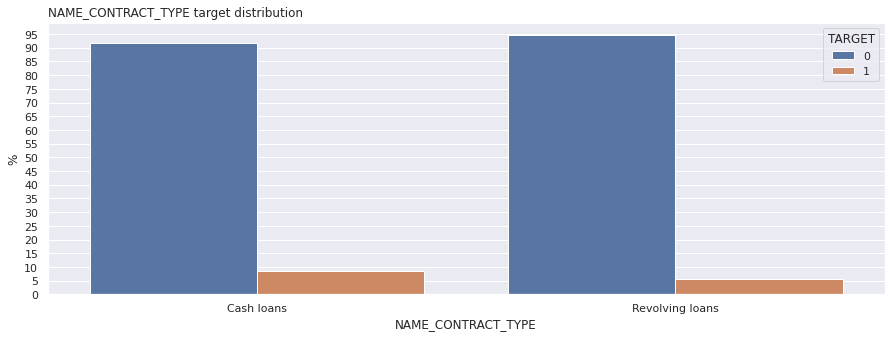

Cash loans         222622
Revolving loans     23386
Name: NAME_CONTRACT_TYPE, dtype: int64

In [46]:
plot_target_percent_by_cat_feature(cat_features[0])
    
display(df[cat_features[0]].value_counts())

Vemos que créditos rotativos apresentam uma chance menor, embora pouco menor, de ser negado.

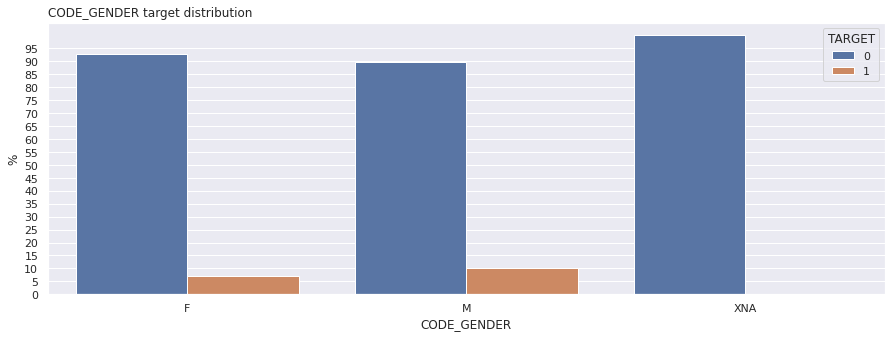

F      161867
M       84138
XNA         3
Name: CODE_GENDER, dtype: int64

In [47]:
pos = 1

plot_target_percent_by_cat_feature(cat_features[pos])
    
display(df[cat_features[pos]].value_counts())

Vemos que pessoas do sexo masculino apresentam uma chance ligeiramente maior de ter o pedido negado. Tanto em relação ao sexo feminino quanto em relação ao total.

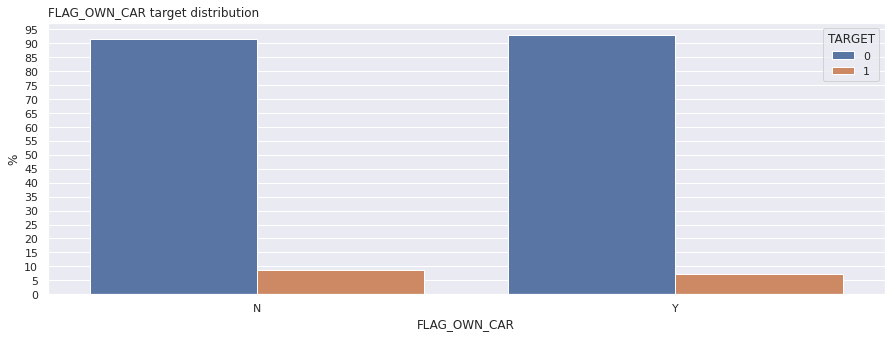

N    162355
Y     83653
Name: FLAG_OWN_CAR, dtype: int64

In [48]:
pos = 2

plot_target_percent_by_cat_feature(cat_features[pos])
    
display(df[cat_features[pos]].value_counts())

Novamente, pessoas que possuem carro tem uma chance menor de ter o pedido de crédito negado. Mas novamente não chega a ser uma diferença significativa.

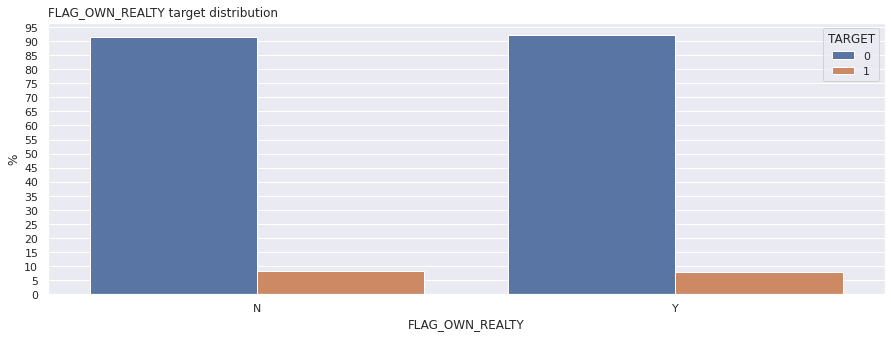

Y    170535
N     75473
Name: FLAG_OWN_REALTY, dtype: int64

In [49]:
pos = 3

plot_target_percent_by_cat_feature(cat_features[pos])
    
display(df[cat_features[pos]].value_counts())

Possuir um imóvel parece não influenciar diretamente o target.

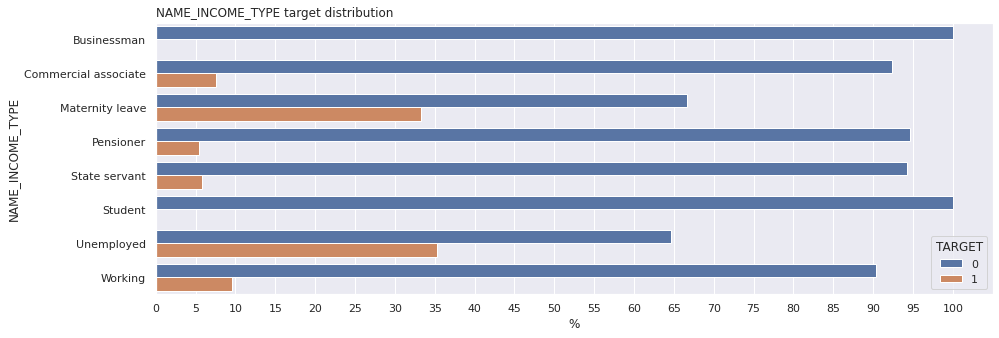

Working                 126919
Commercial associate     57321
Pensioner                44389
State servant            17337
Unemployed                  17
Student                     12
Businessman                 10
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64

In [50]:
pos = 5

plot_target_percent_by_cat_feature(cat_features[pos])
    
display(df[cat_features[pos]].value_counts())

Em relação ao tipo de ocupação, vemos algumas diferenças significativas.

Pessoas empresárias ou estudantes não tiveram pedidos negados, embora sejam amostras bastante pequenas.

Mulheres em licença maternidade e pessoas desempregadas, tem chance consideravelmente maior de ter o pedido negado, ressaltando-se novamente que trata-se de amostras bem pequenas.

Por fim, pessoas pensionistas ou servidores públicos tem chance menor de terem o pedido recusados se comparados com o total de pedidos.

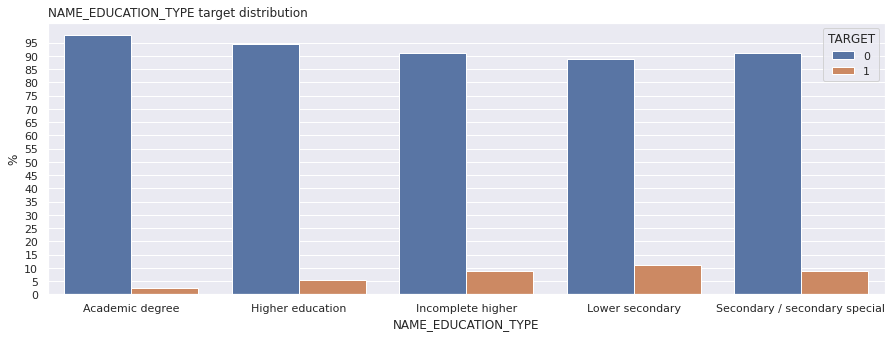

Secondary / secondary special    174831
Higher education                  59832
Incomplete higher                  8208
Lower secondary                    3004
Academic degree                     133
Name: NAME_EDUCATION_TYPE, dtype: int64

In [51]:
pos = 6

plot_target_percent_by_cat_feature(cat_features[pos])
    
display(df[cat_features[pos]].value_counts())

Em geral pessoas graduadas tem o pedido aceito em mais vezes.

Já pessoas sem ensiino médio tem maiores dificuldades em conseguir crédito.

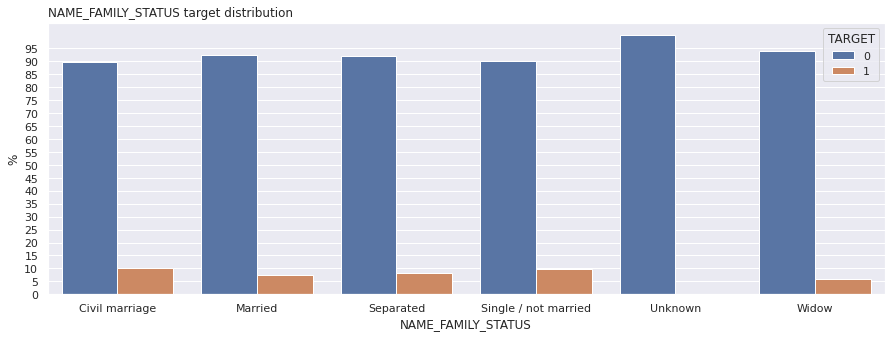

Married                 157074
Single / not married     36395
Civil marriage           23798
Separated                15868
Widow                    12872
Unknown                      1
Name: NAME_FAMILY_STATUS, dtype: int64

In [52]:
pos = 7

plot_target_percent_by_cat_feature(cat_features[pos])
    
display(df[cat_features[pos]].value_counts())

Em relação ao estado civil, destaque apenas para as pessoas viúvas, que tem uma facilidade um pouco maior em obter o crédito.

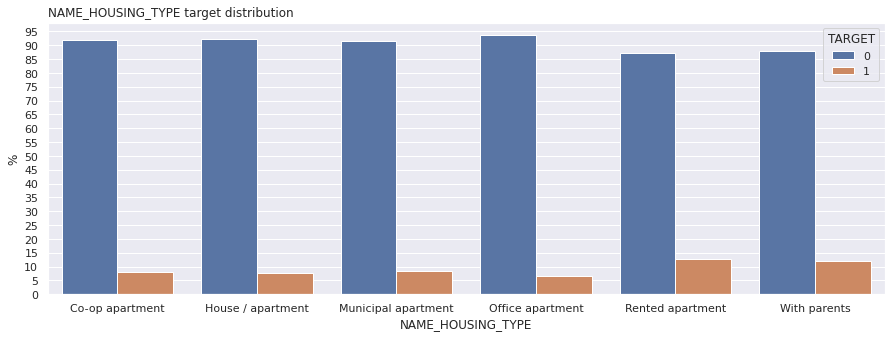

House / apartment      218258
With parents            11917
Municipal apartment      8922
Rented apartment         3889
Office apartment         2109
Co-op apartment           913
Name: NAME_HOUSING_TYPE, dtype: int64

In [53]:
pos = 8

plot_target_percent_by_cat_feature(cat_features[pos])
    
display(df[cat_features[pos]].value_counts())

Em relação ao tipo de moradia pessoas que moram de aluguel ou com os pais tem mais dificuldade em conseguir crédito.

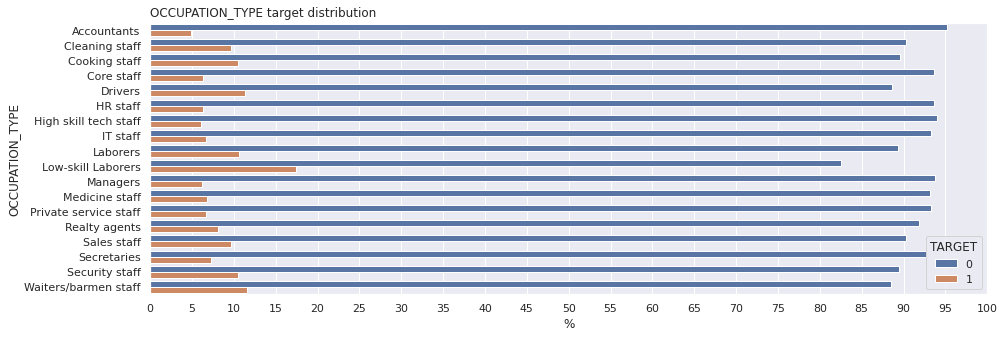

Laborers                 44126
Sales staff              25721
Core staff               21868
Managers                 17001
Drivers                  14973
High skill tech staff     9105
Accountants               7901
Medicine staff            6823
Security staff            5371
Cooking staff             4723
Cleaning staff            3708
Private service staff     2122
Low-skill Laborers        1698
Waiters/barmen staff      1084
Secretaries               1052
Realty agents              618
HR staff                   442
IT staff                   435
Name: OCCUPATION_TYPE, dtype: int64

In [54]:
pos = 9

plot_target_percent_by_cat_feature(cat_features[pos])
    
display(df[cat_features[pos]].value_counts())

**A ideia era fazer uma análise mais detalhada de cada feature categórica/discreta. Mas faltou tempo.**

Vamos apenas visualizar os gráficos.

NAME_CONTRACT_TYPE


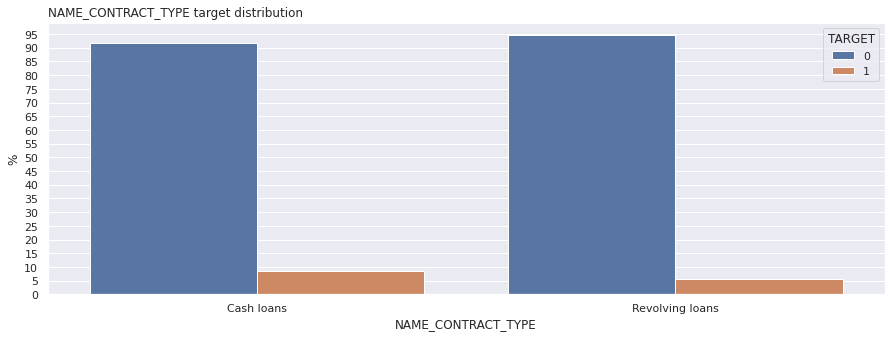

Cash loans         222622
Revolving loans     23386
Name: NAME_CONTRACT_TYPE, dtype: int64

CODE_GENDER


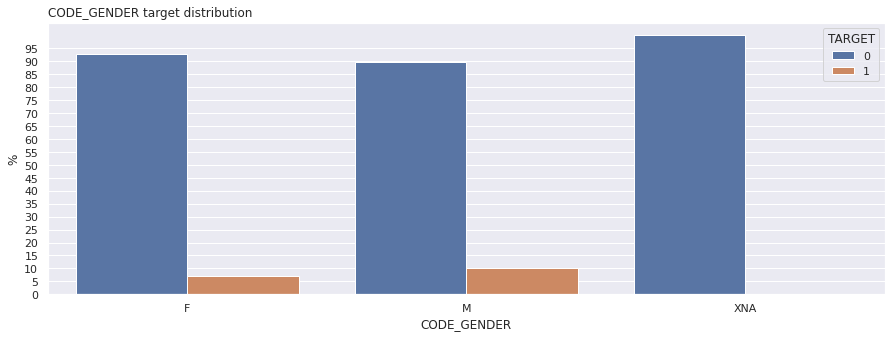

F      161867
M       84138
XNA         3
Name: CODE_GENDER, dtype: int64

FLAG_OWN_CAR


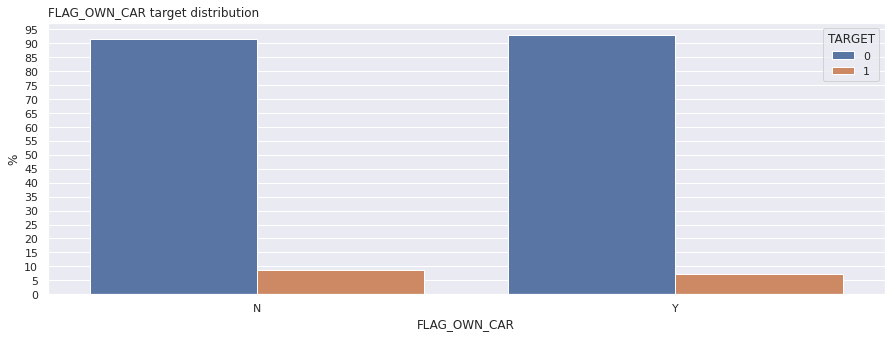

N    162355
Y     83653
Name: FLAG_OWN_CAR, dtype: int64

FLAG_OWN_REALTY


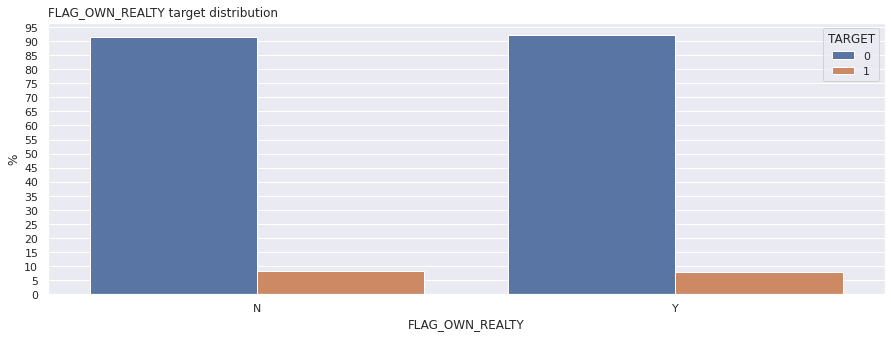

Y    170535
N     75473
Name: FLAG_OWN_REALTY, dtype: int64

NAME_TYPE_SUITE


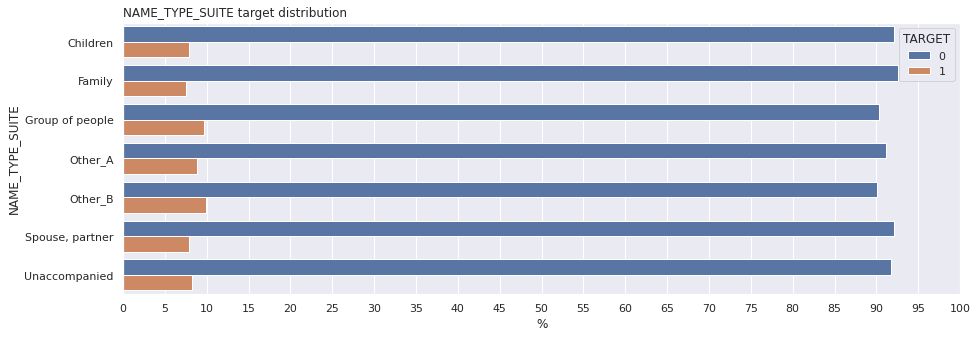

Unaccompanied      198726
Family              32145
Spouse, partner      9121
Children             2614
Other_B              1448
Other_A               689
Group of people       217
Name: NAME_TYPE_SUITE, dtype: int64

NAME_INCOME_TYPE


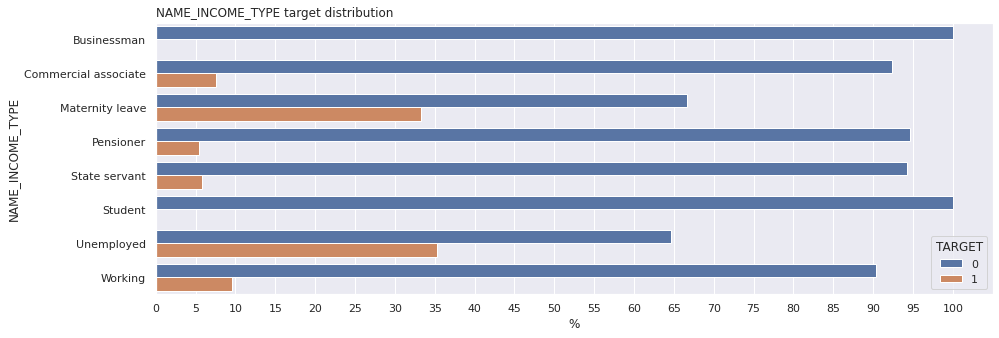

Working                 126919
Commercial associate     57321
Pensioner                44389
State servant            17337
Unemployed                  17
Student                     12
Businessman                 10
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64

NAME_EDUCATION_TYPE


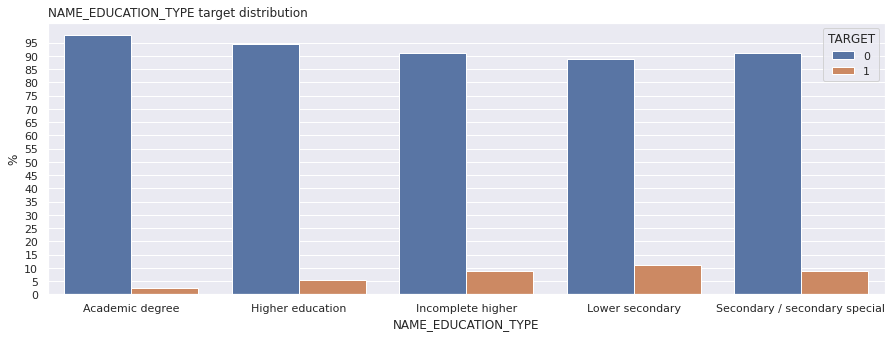

Secondary / secondary special    174831
Higher education                  59832
Incomplete higher                  8208
Lower secondary                    3004
Academic degree                     133
Name: NAME_EDUCATION_TYPE, dtype: int64

NAME_FAMILY_STATUS


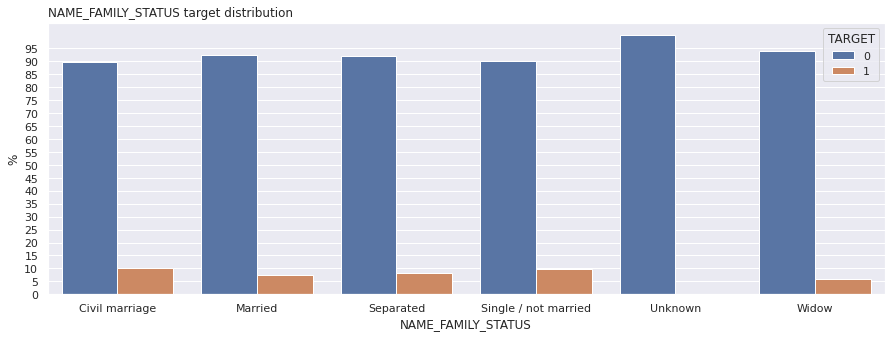

Married                 157074
Single / not married     36395
Civil marriage           23798
Separated                15868
Widow                    12872
Unknown                      1
Name: NAME_FAMILY_STATUS, dtype: int64

NAME_HOUSING_TYPE


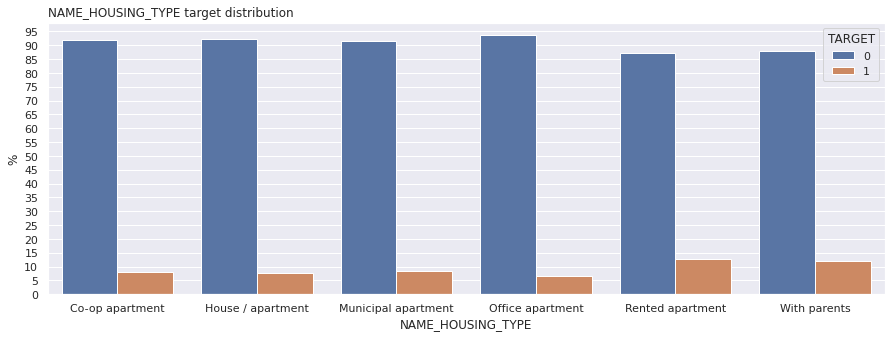

House / apartment      218258
With parents            11917
Municipal apartment      8922
Rented apartment         3889
Office apartment         2109
Co-op apartment           913
Name: NAME_HOUSING_TYPE, dtype: int64

OCCUPATION_TYPE


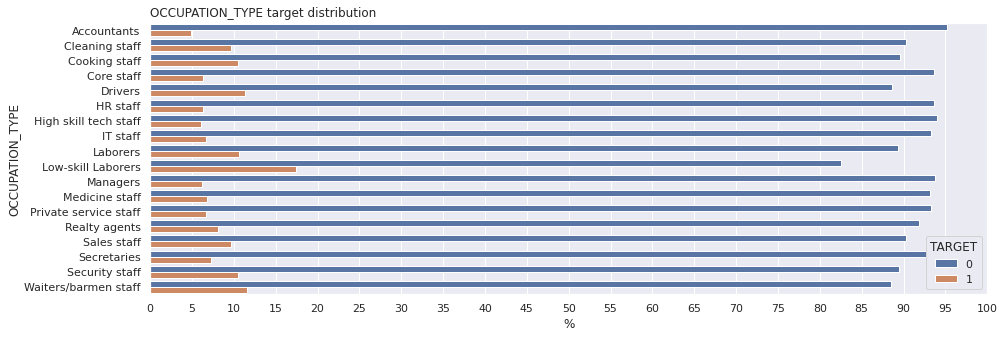

Laborers                 44126
Sales staff              25721
Core staff               21868
Managers                 17001
Drivers                  14973
High skill tech staff     9105
Accountants               7901
Medicine staff            6823
Security staff            5371
Cooking staff             4723
Cleaning staff            3708
Private service staff     2122
Low-skill Laborers        1698
Waiters/barmen staff      1084
Secretaries               1052
Realty agents              618
HR staff                   442
IT staff                   435
Name: OCCUPATION_TYPE, dtype: int64

WEEKDAY_APPR_PROCESS_START


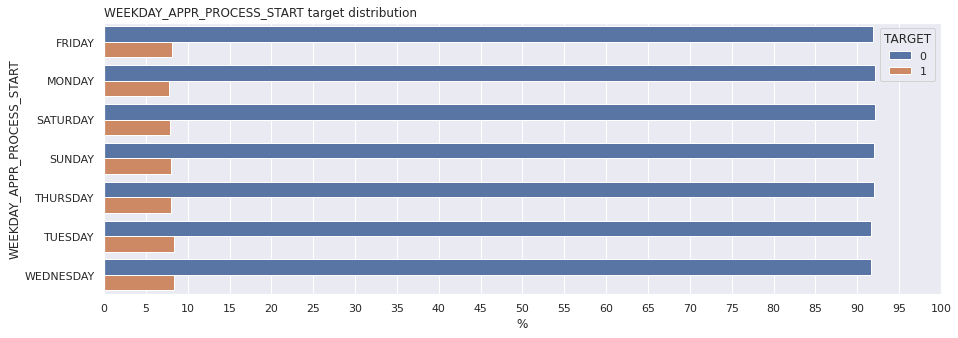

TUESDAY      43046
WEDNESDAY    41418
MONDAY       40709
THURSDAY     40616
FRIDAY       40202
SATURDAY     27083
SUNDAY       12934
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

ORGANIZATION_TYPE


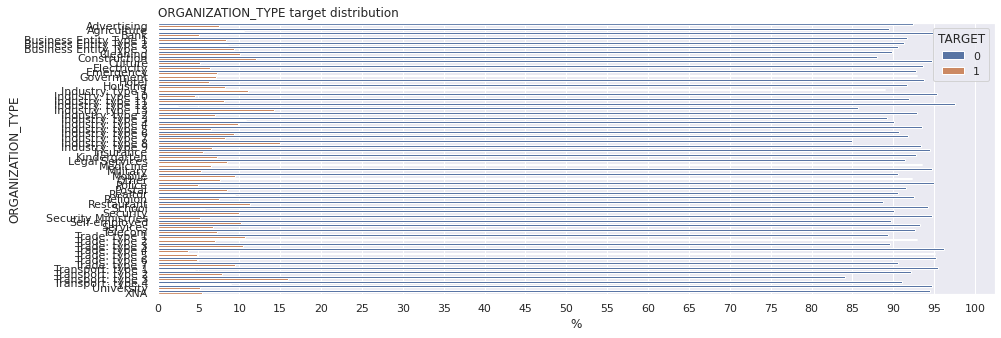

Business Entity Type 3    54495
XNA                       44399
Self-employed             30722
Other                     13350
Medicine                   8982
Business Entity Type 2     8433
Government                 8330
School                     7078
Trade: type 7              6258
Kindergarten               5448
Construction               5389
Business Entity Type 1     4859
Transport: type 4          4277
Trade: type 3              2767
Industry: type 9           2695
Industry: type 3           2627
Security                   2594
Housing                    2368
Industry: type 11          2138
Military                   2114
Bank                       1980
Agriculture                1960
Police                     1866
Transport: type 2          1745
Postal                     1719
Security Ministries        1565
Trade: type 2              1506
Restaurant                 1478
Services                   1264
University                 1057
Industry: type 7           1037
Transpor

FONDKAPREMONT_MODE


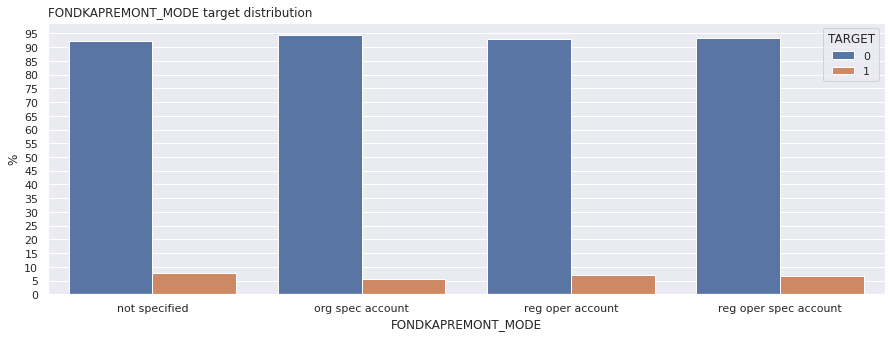

reg oper account         58983
reg oper spec account     9645
not specified             4536
org spec account          4452
Name: FONDKAPREMONT_MODE, dtype: int64

HOUSETYPE_MODE


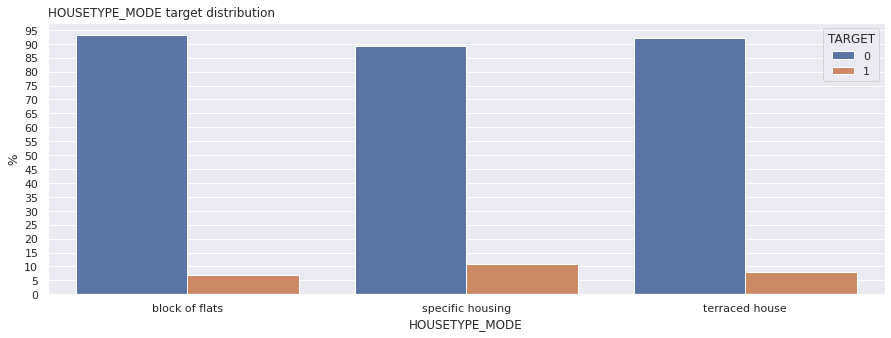

block of flats      120287
specific housing      1212
terraced house         969
Name: HOUSETYPE_MODE, dtype: int64

WALLSMATERIAL_MODE


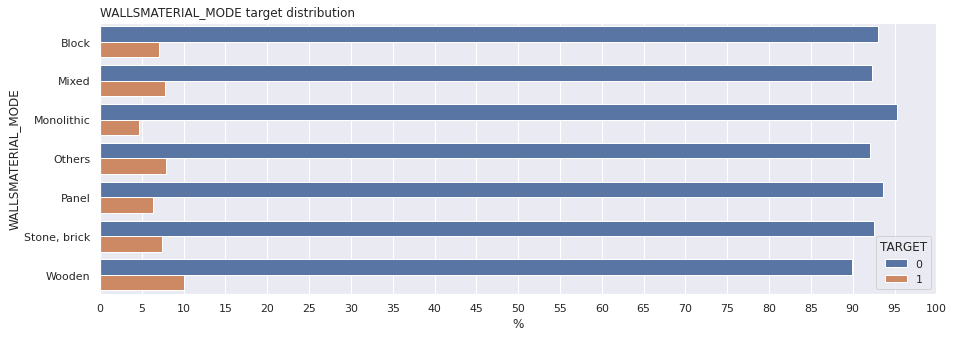

Panel           52819
Stone, brick    51816
Block            7382
Wooden           4263
Mixed            1852
Monolithic       1427
Others           1285
Name: WALLSMATERIAL_MODE, dtype: int64

EMERGENCYSTATE_MODE


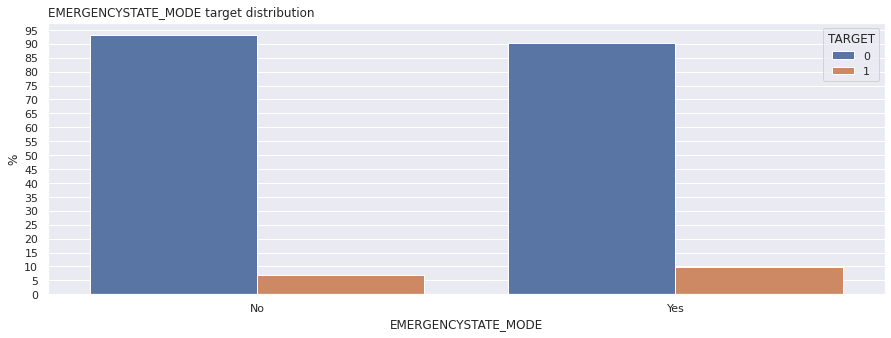

No     127375
Yes      1872
Name: EMERGENCYSTATE_MODE, dtype: int64

CNT_CHILDREN


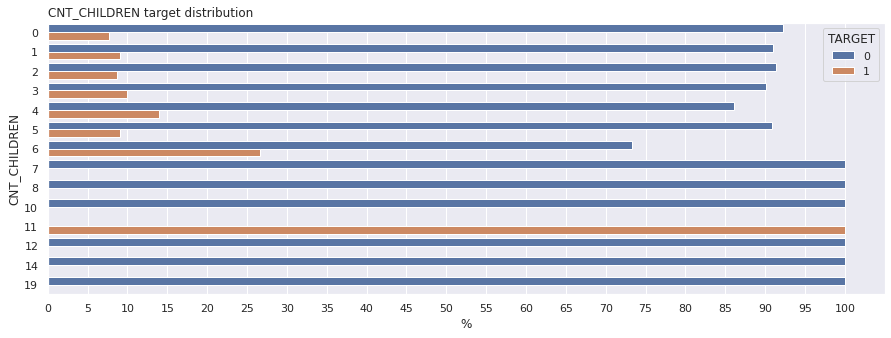

0     172485
1      48793
2      21376
3       2929
4        330
5         66
6         15
7          4
8          2
12         2
10         2
19         2
11         1
14         1
Name: CNT_CHILDREN, dtype: int64

FLAG_MOBIL


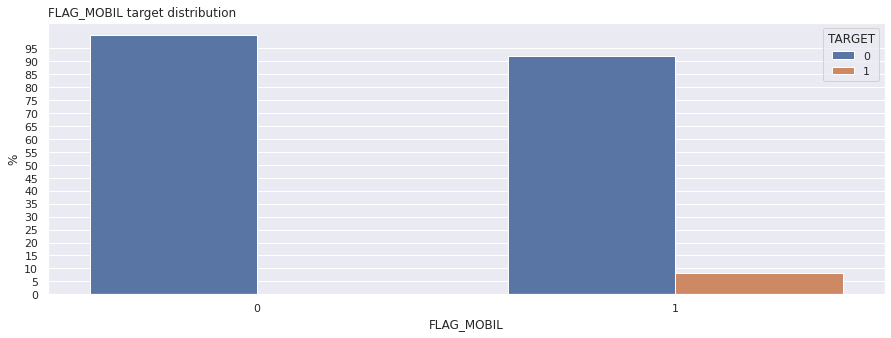

1    246007
0         1
Name: FLAG_MOBIL, dtype: int64

FLAG_EMP_PHONE


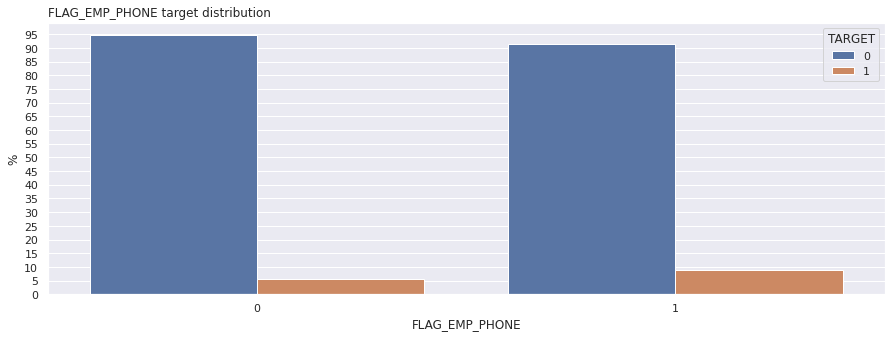

1    201599
0     44409
Name: FLAG_EMP_PHONE, dtype: int64

FLAG_WORK_PHONE


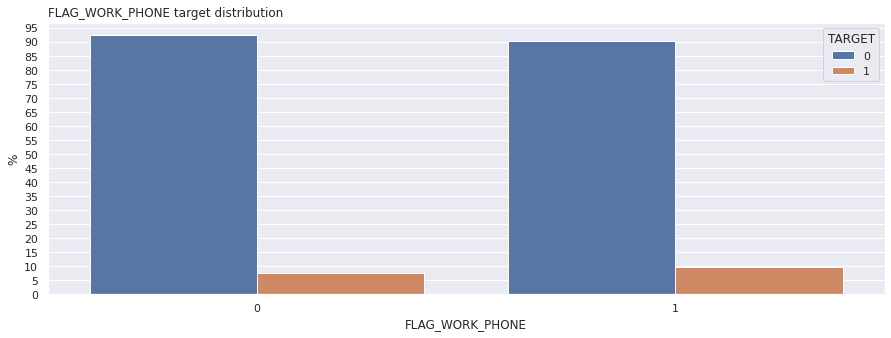

0    197029
1     48979
Name: FLAG_WORK_PHONE, dtype: int64

FLAG_CONT_MOBILE


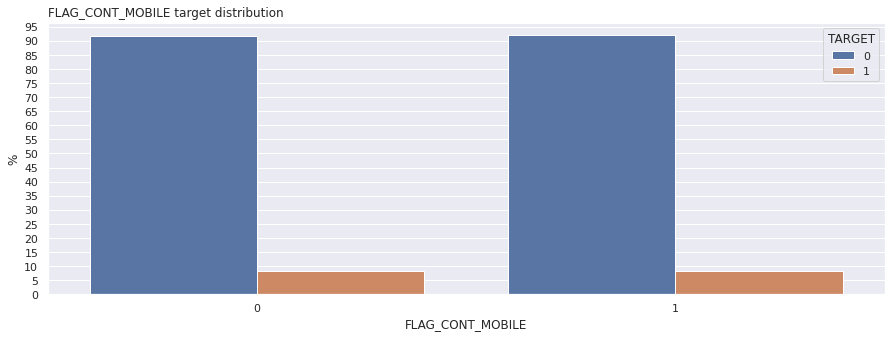

1    245550
0       458
Name: FLAG_CONT_MOBILE, dtype: int64

FLAG_PHONE


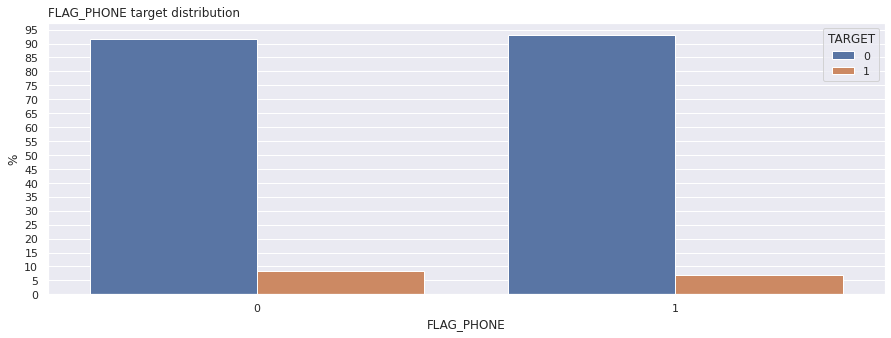

0    176874
1     69134
Name: FLAG_PHONE, dtype: int64

FLAG_EMAIL


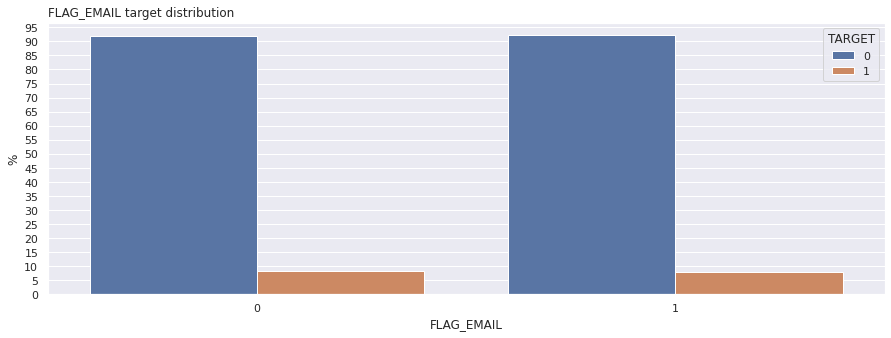

0    232054
1     13954
Name: FLAG_EMAIL, dtype: int64

REGION_RATING_CLIENT


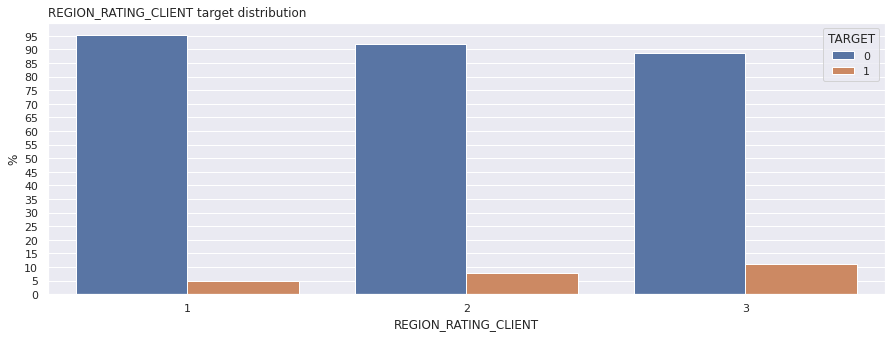

2    181589
3     38617
1     25802
Name: REGION_RATING_CLIENT, dtype: int64

REGION_RATING_CLIENT_W_CITY


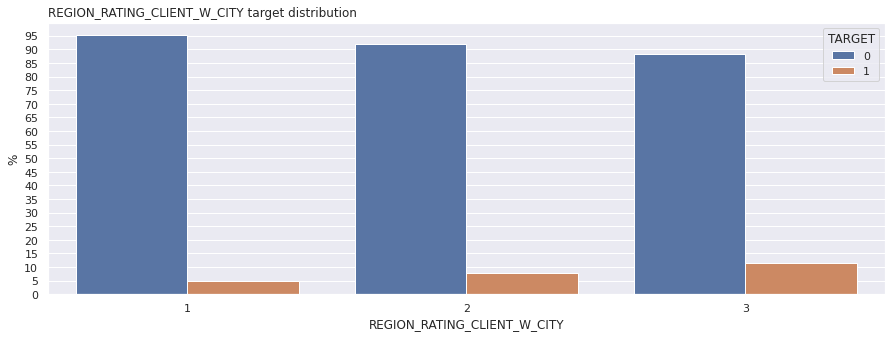

2    183597
3     35044
1     27367
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

HOUR_APPR_PROCESS_START


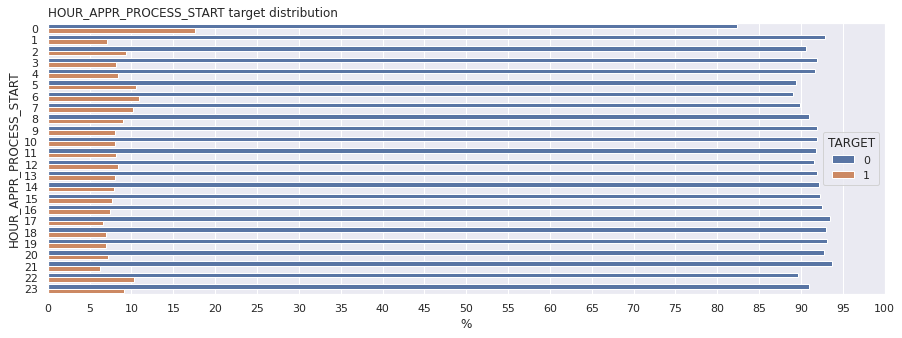

10    30147
11    29817
12    27416
13    24704
14    22213
9     21928
15    19862
16    16337
8     12087
17    11917
7      7280
18     7209
6      4655
19     3085
5      2915
4      1687
3       975
20      956
21      320
2       235
22      126
1        70
0        34
23       33
Name: HOUR_APPR_PROCESS_START, dtype: int64

REG_REGION_NOT_LIVE_REGION


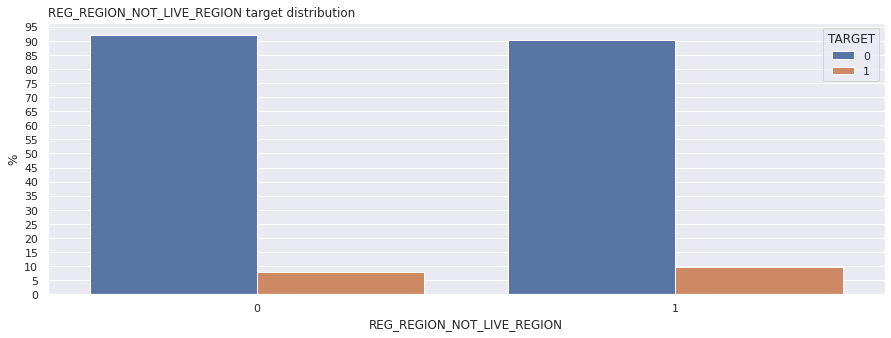

0    242272
1      3736
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

REG_REGION_NOT_WORK_REGION


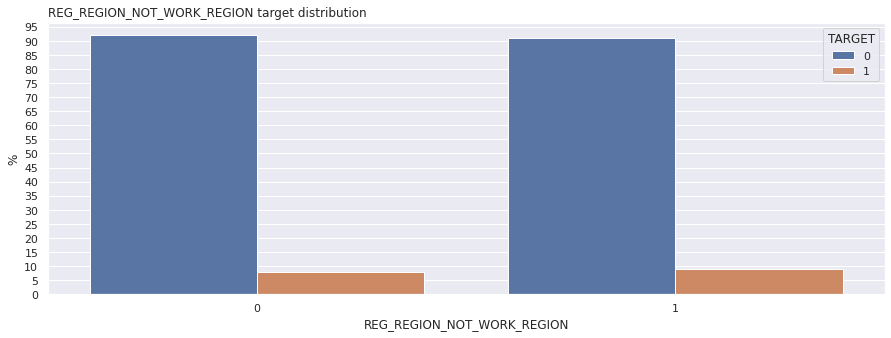

0    233556
1     12452
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

LIVE_REGION_NOT_WORK_REGION


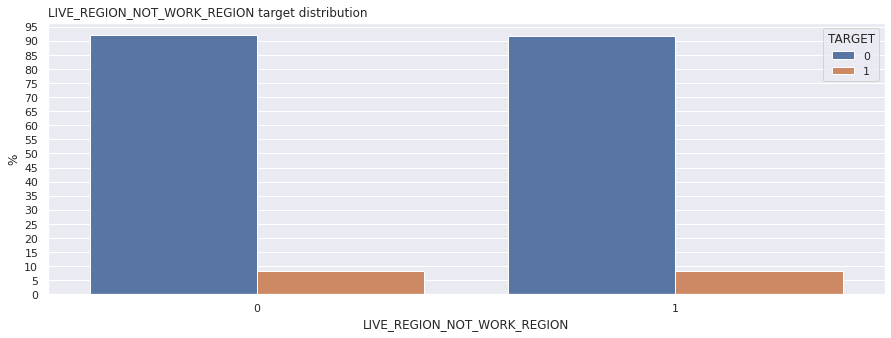

0    236045
1      9963
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64

REG_CITY_NOT_LIVE_CITY


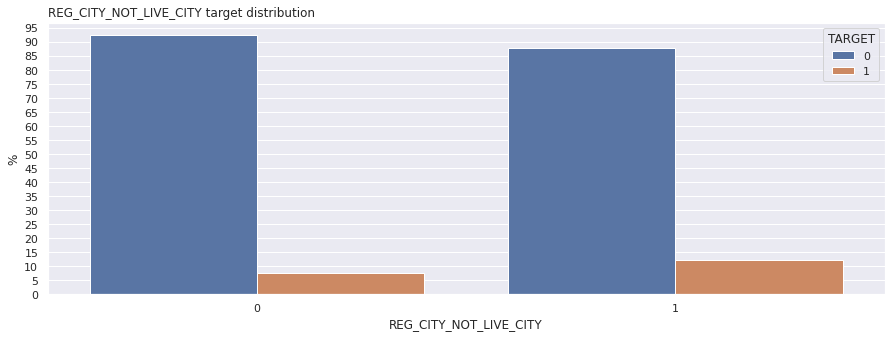

0    226757
1     19251
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

REG_CITY_NOT_WORK_CITY


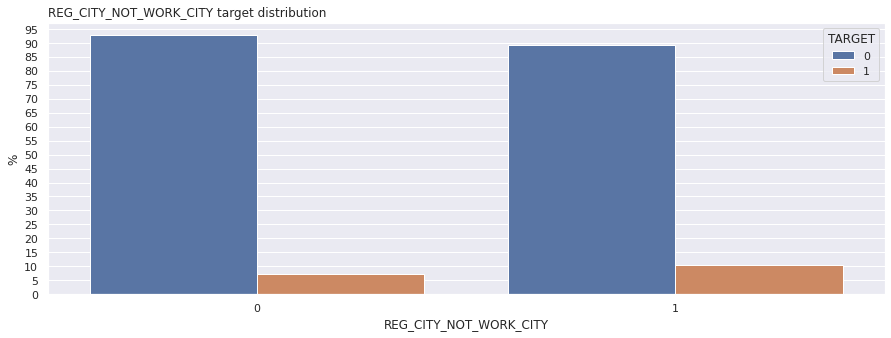

0    189293
1     56715
Name: REG_CITY_NOT_WORK_CITY, dtype: int64

LIVE_CITY_NOT_WORK_CITY


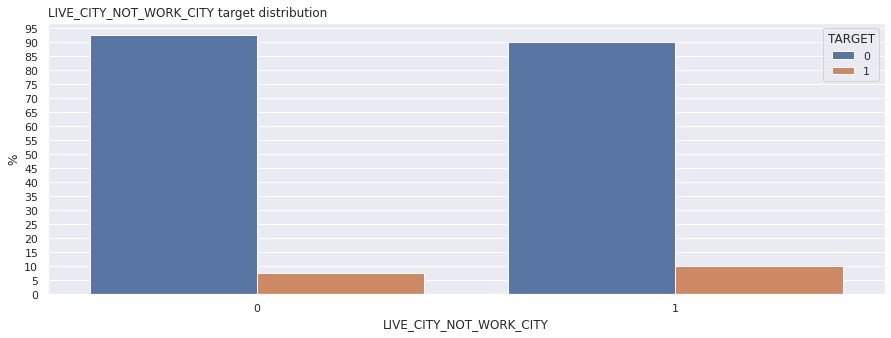

0    201827
1     44181
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64

FLAG_DOCUMENT_2


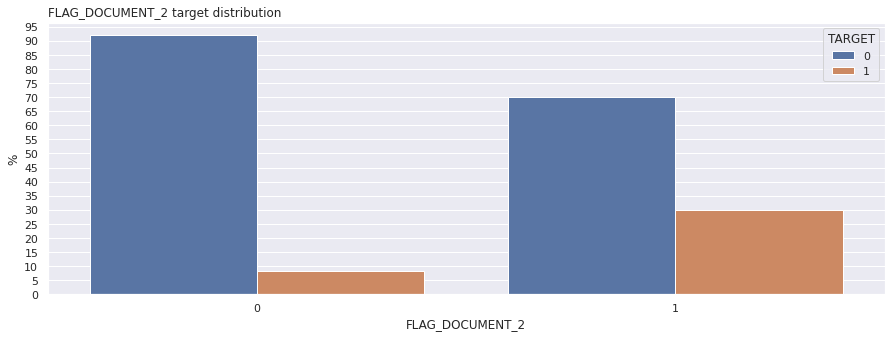

0    245998
1        10
Name: FLAG_DOCUMENT_2, dtype: int64

FLAG_DOCUMENT_3


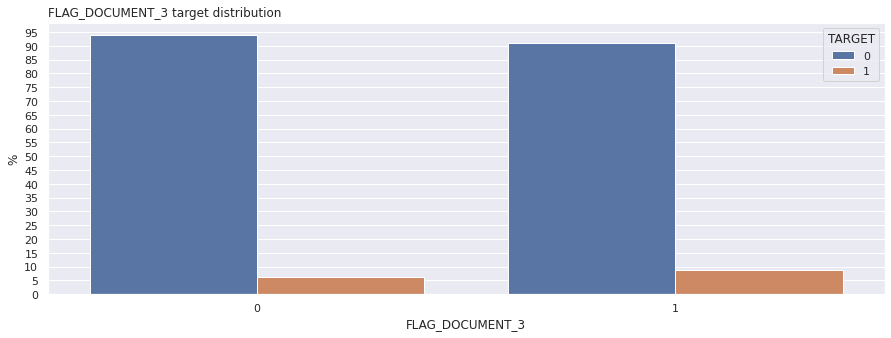

1    174860
0     71148
Name: FLAG_DOCUMENT_3, dtype: int64

FLAG_DOCUMENT_4


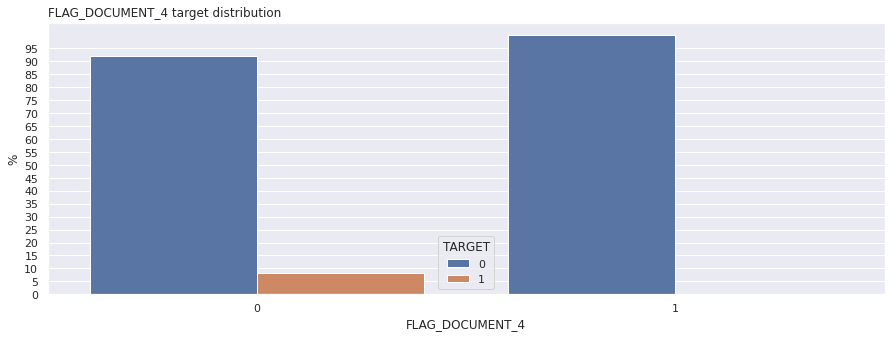

0    245987
1        21
Name: FLAG_DOCUMENT_4, dtype: int64

FLAG_DOCUMENT_5


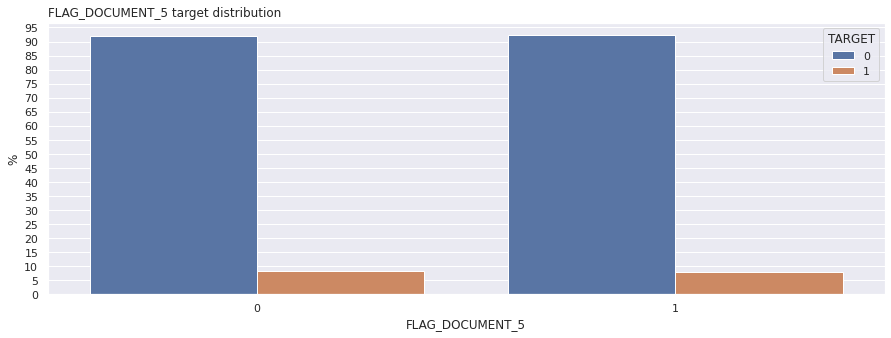

0    242293
1      3715
Name: FLAG_DOCUMENT_5, dtype: int64

FLAG_DOCUMENT_6


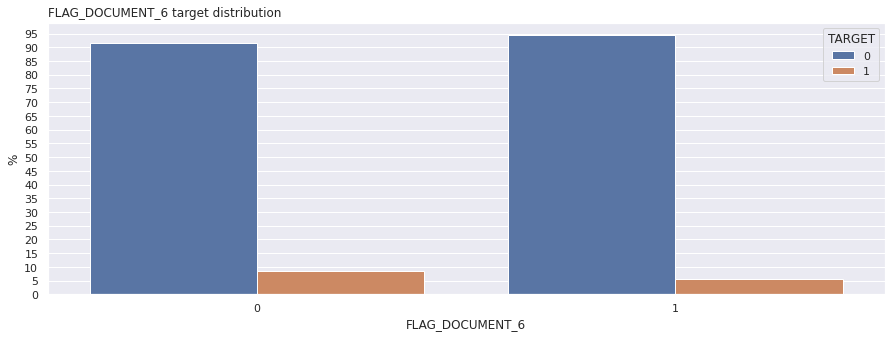

0    224376
1     21632
Name: FLAG_DOCUMENT_6, dtype: int64

FLAG_DOCUMENT_7


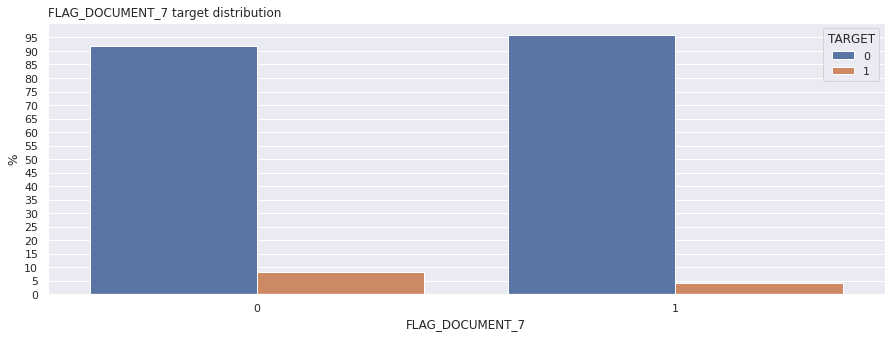

0    245961
1        47
Name: FLAG_DOCUMENT_7, dtype: int64

FLAG_DOCUMENT_8


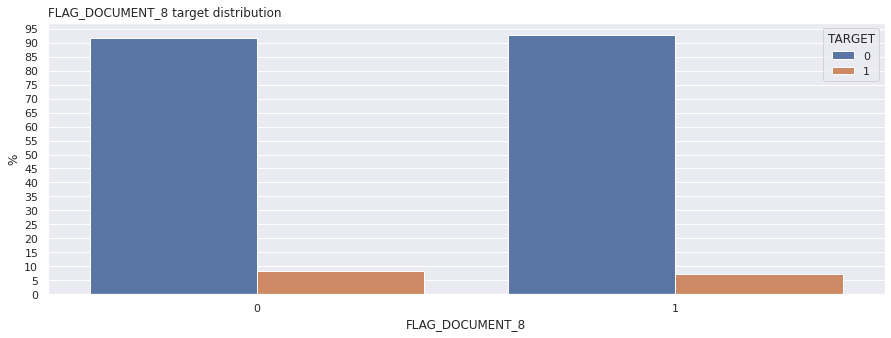

0    226056
1     19952
Name: FLAG_DOCUMENT_8, dtype: int64

FLAG_DOCUMENT_9


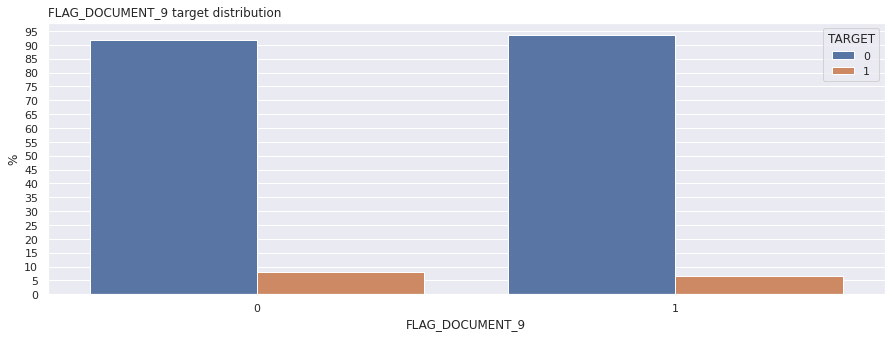

0    245068
1       940
Name: FLAG_DOCUMENT_9, dtype: int64

FLAG_DOCUMENT_10


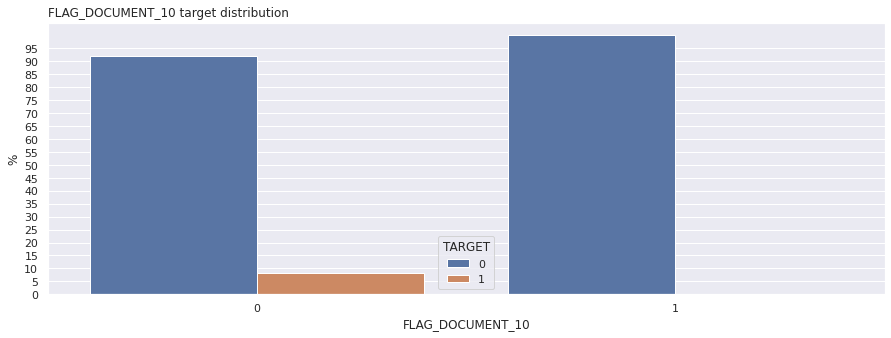

0    246005
1         3
Name: FLAG_DOCUMENT_10, dtype: int64

FLAG_DOCUMENT_11


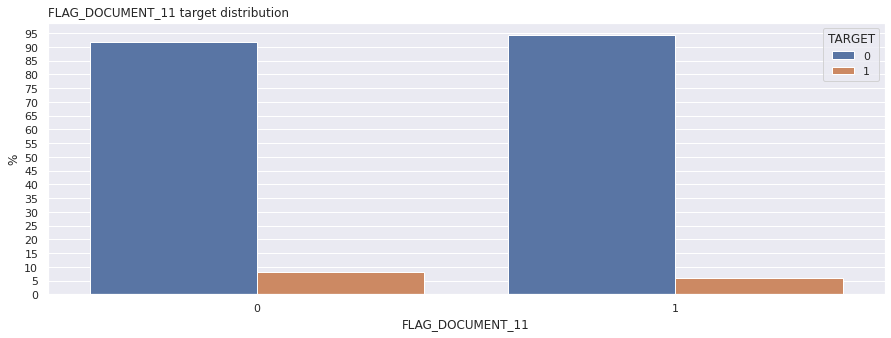

0    245047
1       961
Name: FLAG_DOCUMENT_11, dtype: int64

FLAG_DOCUMENT_12


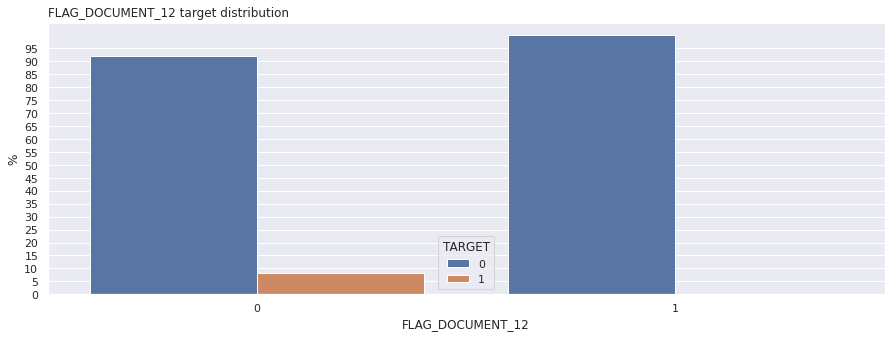

0    246006
1         2
Name: FLAG_DOCUMENT_12, dtype: int64

FLAG_DOCUMENT_13


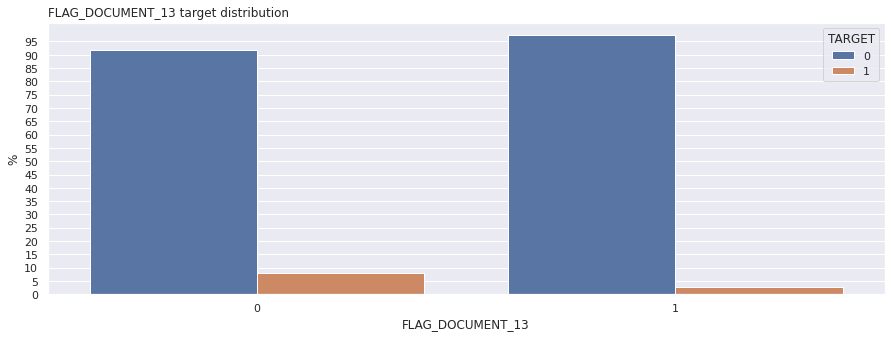

0    245127
1       881
Name: FLAG_DOCUMENT_13, dtype: int64

FLAG_DOCUMENT_14


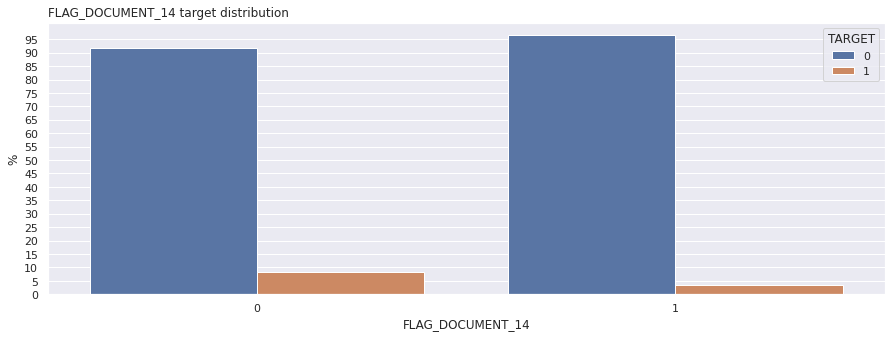

0    245282
1       726
Name: FLAG_DOCUMENT_14, dtype: int64

FLAG_DOCUMENT_15


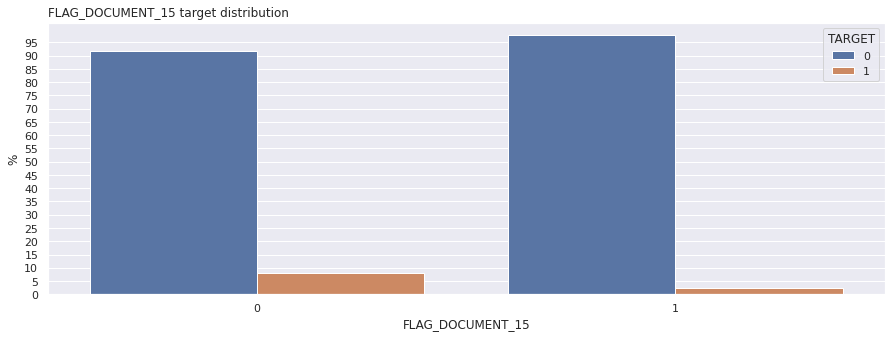

0    245719
1       289
Name: FLAG_DOCUMENT_15, dtype: int64

FLAG_DOCUMENT_16


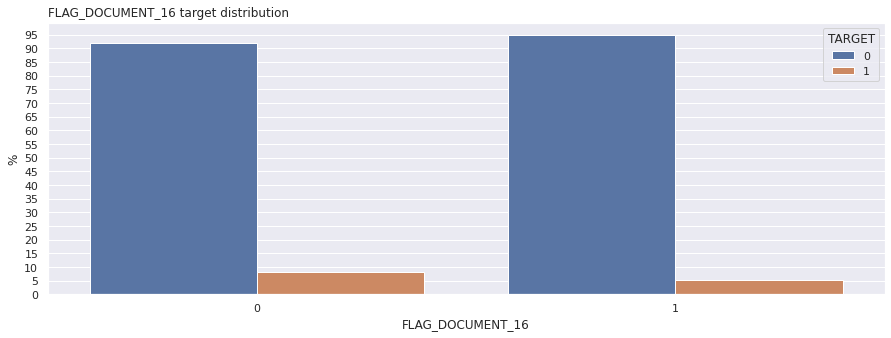

0    243549
1      2459
Name: FLAG_DOCUMENT_16, dtype: int64

FLAG_DOCUMENT_17


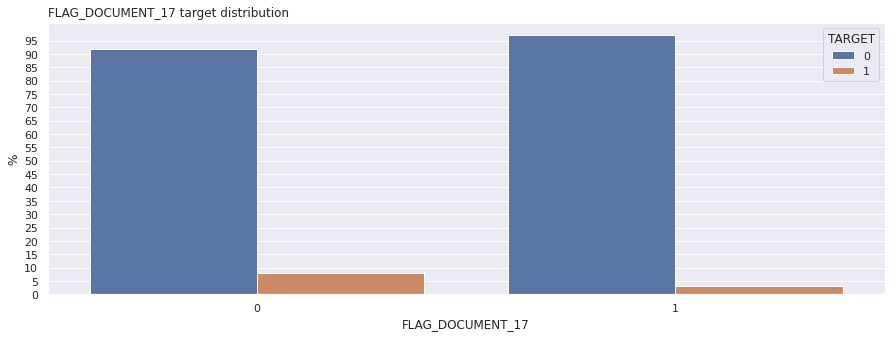

0    245943
1        65
Name: FLAG_DOCUMENT_17, dtype: int64

FLAG_DOCUMENT_18


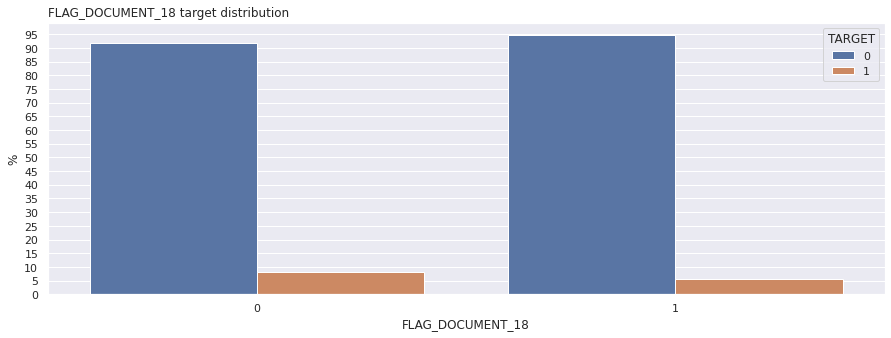

0    244046
1      1962
Name: FLAG_DOCUMENT_18, dtype: int64

FLAG_DOCUMENT_19


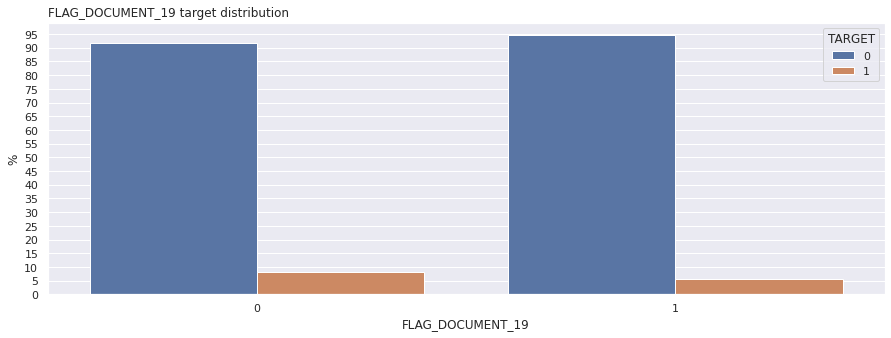

0    245863
1       145
Name: FLAG_DOCUMENT_19, dtype: int64

FLAG_DOCUMENT_20


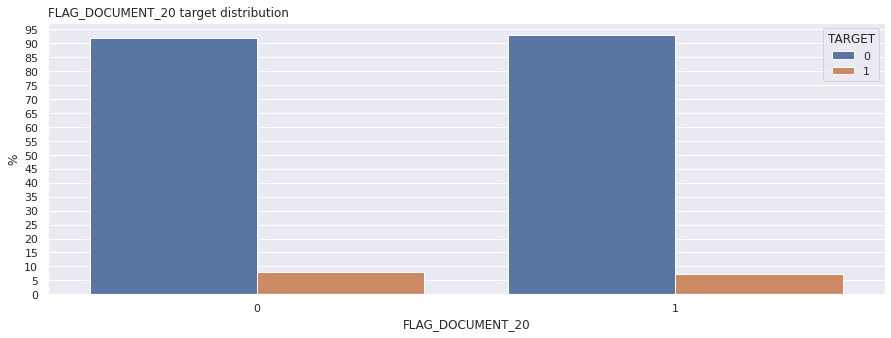

0    245883
1       125
Name: FLAG_DOCUMENT_20, dtype: int64

FLAG_DOCUMENT_21


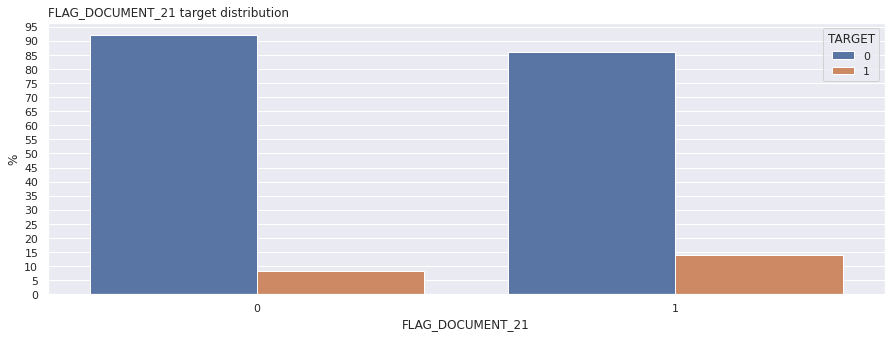

0    245937
1        71
Name: FLAG_DOCUMENT_21, dtype: int64

OWN_CAR_AGE


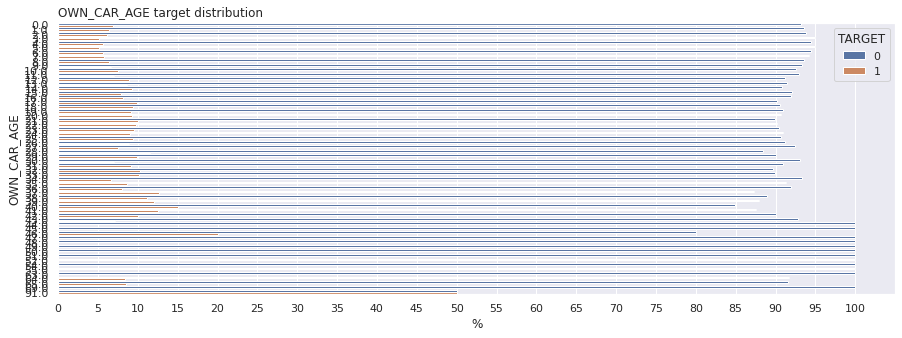

7.000000     5986
3.000000     5091
6.000000     5071
8.000000     4705
2.000000     4688
4.000000     4423
1.000000     4225
9.000000     4043
10.000000    3847
14.000000    3699
13.000000    3647
12.000000    3409
11.000000    3333
5.000000     2840
15.000000    2830
16.000000    2679
17.000000    2322
18.000000    1946
64.000000    1908
0.000000     1705
19.000000    1503
20.000000    1243
21.000000    1153
22.000000    1014
24.000000     908
23.000000     861
25.000000     715
65.000000     695
26.000000     475
28.000000     432
27.000000     387
29.000000     323
30.000000     258
31.000000     220
32.000000     165
34.000000     151
35.000000     127
33.000000      99
36.000000      99
38.000000      81
40.000000      73
37.000000      63
39.000000      58
41.000000      48
42.000000      30
44.000000      16
43.000000      14
54.000000      11
45.000000       9
46.000000       5
49.000000       3
55.000000       3
91.000000       2
51.000000       2
48.000000       1
69.000000 

CNT_FAM_MEMBERS


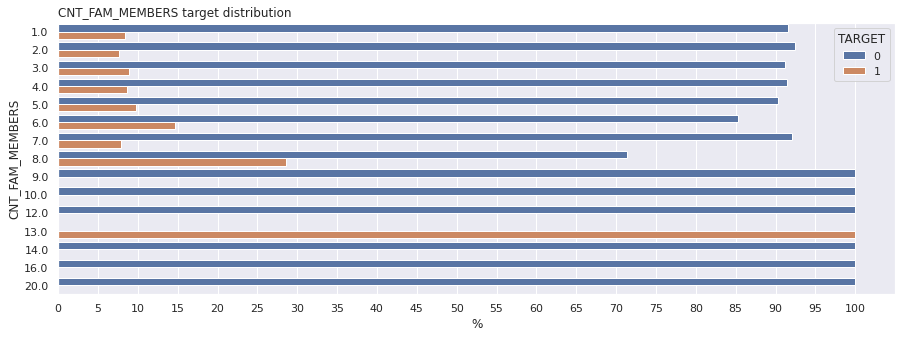

2.000000     126718
1.000000      54414
3.000000      41986
4.000000      19740
5.000000       2744
6.000000        314
7.000000         63
8.000000         14
9.000000          4
10.000000         2
14.000000         2
12.000000         2
20.000000         2
13.000000         1
16.000000         1
Name: CNT_FAM_MEMBERS, dtype: int64

OBS_30_CNT_SOCIAL_CIRCLE


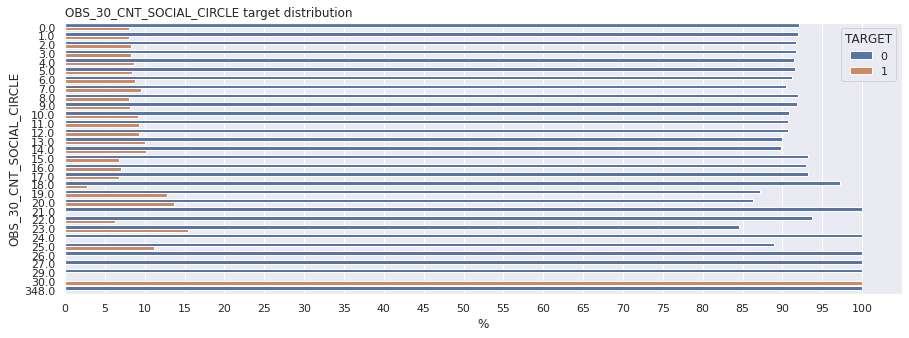

0.000000      131056
1.000000       39158
2.000000       23842
3.000000       16182
4.000000       11349
5.000000        7603
6.000000        5150
7.000000        3529
8.000000        2349
9.000000        1601
10.000000       1103
11.000000        693
12.000000        536
13.000000        338
14.000000        207
15.000000        147
16.000000        100
17.000000         74
19.000000         39
18.000000         36
21.000000         24
20.000000         22
22.000000         16
23.000000         13
24.000000         10
25.000000          9
27.000000          4
26.000000          2
29.000000          1
348.000000         1
30.000000          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

OBS_60_CNT_SOCIAL_CIRCLE


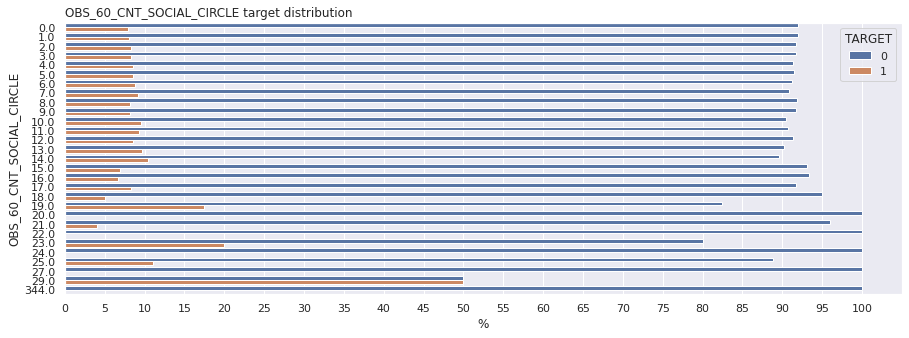

0.000000      131655
1.000000       39219
2.000000       23802
3.000000       16112
4.000000       11200
5.000000        7528
6.000000        5066
7.000000        3494
8.000000        2279
9.000000        1570
10.000000       1073
11.000000        678
12.000000        511
13.000000        329
14.000000        192
15.000000        145
16.000000        105
17.000000         60
19.000000         40
18.000000         40
21.000000         25
20.000000         20
22.000000         14
24.000000         12
23.000000         10
25.000000          9
27.000000          4
29.000000          2
344.000000         1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

DEF_30_CNT_SOCIAL_CIRCLE


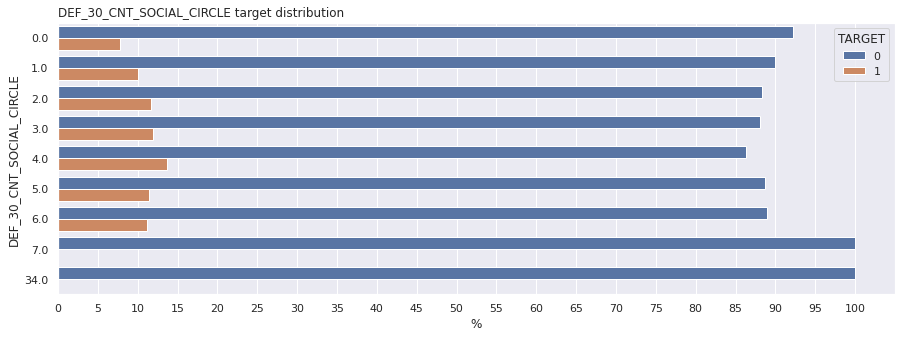

0.000000     216989
1.000000      22720
2.000000       4228
3.000000        984
4.000000        219
5.000000         44
6.000000          9
7.000000          1
34.000000         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

DEF_60_CNT_SOCIAL_CIRCLE


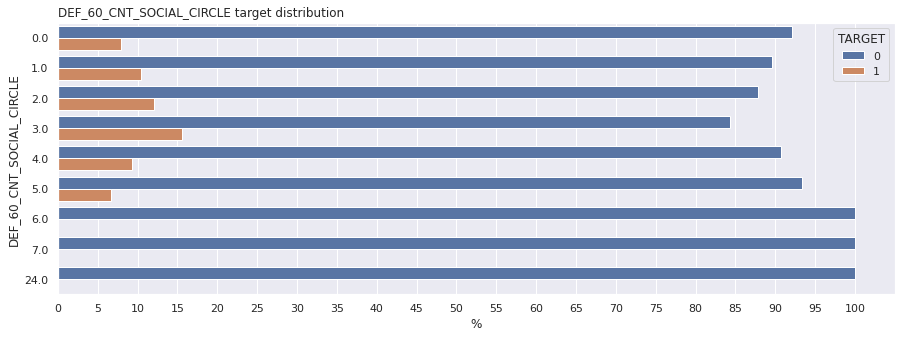

0.000000     224506
1.000000      17502
2.000000       2551
3.000000        499
4.000000        119
5.000000         15
7.000000          1
6.000000          1
24.000000         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

AMT_REQ_CREDIT_BUREAU_HOUR


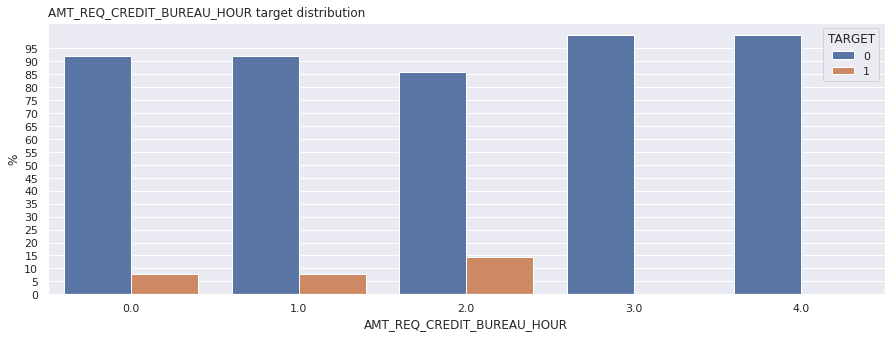

0.000000    211558
1.000000      1227
2.000000        42
3.000000         8
4.000000         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

AMT_REQ_CREDIT_BUREAU_DAY


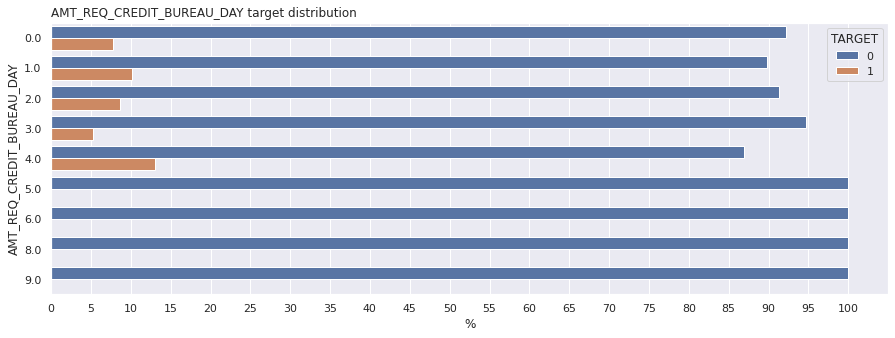

0.000000    211647
1.000000      1035
2.000000        81
3.000000        38
4.000000        23
5.000000         5
6.000000         4
9.000000         2
8.000000         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

AMT_REQ_CREDIT_BUREAU_WEEK


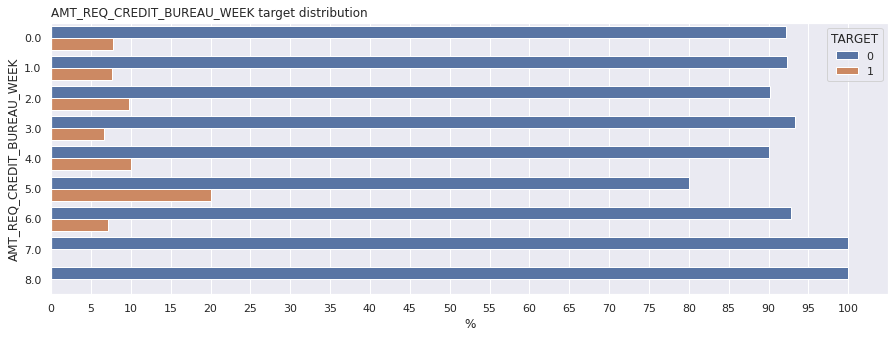

0.000000    205970
1.000000      6602
2.000000       164
3.000000        45
4.000000        30
6.000000        14
5.000000         5
8.000000         4
7.000000         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

AMT_REQ_CREDIT_BUREAU_MON


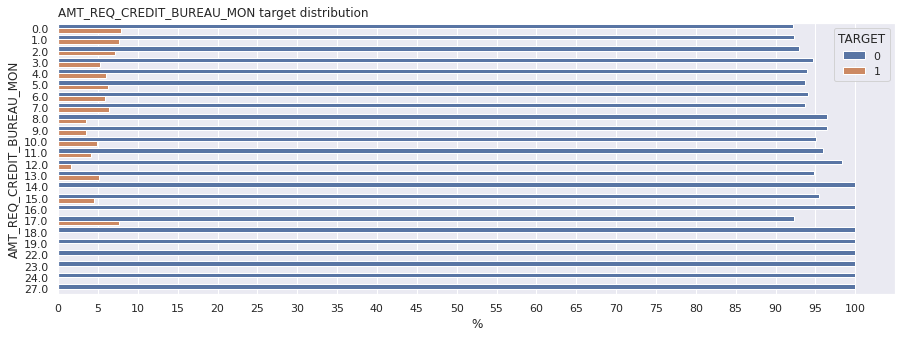

0.000000     177813
1.000000      26525
2.000000       4314
3.000000       1602
4.000000        867
5.000000        477
6.000000        270
7.000000        237
9.000000        172
8.000000        141
10.000000       102
11.000000        98
12.000000        61
13.000000        58
14.000000        32
15.000000        22
16.000000        20
17.000000        13
18.000000         5
19.000000         3
24.000000         1
27.000000         1
23.000000         1
22.000000         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

AMT_REQ_CREDIT_BUREAU_QRT


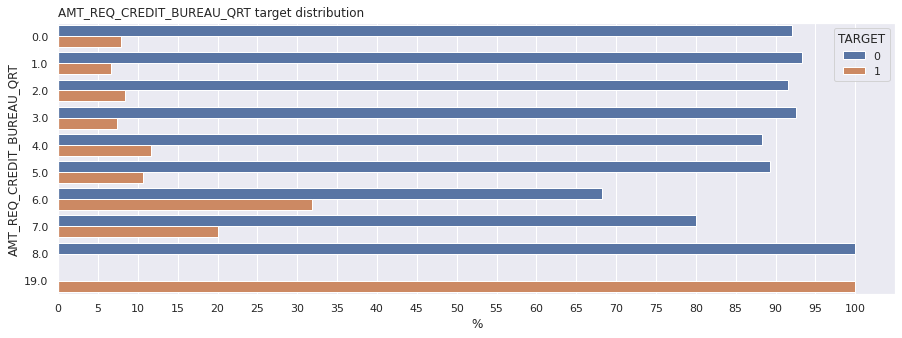

0.000000     172406
1.000000      27059
2.000000      11544
3.000000       1380
4.000000        368
5.000000         47
6.000000         22
7.000000          5
8.000000          4
19.000000         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

AMT_REQ_CREDIT_BUREAU_YEAR


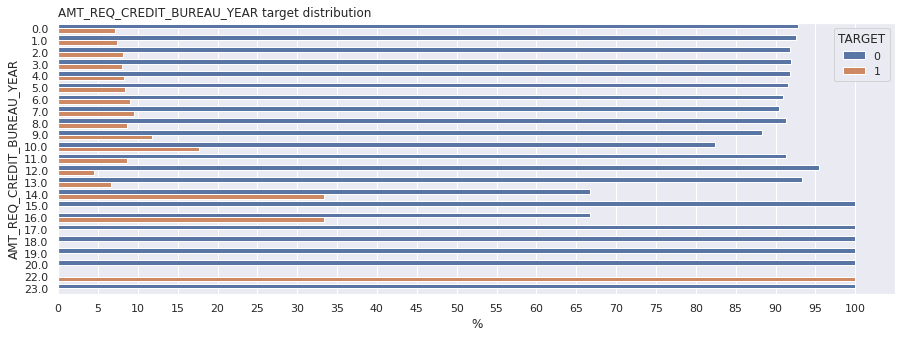

0.000000     57378
1.000000     50860
2.000000     40099
3.000000     26914
4.000000     16535
5.000000      9686
6.000000      5619
7.000000      3069
8.000000      1681
9.000000       886
11.000000       23
12.000000       22
10.000000       17
13.000000       15
14.000000        9
17.000000        6
15.000000        5
18.000000        4
16.000000        3
19.000000        2
20.000000        1
23.000000        1
22.000000        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [55]:
for feature in df[cat_features]:
    print(f'{feature}')
    
    plot_target_percent_by_cat_feature(feature)
    
    display(df[feature].value_counts())
    
    print('='*120)

___

## Renda, Valor do Crédito e Valor do Bem-de-Consumo

In [57]:
df.AMT_INCOME_TOTAL.isnull().sum()

0

In [58]:
df.AMT_INCOME_TOTAL.describe()

count       246,008.000000
mean        168,912.156596
std         260,381.833423
min          25,650.000000
25%         112,500.000000
50%         148,500.000000
75%         202,500.000000
max     117,000,000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [59]:
df.AMT_INCOME_TOTAL.quantile(np.linspace(0, 1, 11))

0.000000        25,650.000000
0.100000        81,000.000000
0.200000        99,000.000000
0.300000       112,500.000000
0.400000       135,000.000000
0.500000       148,500.000000
0.600000       162,000.000000
0.700000       180,000.000000
0.800000       225,000.000000
0.900000       270,000.000000
1.000000   117,000,000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [60]:
df.AMT_INCOME_TOTAL.quantile(np.linspace(0.9, 1, 11))

0.900000       270,000.000000
0.910000       270,000.000000
0.920000       292,500.000000
0.930000       315,000.000000
0.940000       315,000.000000
0.950000       337,500.000000
0.960000       360,000.000000
0.970000       382,500.000000
0.980000       427,500.000000
0.990000       472,500.000000
1.000000   117,000,000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [61]:
df.AMT_INCOME_TOTAL.quantile(np.linspace(0.99, 1, 11))

0.990000       472,500.000000
0.991000       495,000.000000
0.992000       540,000.000000
0.993000       540,000.000000
0.994000       562,500.000000
0.995000       630,000.000000
0.996000       675,000.000000
0.997000       675,000.000000
0.998000       765,000.000000
0.999000       900,000.000000
1.000000   117,000,000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

Há um valor de renda extremamente discrepante dos demais.

Vejamos quantos registros possuem renda total maior do que 1 milhão.

In [172]:
df[df.AMT_INCOME_TOTAL>1e6].shape[0]

200

### Renda x Valor do Crédito

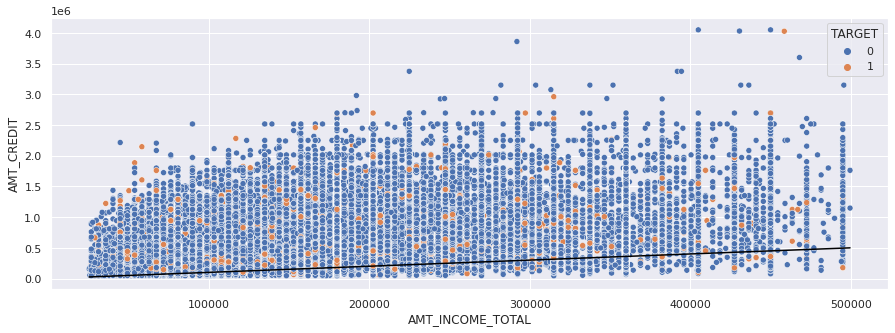

In [64]:
limit = 5e5

data = df[df['AMT_INCOME_TOTAL']<limit]

sns.scatterplot(data=data, 
                x='AMT_INCOME_TOTAL', 
                y='AMT_CREDIT', 
                hue='TARGET')

min_ = data.AMT_INCOME_TOTAL.min()
max_ = data.AMT_INCOME_TOTAL.max()
x = np.linspace(min_, max_, 2)
plt.plot(x, x, color='black')
plt.show()

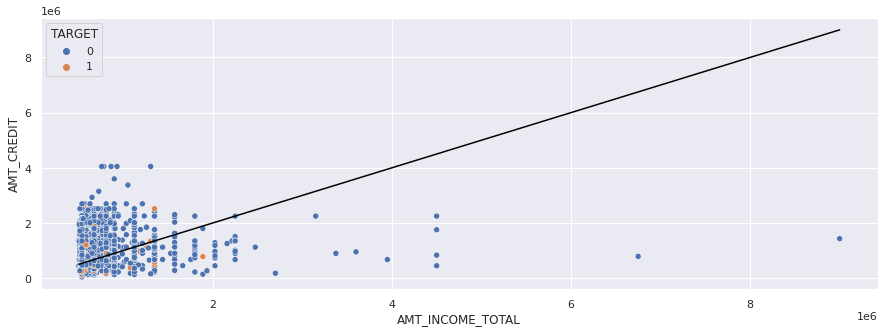

In [65]:
limit = 5e5

data = df[(df['AMT_INCOME_TOTAL']>limit) & (df['AMT_INCOME_TOTAL']<1e7)]

sns.scatterplot(data=data, 
                x='AMT_INCOME_TOTAL', 
                y='AMT_CREDIT', 
                hue='TARGET')

min_ = data.AMT_INCOME_TOTAL.min()
max_ = data.AMT_INCOME_TOTAL.max()
x = np.linspace(min_, max_, 2)
plt.plot(x, x, color='black')
plt.show()

Fizemos uma quebra na renda de 500 mil apenas para melhor visualização. Duas observações:

1. não há separabilidade do target olhando para essas duas features.
2. na grande maioria dos pedidos de crédito o valor do pedido é maior do que a renda total (faz sentido pois se trata de crédito imobiliário.)

In [7]:
df[df.AMT_CREDIT>=df.AMT_INCOME_TOTAL].shape[0]/df.shape[0]*100

95.36722383011934

### Valor do Bem x Valor do Crédito

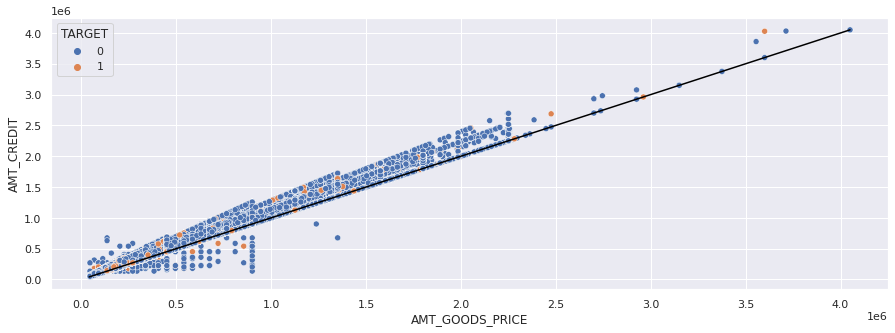

In [10]:
limit = 5e5

data=df[df['AMT_INCOME_TOTAL']<=limit]

sns.scatterplot(data=data, 
                y='AMT_CREDIT', 
                x='AMT_GOODS_PRICE', 
                hue='TARGET')

min_ = data.AMT_GOODS_PRICE.min()
max_ = data.AMT_GOODS_PRICE.max()
x = np.linspace(min_, max_, 2)
plt.plot(x, x, color='black')
plt.show()

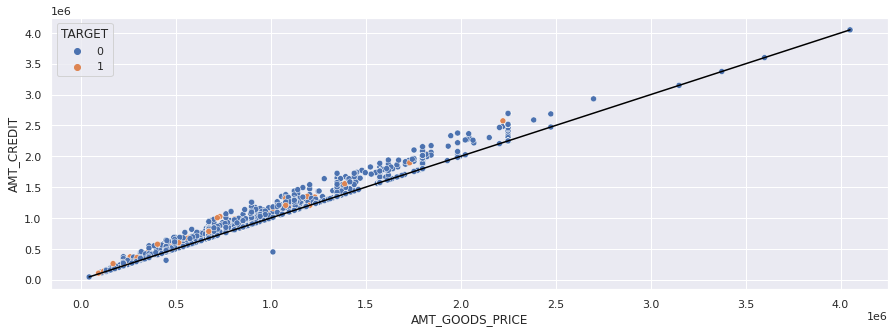

In [9]:
limit = 5e5

data=df[(df['AMT_INCOME_TOTAL']>limit) & (df['AMT_INCOME_TOTAL']<1e7)]

sns.scatterplot(data=data, 
                y='AMT_CREDIT', 
                x='AMT_GOODS_PRICE', 
                hue='TARGET')

min_ = data.AMT_GOODS_PRICE.min()
max_ = data.AMT_GOODS_PRICE.max()
x = np.linspace(min_, max_, 2)
plt.plot(x, x, color='black')
plt.show()

Há forte correlação entre o valor do bem para o qual o crédito foi solicitado e valor do crédito.

Além disso, na grande maioria dos registros o valor solicitado foi maior do que o valor do bem.

## Documentos

In [5]:
docs = [col for col in df.columns if 'DOCUMENT' in col.split('_')]

df[(df[docs].sum(axis=1)==0)].shape[0]/df.shape[0]

0.09589525543884751

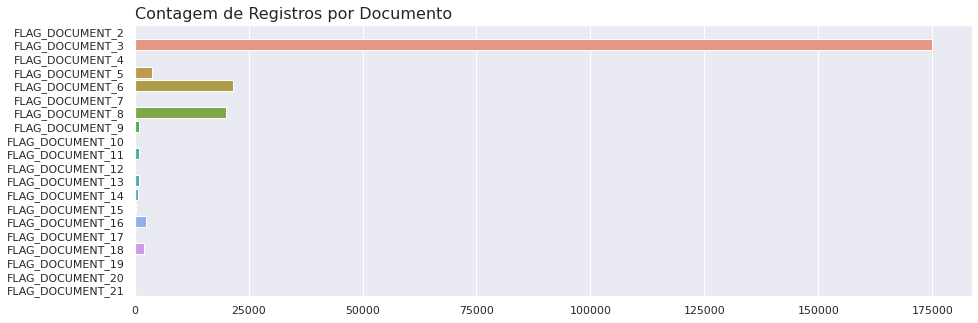

In [26]:
sns.barplot(x=df[docs].sum(), y=docs)
plt.title('Contagem de Registros por Documento', loc='left', fontsize=16)
plt.show()

Excetuando-se o documento 3, cada documento foi entregue em menos de 10% dos casos.

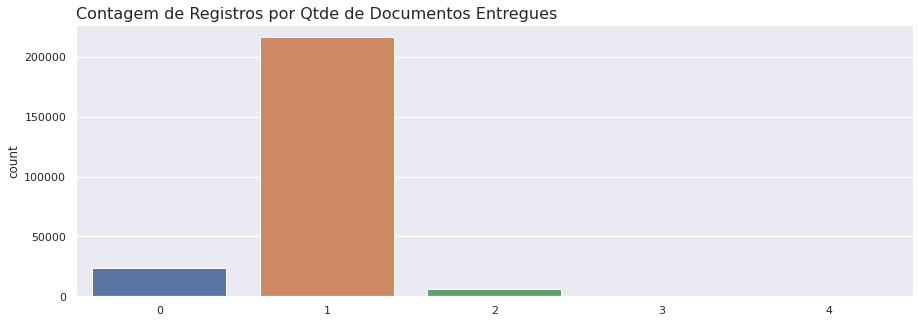

In [25]:
sns.countplot(x=df[docs].sum(axis=1))
plt.title('Contagem de Registros por Qtde de Documentos Entregues', loc='left', fontsize=16)
plt.show()

Para quase todos os registros foram entregues um ou nenhum documento. O gráfico também mostra que em nenhum registro foi entregue mais do que 4 documentos.

In [27]:
df[(df[docs].sum(axis=1)<2)].shape[0]/df.shape[0]*100

97.43179083607038

Em 97% dos casos foi entregue no máximo 1 documento.

## Renda x Escolaridade

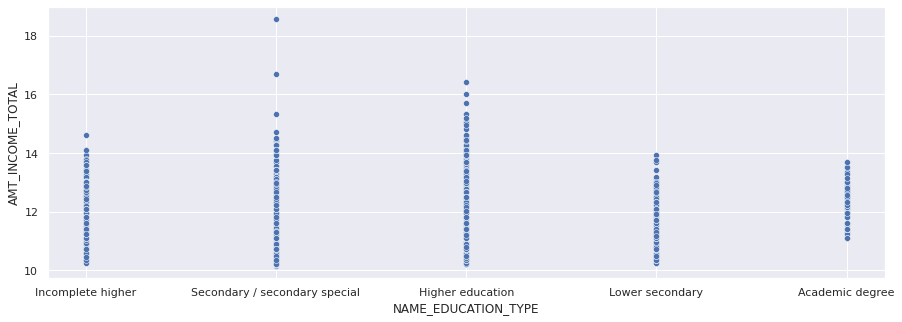

In [145]:
sns.scatterplot(x=df.NAME_EDUCATION_TYPE, y=np.log(df.AMT_INCOME_TOTAL));

In [15]:
df.groupby(by=['NAME_EDUCATION_TYPE'])['AMT_INCOME_TOTAL'].median().sort_values()

NAME_EDUCATION_TYPE
Lower secondary                 112,500.000000
Secondary / secondary special   135,000.000000
Incomplete higher               157,500.000000
Higher education                180,000.000000
Academic degree                 207,000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

Em geral, quanto maior a escolaridade maior a renda.

## Continua...